In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile

!pip install plotly
import plotly.express as px

!pip install dataprep
from dataprep.eda import create_report

!pip install h2o
import h2o
from h2o.automl import H2OAutoML

In [33]:
#read data
cancer_df = pd.read_csv('cervical_cancer.csv')

In [34]:
#preview
cancer_df.head(10)

Age Number of sexual partners  ... Citology Biopsy
0   18                       4.0  ...        0      0
1   15                       1.0  ...        0      0
2   34                       1.0  ...        0      0
3   52                       5.0  ...        0      0
4   46                       3.0  ...        0      0
5   42                       3.0  ...        0      0
6   51                       3.0  ...        0      1
7   26                       1.0  ...        0      0
8   45                       1.0  ...        0      0
9   44                       3.0  ...        0      0

[10 rows x 36 columns]

# Exploratory Data Analysis

In [35]:
#info
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

In [36]:
#statistics
cancer_df.describe()

Age  STDs: Number of diagnosis  ...    Citology      Biopsy
count  858.000000                 858.000000  ...  858.000000  858.000000
mean    26.820513                   0.087413  ...    0.051282    0.064103
std      8.497948                   0.302545  ...    0.220701    0.245078
min     13.000000                   0.000000  ...    0.000000    0.000000
25%     20.000000                   0.000000  ...    0.000000    0.000000
50%     25.000000                   0.000000  ...    0.000000    0.000000
75%     32.000000                   0.000000  ...    0.000000    0.000000
max     84.000000                   3.000000  ...    1.000000    1.000000

[8 rows x 10 columns]

In [37]:
#replace '?' with NaN 
cancer_df = cancer_df.replace('?', np.nan)
cancer_df

Age Number of sexual partners  ... Citology Biopsy
0     18                       4.0  ...        0      0
1     15                       1.0  ...        0      0
2     34                       1.0  ...        0      0
3     52                       5.0  ...        0      0
4     46                       3.0  ...        0      0
..   ...                       ...  ...      ...    ...
853   34                       3.0  ...        0      0
854   32                       2.0  ...        0      0
855   25                       2.0  ...        1      0
856   33                       2.0  ...        0      0
857   29                       2.0  ...        0      0

[858 rows x 36 columns]

In [38]:
#look at null
cancer_df.isnull().sum()

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

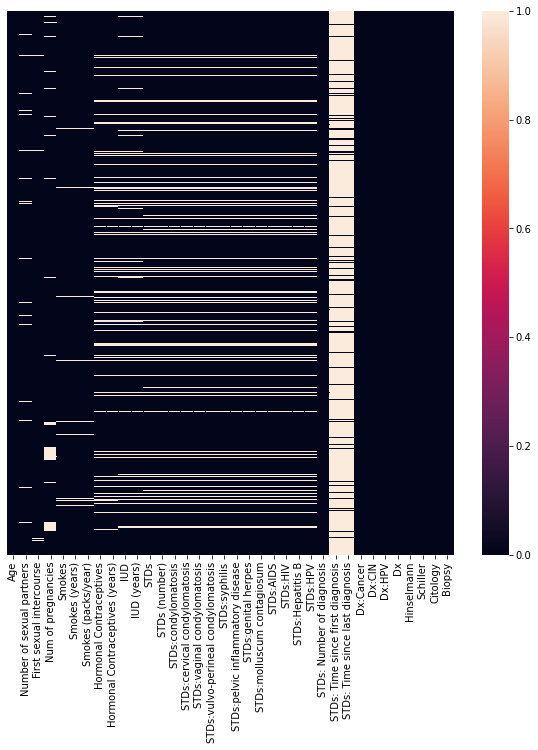

In [39]:
#plot heatmap for all locations that have null values
plt.figure(figsize = (10, 10))
sns.heatmap(cancer_df.isnull(), yticklabels=False)

In [40]:
#since STDs: Time since first diagnosis  and STDs: Time since last diagnosis have more than 80% missing values 
#we can drop them
cancer_df = cancer_df.drop(columns=['STDs: Time since first diagnosis', 'STDs: Time since last diagnosis'], axis=1)
cancer_df

Age Number of sexual partners  ... Citology Biopsy
0     18                       4.0  ...        0      0
1     15                       1.0  ...        0      0
2     34                       1.0  ...        0      0
3     52                       5.0  ...        0      0
4     46                       3.0  ...        0      0
..   ...                       ...  ...      ...    ...
853   34                       3.0  ...        0      0
854   32                       2.0  ...        0      0
855   25                       2.0  ...        1      0
856   33                       2.0  ...        0      0
857   29                       2.0  ...        0      0

[858 rows x 34 columns]

In [41]:
#since most of the column types are object, we are not able to get the statistics of the dataframe.
#convert them to numeric type
cancer_df = cancer_df.apply(pd.to_numeric)
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 858 non-null    int64  
 1   Number of sexual partners           832 non-null    float64
 2   First sexual intercourse            851 non-null    float64
 3   Num of pregnancies                  802 non-null    float64
 4   Smokes                              845 non-null    float64
 5   Smokes (years)                      845 non-null    float64
 6   Smokes (packs/year)                 845 non-null    float64
 7   Hormonal Contraceptives             750 non-null    float64
 8   Hormonal Contraceptives (years)     750 non-null    float64
 9   IUD                                 741 non-null    float64
 10  IUD (years)                         741 non-null    float64
 11  STDs                                753 non-n

In [42]:
#statistics of the dataframe
cancer_df.describe()

Age  Number of sexual partners  ...    Citology      Biopsy
count  858.000000                 832.000000  ...  858.000000  858.000000
mean    26.820513                   2.527644  ...    0.051282    0.064103
std      8.497948                   1.667760  ...    0.220701    0.245078
min     13.000000                   1.000000  ...    0.000000    0.000000
25%     20.000000                   2.000000  ...    0.000000    0.000000
50%     25.000000                   2.000000  ...    0.000000    0.000000
75%     32.000000                   3.000000  ...    0.000000    0.000000
max     84.000000                  28.000000  ...    1.000000    1.000000

[8 rows x 34 columns]

In [43]:
#get average
cancer_df.mean()

Age                                   26.820513
Number of sexual partners              2.527644
First sexual intercourse              16.995300
Num of pregnancies                     2.275561
Smokes                                 0.145562
Smokes (years)                         1.219721
Smokes (packs/year)                    0.453144
Hormonal Contraceptives                0.641333
Hormonal Contraceptives (years)        2.256419
IUD                                    0.112011
IUD (years)                            0.514804
STDs                                   0.104914
STDs (number)                          0.176627
STDs:condylomatosis                    0.058433
STDs:cervical condylomatosis           0.000000
STDs:vaginal condylomatosis            0.005312
STDs:vulvo-perineal condylomatosis     0.057105
STDs:syphilis                          0.023904
STDs:pelvic inflammatory disease       0.001328
STDs:genital herpes                    0.001328
STDs:molluscum contagiosum             0

In [44]:
#replace null values with mean
cancer_df = cancer_df.fillna(cancer_df.mean())
cancer_df

Age  Number of sexual partners  ...  Citology  Biopsy
0     18                        4.0  ...         0       0
1     15                        1.0  ...         0       0
2     34                        1.0  ...         0       0
3     52                        5.0  ...         0       0
4     46                        3.0  ...         0       0
..   ...                        ...  ...       ...     ...
853   34                        3.0  ...         0       0
854   32                        2.0  ...         0       0
855   25                        2.0  ...         1       0
856   33                        2.0  ...         0       0
857   29                        2.0  ...         0       0

[858 rows x 34 columns]

In [45]:
#age range of people involved
cancer_df['Age'].describe()

count    858.000000
mean      26.820513
std        8.497948
min       13.000000
25%       20.000000
50%       25.000000
75%       32.000000
max       84.000000
Name: Age, dtype: float64

In [46]:
#biopsy results for the oldest person 
cancer_df[cancer_df['Age']==84]

Age  Number of sexual partners  ...  Citology  Biopsy
668   84                        3.0  ...         0       0

[1 rows x 34 columns]

# Data Visualization

In [47]:
#correlation matrix
corr = cancer_df.corr()
corr

Age  ...    Biopsy
Age                                 1.000000  ...  0.055956
Number of sexual partners           0.084896  ... -0.001429
First sexual intercourse            0.369168  ...  0.007262
Num of pregnancies                  0.526137  ...  0.043460
Smokes                              0.055813  ...  0.029091
Smokes (years)                      0.217349  ...  0.061484
Smokes (packs/year)                 0.131180  ...  0.024657
Hormonal Contraceptives             0.065624  ...  0.007711
Hormonal Contraceptives (years)     0.277181  ...  0.078995
IUD                                 0.267662  ...  0.051554
IUD (years)                         0.205886  ...  0.032250
STDs                                0.010017  ...  0.106737
STDs (number)                      -0.015488  ...  0.096218
STDs:condylomatosis                -0.025012  ...  0.084520
STDs:cervical condylomatosis             NaN  ...       NaN
STDs:vaginal condylomatosis         0.006220  ... -0.019673
STDs:vulvo-perineal condylomatosis -0.022614  ...  0.086977
STDs:syphilis                       0.010442  ... -0.042128
STDs:pelvic inflammatory disease    0.023216  ... -0.009817
STDs:genital herpes                -0.029076  ...  0.129657
STDs:molluscum contagiosum         -0.000919  ... -0.009817
STDs:AIDS                                NaN  ...       NaN
STDs:HIV                           -0.002025  ...  0.124133
STDs:Hepatitis B                   -0.029076  ... -0.009817
STDs:HPV                            0.038546  ... -0.013892
STDs: Number of diagnosis          -0.001606  ...  0.097449
Dx:Cancer                           0.110340  ...  0.160905
Dx:CIN                              0.061443  ...  0.113172
Dx:HPV                              0.101722  ...  0.160905
Dx                                  0.092635  ...  0.157607
Hinselmann                         -0.003967  ...  0.547417
Schiller                            0.103283  ...  0.733204
Citology                           -0.016862  ...  0.327466
Biopsy                              0.055956  ...  1.000000

[34 rows x 34 columns]

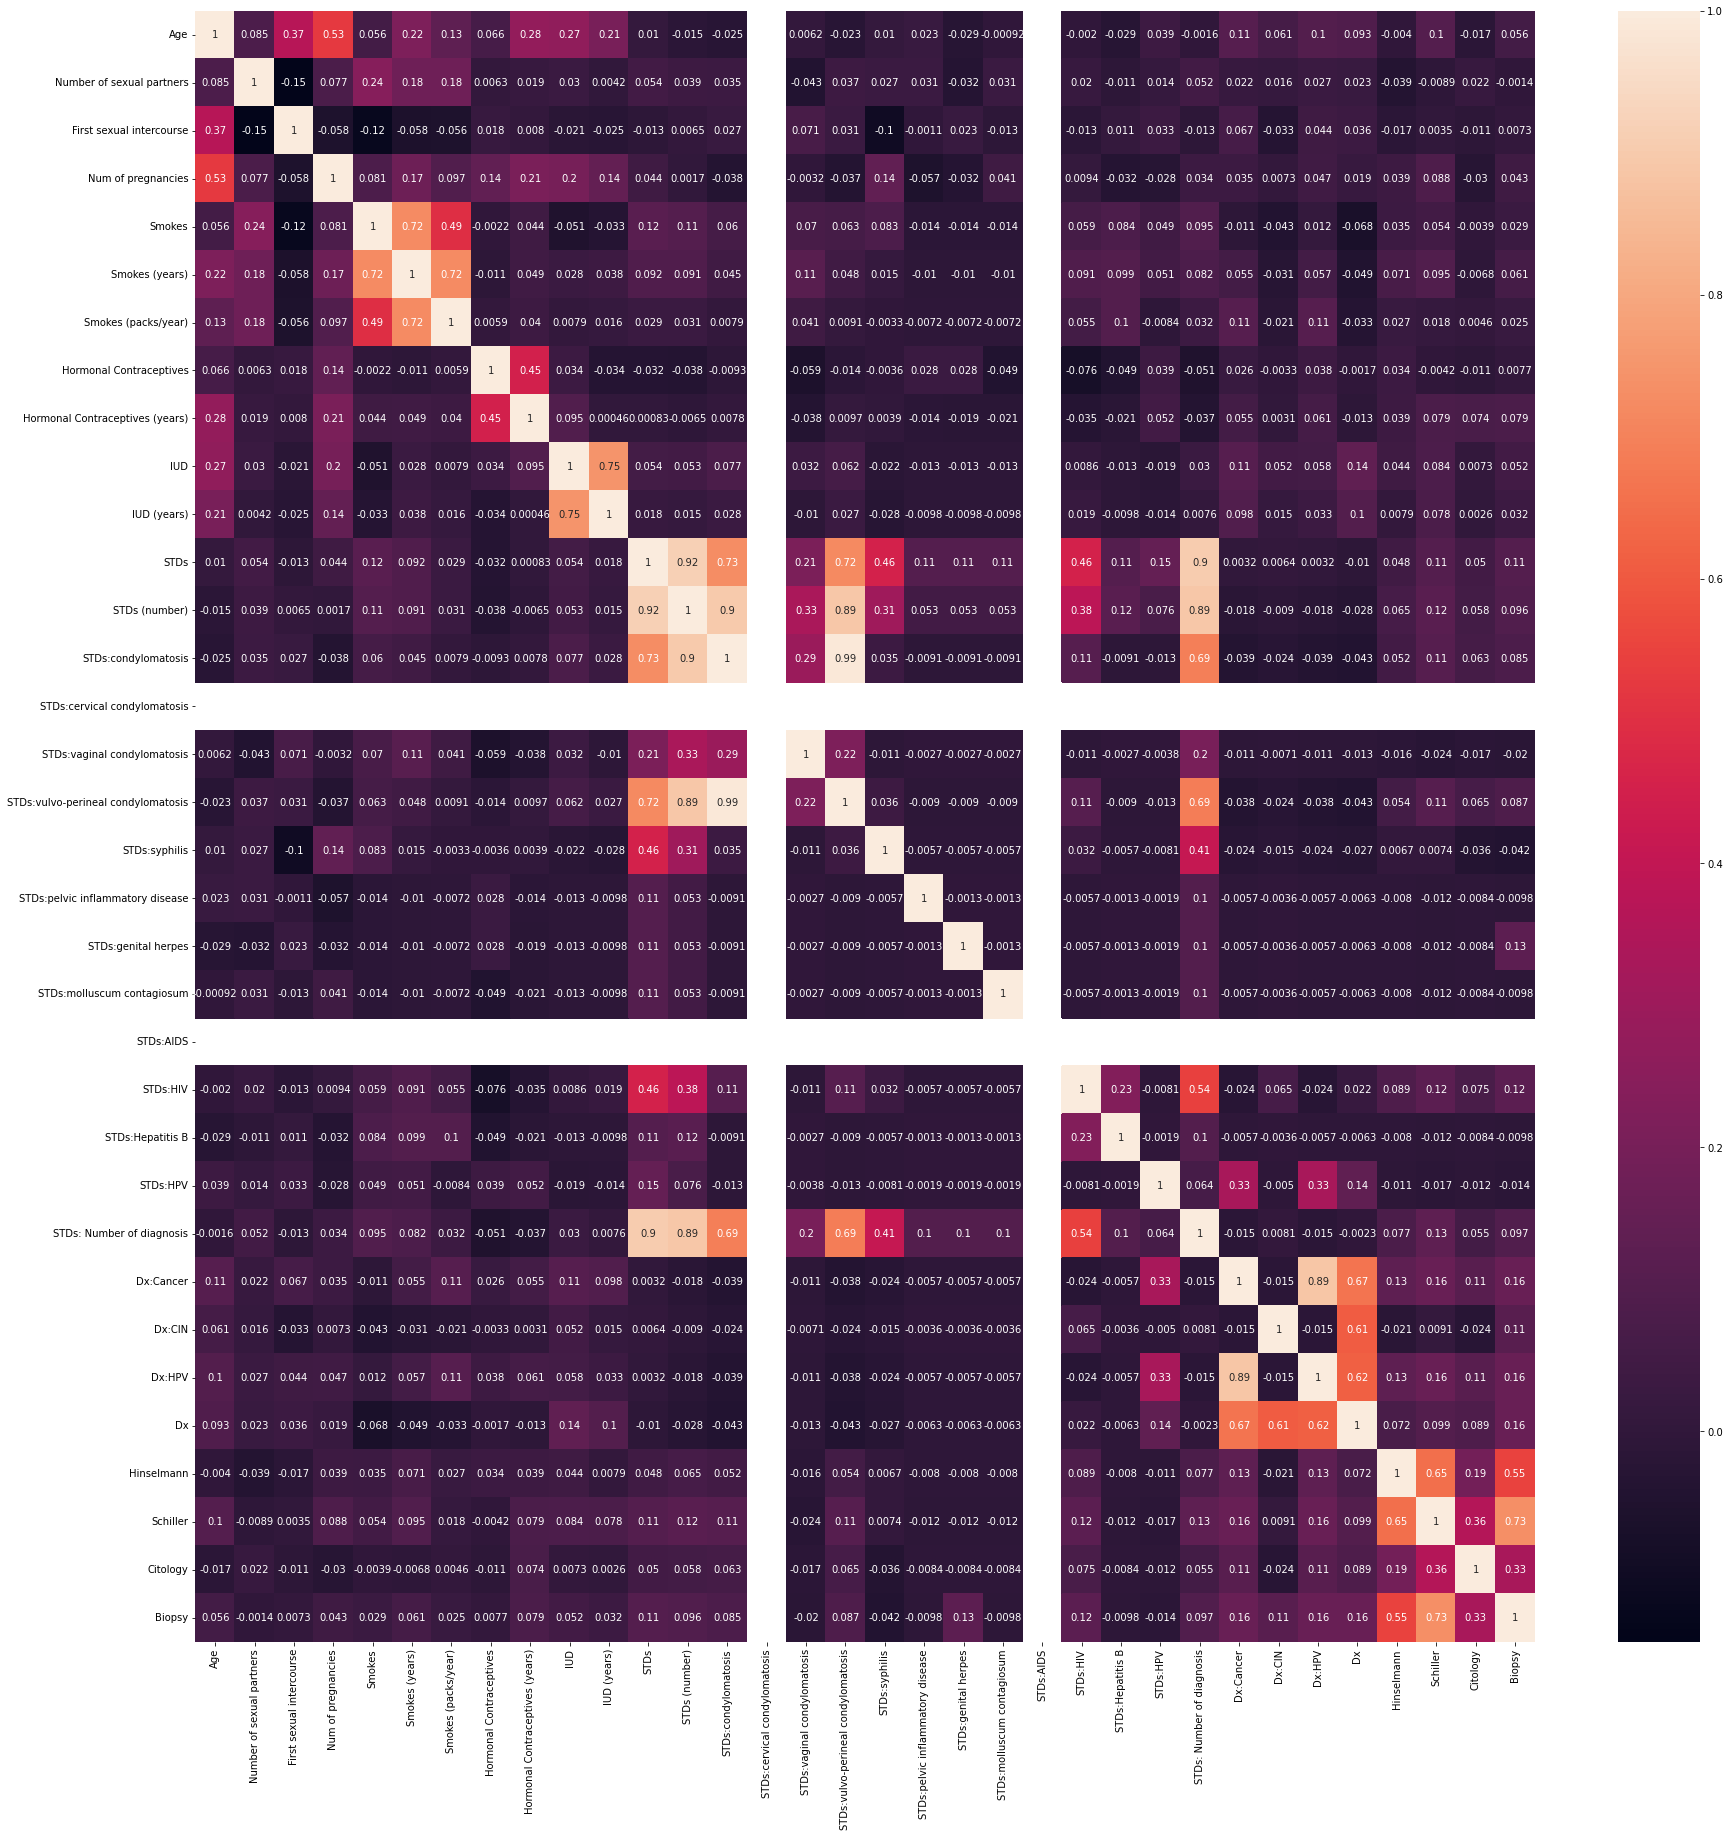

In [48]:
#plot the correlation matrix
plt.figure(figsize=(30, 30))
sns.heatmap(corr, annot=True)
plt.show()

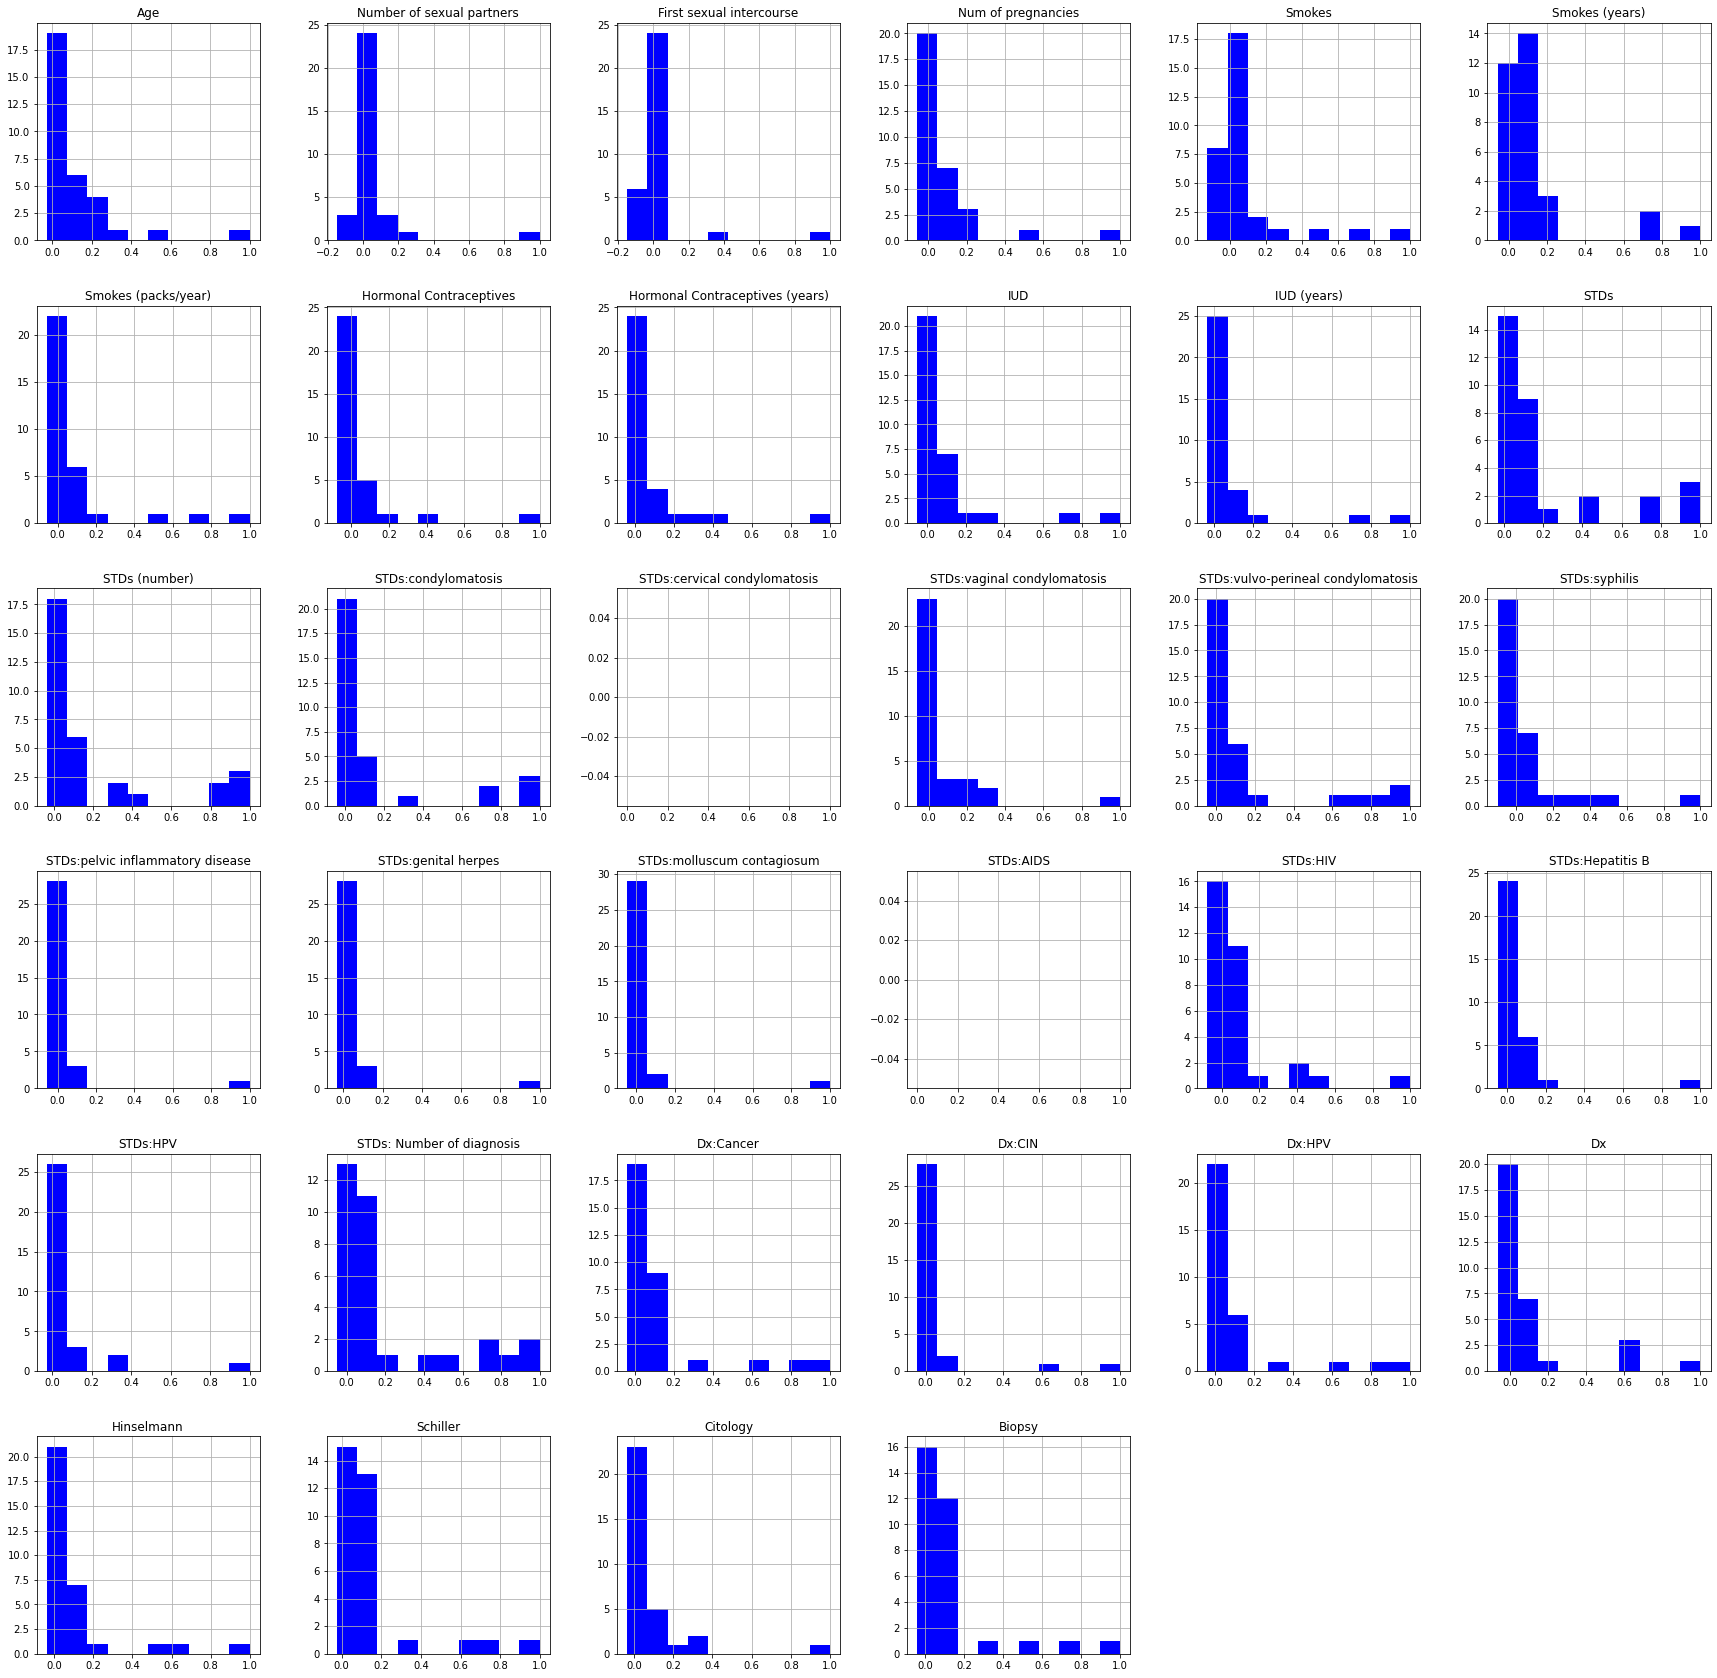

In [49]:
#plot histogram
corr.hist(figsize=(30, 30), 
                bins=10,
                color='b');

In [63]:
#create report
report = create_report(cancer_df, title='My Report')
report

# Train H2O AutoML

In [60]:
#initiate
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


--------------------------  ------------------------------------------------------------------
H2O_cluster_uptime:         3 mins 39 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.34.0.3
H2O_cluster_version_age:    1 day
H2O_cluster_name:           H2O_from_python_unknownUser_nt1wnf
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.156 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
H2O_API_Extensions:         Amazon S3, XGBoost, Algos, AutoML, Core V3, TargetEncoder, Core V4
Python_version:             3.7.12 final
--------------------------  ------------------------------------------------------------------

In [64]:
#convert pandas df into h2o frame
h2o_df = h2o.H2OFrame(cancer_df)

#preview
h2o_df

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


Age Number of sexual partners First sexual intercourse Num of pregnancies Smokes Smokes (years) Smokes (packs/year) Hormonal Contraceptives Hormonal Contraceptives (years) IUD IUD (years) STDs STDs (number) STDs:condylomatosis STDs:cervical condylomatosis STDs:vaginal condylomatosis STDs:vulvo-perineal condylomatosis STDs:syphilis STDs:pelvic inflammatory disease STDs:genital herpes STDs:molluscum contagiosum STDs:AIDS STDs:HIV STDs:Hepatitis B STDs:HPV STDs: Number of diagnosis Dx:Cancer Dx:CIN Dx:HPV Dx Hinselmann Schiller Citology Biopsy 
 
 
 18 4 15 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
 15 1 14 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
 34 1 16.9953 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
 52 5 16 4 1 37 37 1 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 
 46 3 21 4 0 0 0 1 15 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
 42 3 23 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
 51 3 17 6 1 34 3.4 0 0 1 7 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 
 26 1 26 3 0 0 0 1 2 1 7 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
 45 1 20 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 
 44 3 15 2.27556 1 1.26697 2.8 0 0 0.112011 0.514804 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [65]:
#statistics
h2o_df.describe()

Rows:858
Cols:34




Age Number of sexual partners First sexual intercourse Num of pregnancies Smokes Smokes (years) Smokes (packs/year) Hormonal Contraceptives Hormonal Contraceptives (years) IUD IUD (years) STDs STDs (number) STDs:condylomatosis STDs:cervical condylomatosis STDs:vaginal condylomatosis STDs:vulvo-perineal condylomatosis STDs:syphilis STDs:pelvic inflammatory disease STDs:genital herpes STDs:molluscum contagiosum STDs:AIDS STDs:HIV STDs:Hepatitis B STDs:HPV STDs: Number of diagnosis Dx:Cancer Dx:CIN Dx:HPV Dx Hinselmann Schiller Citology Biopsy 
 
 
 type int real real real real real real real real real real real real real int real real real real real real int real real real int int int int int int int int int 
 mins 13.0 1.0 10.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
 mean 26.82051282051281 2.527644230769229 16.99529964747356 2.2755610972568596 0.1455621301775149 1.2197214125857974 0.45314395064923096 0.6413333333333339 2.2564192013893347 0.11201079622132265 0.5148043184885296 0.10491367861885777 0.17662682602921645 0.05843293492695881 0.0 0.005312084993359892 0.057104913678618904 0.023904382470119518 0.0013280212483399733 0.0013280212483399723 0.0013280212483399733 0.0 0.02390438247011952 0.0013280212483399727 0.0026560424966799467 0.08741258741258745 0.02097902097902098 0.01048951048951049 0.02097902097902098 0.027972027972027972 0.04079254079254079 0.08624708624708624 0.05128205128205128 0.0641025641025641 
 maxs 84.0 28.0 32.0 11.0 1.0 37.0 37.0 1.0 30.0 1.0 19.0 1.0 4.0 1.0 0.0 1.0 1.0 1.0 1.0 1.0 1.0 0.0 1.0 1.0 1.0 3.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 
 sigma 8.497948065482602 1.6422670468948033 2.7918829667636307 1.399325140522659 0.3501889104921777 4.057884876966794 2.2096573290995956 0.4486706238053575 3.5190818172926286 0.29325976218008654 1.8055854274592453 0.28724706166127123 0.5264404943519086 0.21986776248292073 0.0 0.06813699958037694 0.2175081342429894 0.14318318641611819 0.034136659577812506 0.03413665957781252 0.03413665957781251 0.0 0.14318318641611827 0.03413665957781252 0.04824441751620589 0.3025447418507477 0.1433975861165658 0.1019391586774784 0.1433975861165658 0.1649888484215437 0.1979246496661347 0.2808923013686258 0.22070109393249174 0.24507841474716066 
 zeros 0 0 0 16 722 722 722 269 269 658 658 674 674 709 858 749 710 735 752 752 752 858 735 752 751 787 840 849 840 834 823 784 814 803 
 missing 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
 0 18.0 4.0 15.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
 1 15.0 1.0 14.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
 2 34.0 1.0 16.995299647473562 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
 3 52.0 5.0 16.0 4.0 1.0 37.0 37.0 1.0 3.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 
 4 46.0 3.0 21.0 4.0 0.0 0.0 0.0 1.0 15.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
 5 42.0 3.0 23.0 2.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
 6 51.0 3.0 17.0 6.0 1.0 34.0 3.4 0.0 0.0 1.0 7.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 1.0 0.0 1.0 
 7 26.0 1.0 26.0 3.0 0.0 0.0 0.0 1.0 2.0 1.0 7.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
 8 45.0 1.0 20.0 5.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 1.0 1.0 0.0 0.0 0.0 0.0 
 9 44.0 3.0 15.0 2.275561097256858 1.0 1.266972909 2.8 0.0 0.0 0.11201079622132254 0.514804318488529 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 

In [66]:
#split train and test sets
train, test = h2o_df.split_frame(ratios=[.75])

In [67]:
#define X and y
X = train.columns
y = 'Biopsy'
X.remove(y)

In [68]:
X

['Age',
 'Number of sexual partners',
 'First sexual intercourse',
 'Num of pregnancies',
 'Smokes',
 'Smokes (years)',
 'Smokes (packs/year)',
 'Hormonal Contraceptives',
 'Hormonal Contraceptives (years)',
 'IUD',
 'IUD (years)',
 'STDs',
 'STDs (number)',
 'STDs:condylomatosis',
 'STDs:cervical condylomatosis',
 'STDs:vaginal condylomatosis',
 'STDs:vulvo-perineal condylomatosis',
 'STDs:syphilis',
 'STDs:pelvic inflammatory disease',
 'STDs:genital herpes',
 'STDs:molluscum contagiosum',
 'STDs:AIDS',
 'STDs:HIV',
 'STDs:Hepatitis B',
 'STDs:HPV',
 'STDs: Number of diagnosis',
 'Dx:Cancer',
 'Dx:CIN',
 'Dx:HPV',
 'Dx',
 'Hinselmann',
 'Schiller',
 'Citology']

In [69]:
y

'Biopsy'

In [72]:
#initiate
aml = H2OAutoML(stopping_metric='RMSE',     #for regression
                seed=121,
                max_models=50)

#train
aml.train(x=X, 
          y=y, 
          training_frame=train)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_BestOfFamily_8_AutoML_6_20211009_52527

No model summary for this model

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 0.018129006614680365
RMSE: 0.13464399954947998
MAE: 0.053350599806585956
RMSLE: 0.09399629892196758
R^2: 0.7031874751401599
Mean Residual Deviance: 0.018129006614680365
Null degrees of freedom: 657
Residual degrees of freedom: 653
Null deviance: 40.18996960486296
Residual deviance: 11.928886352459681
AIC: -759.4161579309425

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.027933344467748207
RMSE: 0.16713271513305888
MAE: 0.06094258100018346
RMSLE: 0.11548367104196634
R^2: 0.542668460800373
Mean Residual Deviance: 0.027933344467748207
Null degrees of freedom: 657
Residual degrees of freedom: 653
Null deviance: 40

# Leaderboard Exploration

In [73]:
#leaderboard
lb = aml.leaderboard
lb.head(rows=lb.nrows)

model_id mean_residual_deviance rmse mse mae rmsle 
 
 
 StackedEnsemble_BestOfFamily_8_AutoML_6_20211009_52527 0.0279333 0.167133 0.0279333 0.0609426 0.115484 
 DeepLearning_grid_3_AutoML_6_20211009_52527_model_4 0.028093 0.16761 0.028093 0.0544713 0.116347 
 GBM_grid_1_AutoML_6_20211009_52527_model_6 0.0283572 0.168396 0.0283572 0.0639896 0.117386 
 GBM_2_AutoML_6_20211009_52527 0.028548 0.168961 0.028548 0.068254 0.118529 
 StackedEnsemble_AllModels_2_AutoML_6_20211009_52527 0.0285743 0.169039 0.0285743 0.0664646 0.118263 
 StackedEnsemble_BestOfFamily_3_AutoML_6_20211009_52527 0.028651 0.169266 0.028651 0.0669178 0.118398 
 GBM_3_AutoML_6_20211009_52527 0.0287674 0.16961 0.0287674 0.0694405 0.11924 
 GBM_grid_1_AutoML_6_20211009_52527_model_7 0.0288753 0.169927 0.0288753 0.0697732 0.118336 
 XGBoost_grid_1_AutoML_6_20211009_52527_model_7 0.0290107 0.170325 0.0290107 0.0645334 0.119629 
 StackedEnsemble_BestOfFamily_5_AutoML_6_20211009_52527 0.0295576 0.171923 0.0295576 0.0578838 0.119114 
 GBM_grid_1_AutoML_6_20211009_52527_model_3 0.0296891 0.172305 0.0296891 0.0749552 0.119608 
 GBM_grid_1_AutoML_6_20211009_52527_model_9 0.0297315 0.172428 0.0297315 0.0699953 0.120657 
 StackedEnsemble_AllModels_1_AutoML_6_20211009_52527 0.0299035 0.172926 0.0299035 0.068164 0.12103 
 GBM_4_AutoML_6_20211009_52527 0.0299987 0.173201 0.0299987 0.069391 0.120719 
 XGBoost_grid_1_AutoML_6_20211009_52527_model_4 0.0301002 0.173494 0.0301002 0.0766145 0.124382 
 XGBoost_grid_1_AutoML_6_20211009_52527_model_1 0.0301571 0.173658 0.0301571 0.0788421 0.1249 
 StackedEnsemble_BestOfFamily_4_AutoML_6_20211009_52527 0.0302061 0.173799 0.0302061 0.0632669 0.121281 
 XGBoost_grid_1_AutoML_6_20211009_52527_model_2 0.0303083 0.174093 0.0303083 0.0802626 0.125061 
 GBM_grid_1_AutoML_6_20211009_52527_model_2 0.0303383 0.174179 0.0303383 0.076855 0.12063 
 XGBoost_grid_1_AutoML_6_20211009_52527_model_6 0.0303695 0.174268 0.0303695 0.0774309 0.12473 
 XGBoost_grid_1_AutoML_6_20211009_52527_model_13 0.0306387 0.175039 0.0306387 0.0761742 0.124535 
 XGBoost_grid_1_AutoML_6_20211009_52527_model_8 0.030676 0.175146 0.030676 0.0808689 0.126255 
 XGBoost_grid_1_AutoML_6_20211009_52527_model_9 0.0306765 0.175147 0.0306765 0.0804501 0.125951 
 XGBoost_grid_1_AutoML_6_20211009_52527_model_3 0.0307449 0.175342 0.0307449 0.0680692 0.123191 
 XGBoost_grid_1_AutoML_6_20211009_52527_model_14 0.0308355 0.1756 0.0308355 0.0779412 0.124961 
 DeepLearning_grid_2_AutoML_6_20211009_52527_model_3 0.0309327 0.175877 0.0309327 0.0635067 0.121388 
 DRF_1_AutoML_6_20211009_52527 0.0313679 0.17711 0.0313679 0.0571422 0.124566 
 XGBoost_1_AutoML_6_20211009_52527 0.0314042 0.177212 0.0314042 0.0836765 0.128804 
 StackedEnsemble_BestOfFamily_1_AutoML_6_20211009_52527 0.0314419 0.177319 0.0314419 0.0823576 0.126443 
 StackedEnsemble_BestOfFamily_2_AutoML_6_20211009_52527 0.031551 0.177626 0.031551 0.0691459 0.123866 
 GBM_grid_1_AutoML_6_20211009_52527_model_5 0.0324862 0.180239 0.0324862 0.0805409 0.122866 
 GBM_grid_1_AutoML_6_20211009_52527_model_10 0.0328783 0.181324 0.0328783 0.0707679 0.126539 
 XGBoost_grid_1_AutoML_6_20211009_52527_model_11 0.0330552 0.181811 0.0330552 0.0740563 0.130131 
 StackedEnsemble_AllModels_4_AutoML_6_20211009_52527 0.0336809 0.183523 0.0336809 0.0781797 0.126488 
 GBM_5_AutoML_6_20211009_52527 0.034106 0.184678 0.034106 0.0652408 0.129617 
 XGBoost_grid_1_AutoML_6_20211009_52527_model_5 0.0341963 0.184922 0.0341963 0.0709974 0.130943 
 XGBoost_2_AutoML_6_20211009_52527 0.034566 0.185919 0.034566 0.0815185 0.132714 
 StackedEnsemble_AllModels_3_AutoML_6_20211009_52527 0.0348962 0.186805 0.0348962 0.079758 0.203616 
 DeepLearning_grid_2_AutoML_6_20211009_52527_model_4 0.0351786 0.18756 0.0351786 0.0628896 0.22656 
 XGBoost_3_AutoML_6_20211009_52527 0.0362571 0.190413 0.0362571 0.0738079 0.135647 
 StackedEnsemble_AllModels_6_AutoML_6_20211009_52527 0.0364066 0.190805 0.0364066 0.0637851 0.132162 
 DeepLearning_grid_3_AutoML_6_20211009_52527_model_3 0.0369

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id mean_residual_deviance rmse mse mae rmsle training_time_ms predict_time_per_row_ms algo 
 
 
 StackedEnsemble_BestOfFamily_8_AutoML_6_20211009_52527 0.0279333 0.167133 0.0279333 0.0609426 0.115484 541 0.079776 StackedEnsemble 
 DeepLearning_grid_3_AutoML_6_20211009_52527_model_4 0.028093 0.16761 0.028093 0.0544713 0.116347 27313 0.051485 DeepLearning 
 GBM_grid_1_AutoML_6_20211009_52527_model_6 0.0283572 0.168396 0.0283572 0.0639896 0.117386 147 0.005413 GBM 
 GBM_2_AutoML_6_20211009_52527 0.028548 0.168961 0.028548 0.068254 0.118529 325 0.006422 GBM 
 StackedEnsemble_AllModels_2_AutoML_6_20211009_52527 0.0285743 0.169039 0.0285743 0.0664646 0.118263 135 0.028813 StackedEnsemble 
 StackedEnsemble_BestOfFamily_3_AutoML_6_20211009_52527 0.028651 0.169266 0.028651 0.0669178 0.118398 132 0.020275 StackedEnsemble 
 GBM_3_AutoML_6_20211009_52527 0.0287674 0.16961 0.0287674 0.0694405 0.11924 314 0.00661 GBM 
 GBM_grid_1_AutoML_6_20211009_52527_model_7 0.0288753 0.169927 0.0288753 0.0697732 0.118336 222 0.007309 GBM 
 XGBoost_grid_1_AutoML_6_20211009_52527_model_7 0.0290107 0.170325 0.0290107 0.0645334 0.119629 193 0.002674 XGBoost 
 StackedEnsemble_BestOfFamily_5_AutoML_6_20211009_52527 0.0295576 0.171923 0.0295576 0.0578838 0.119114 130 0.044955 StackedEnsemble 
 GBM_grid_1_AutoML_6_20211009_52527_model_3 0.0296891 0.172305 0.0296891 0.0749552 0.119608 219 0.008046 GBM 
 GBM_grid_1_AutoML_6_20211009_52527_model_9 0.0297315 0.172428 0.0297315 0.0699953 0.120657 410 0.0084 GBM 
 StackedEnsemble_AllModels_1_AutoML_6_20211009_52527 0.0299035 0.172926 0.0299035 0.068164 0.12103 119 0.024209 StackedEnsemble 
 GBM_4_AutoML_6_20211009_52527 0.0299987 0.173201 0.0299987 0.069391 0.120719 255 0.006109 GBM 
 XGBoost_grid_1_AutoML_6_20211009_52527_model_4 0.0301002 0.173494 0.0301002 0.0766145 0.124382 290 0.003651 XGBoost 
 XGBoost_grid_1_AutoML_6_20211009_52527_model_1 0.0301571 0.173658 0.0301571 0.0788421 0.1249 158 0.002383 XGBoost 
 StackedEnsemble_BestOfFamily_4_AutoML_6_20211009_52527 0.0302061 0.173799 0.0302061 0.0632669 0.121281 114 0.015655 StackedEnsemble 
 XGBoost_grid_1_AutoML_6_20211009_52527_model_2 0.0303083 0.174093 0.0303083 0.0802626 0.125061 221 0.003405 XGBoost 
 GBM_grid_1_AutoML_6_20211009_52527_model_2 0.0303383 0.174179 0.0303383 0.076855 0.12063 152 0.008827 GBM 
 XGBoost_grid_1_AutoML_6_20211009_52527_model_6 0.0303695 0.174268 0.0303695 0.0774309 0.12473 169 0.002927 XGBoost

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

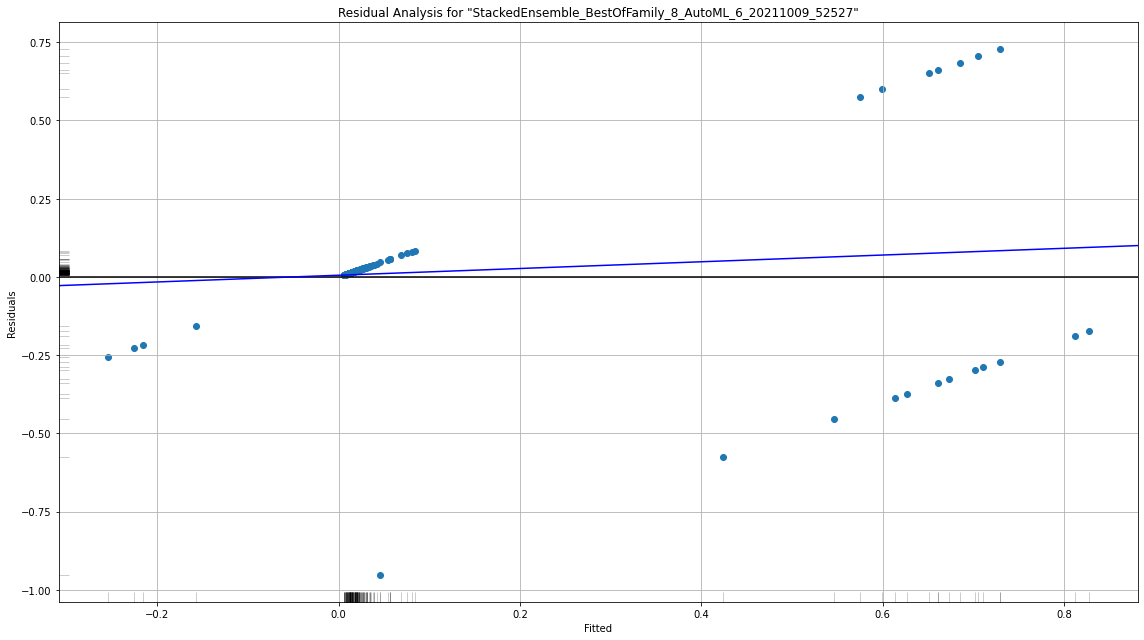

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

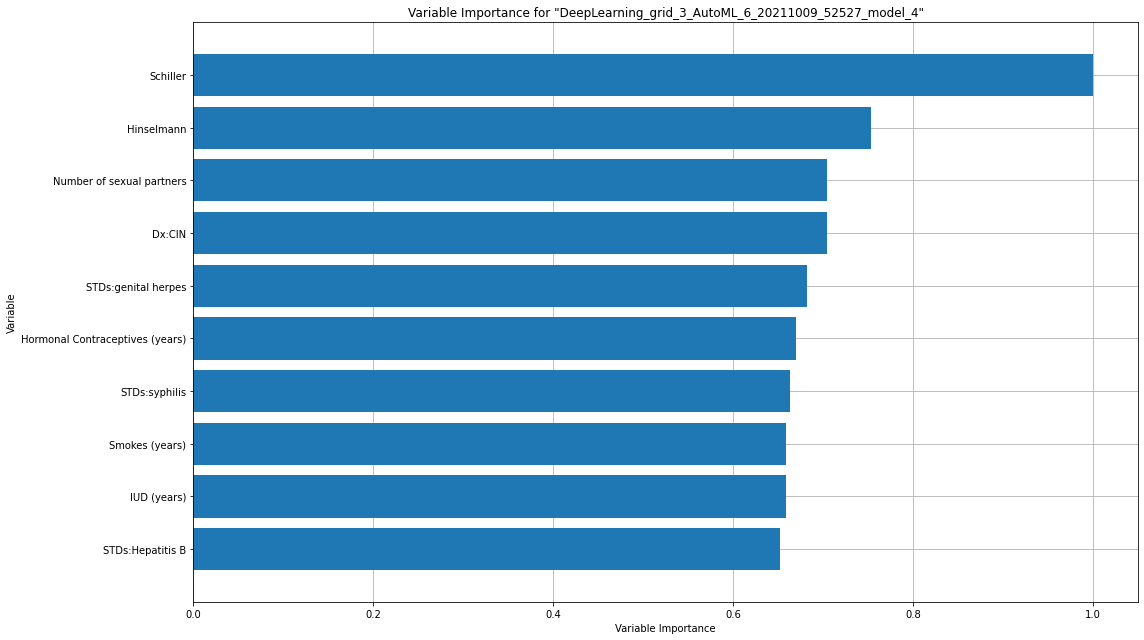

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

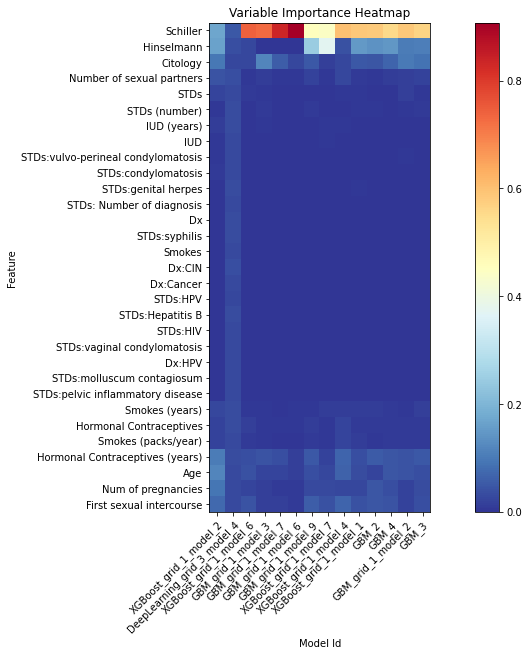

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

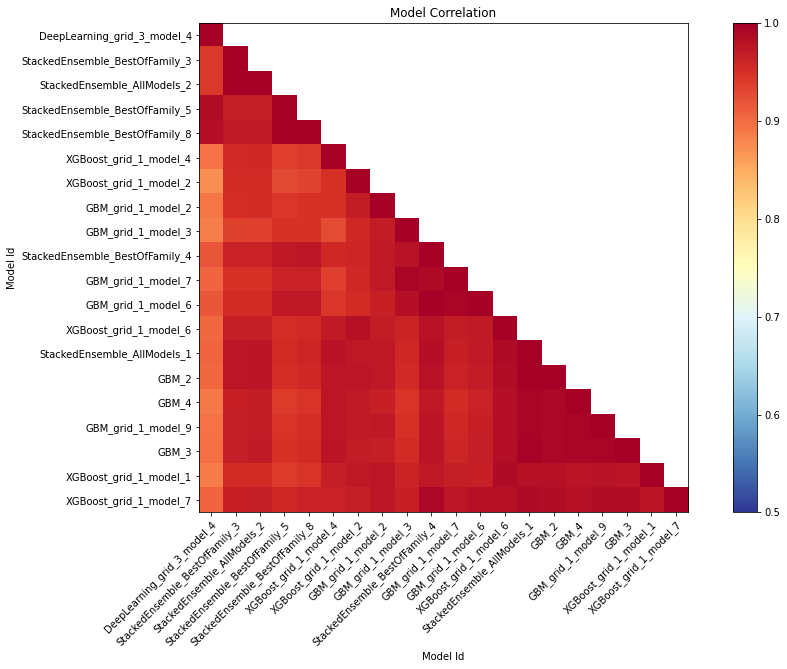

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

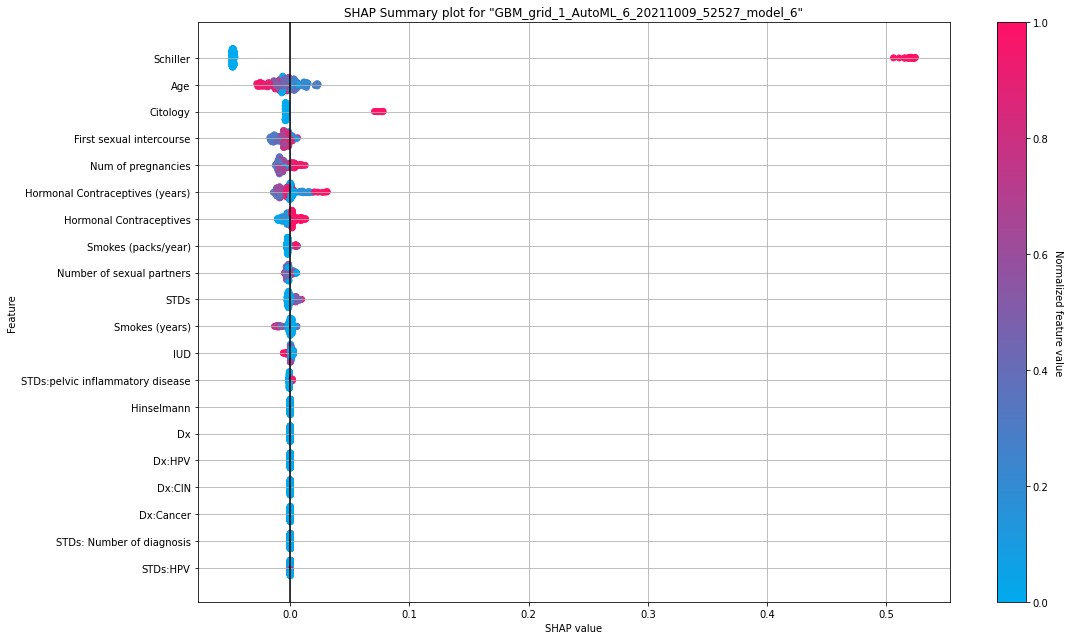

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

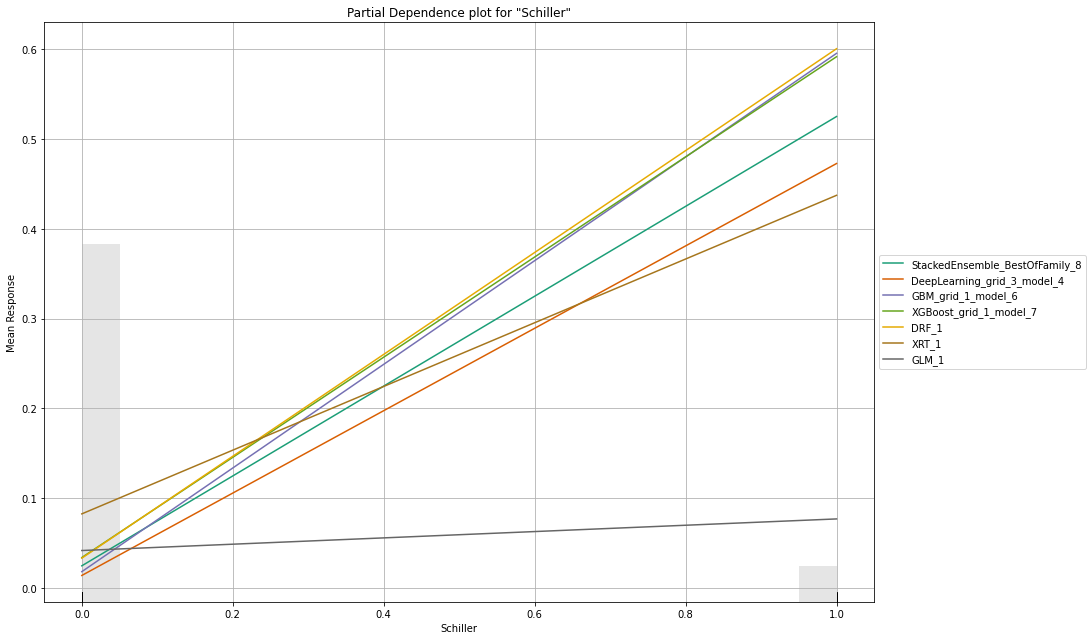

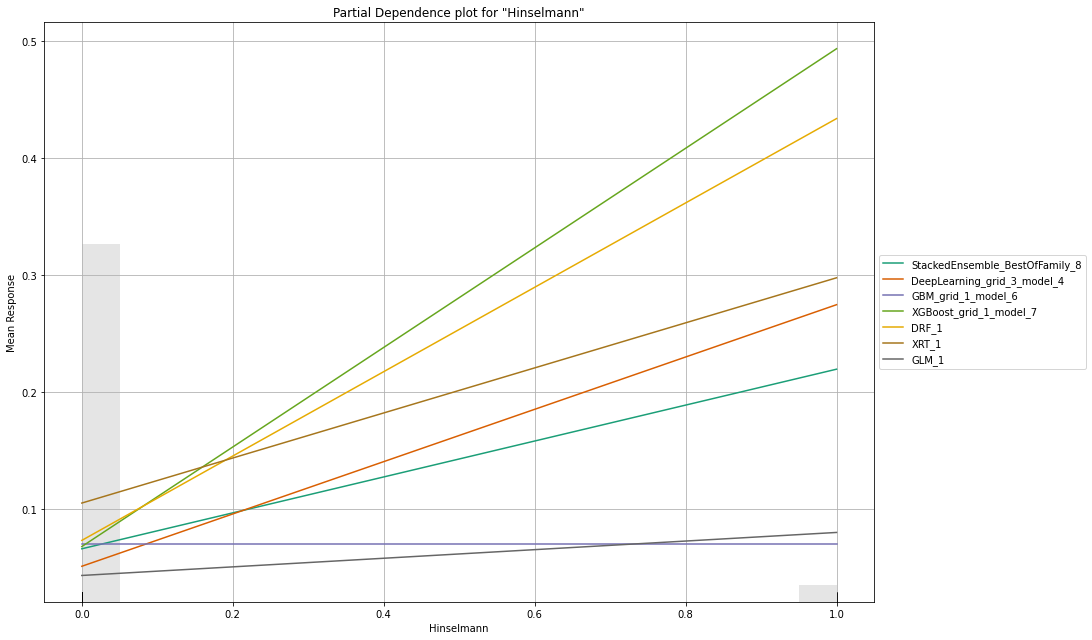

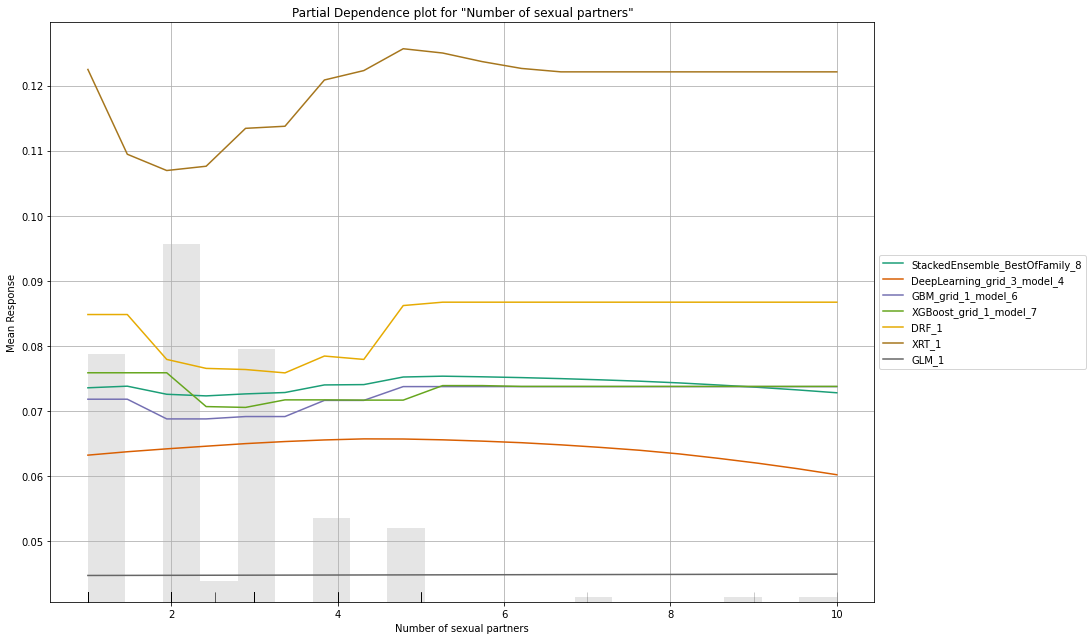

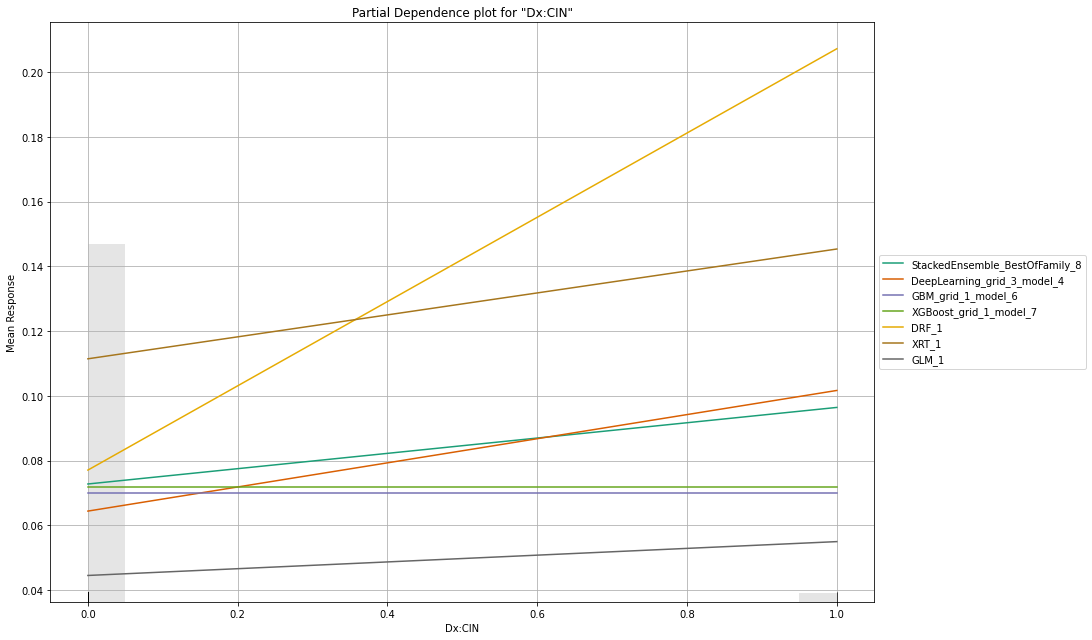

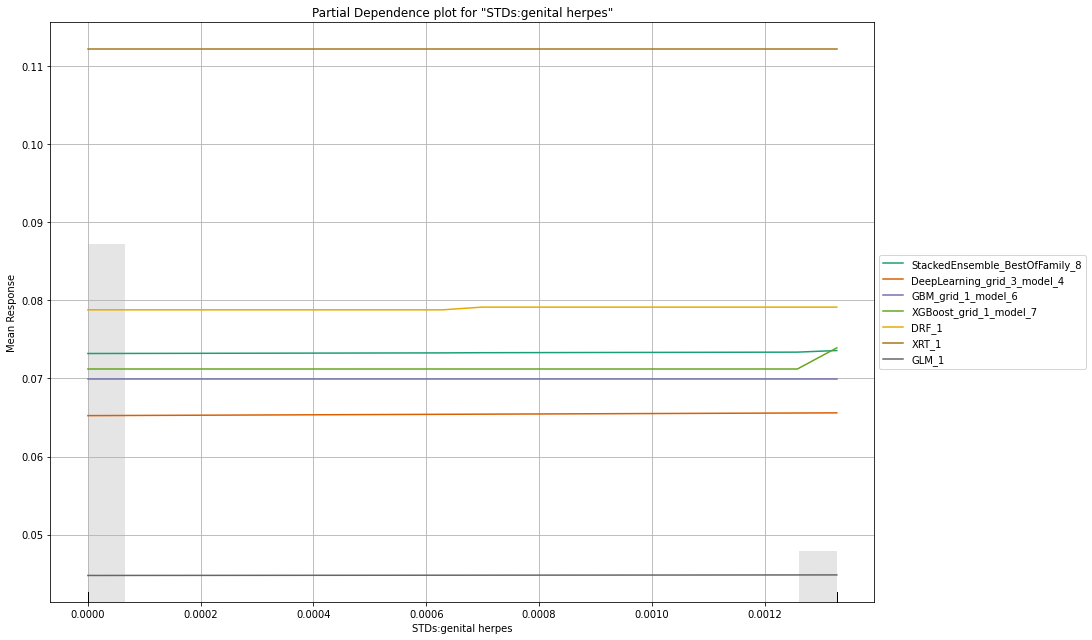

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

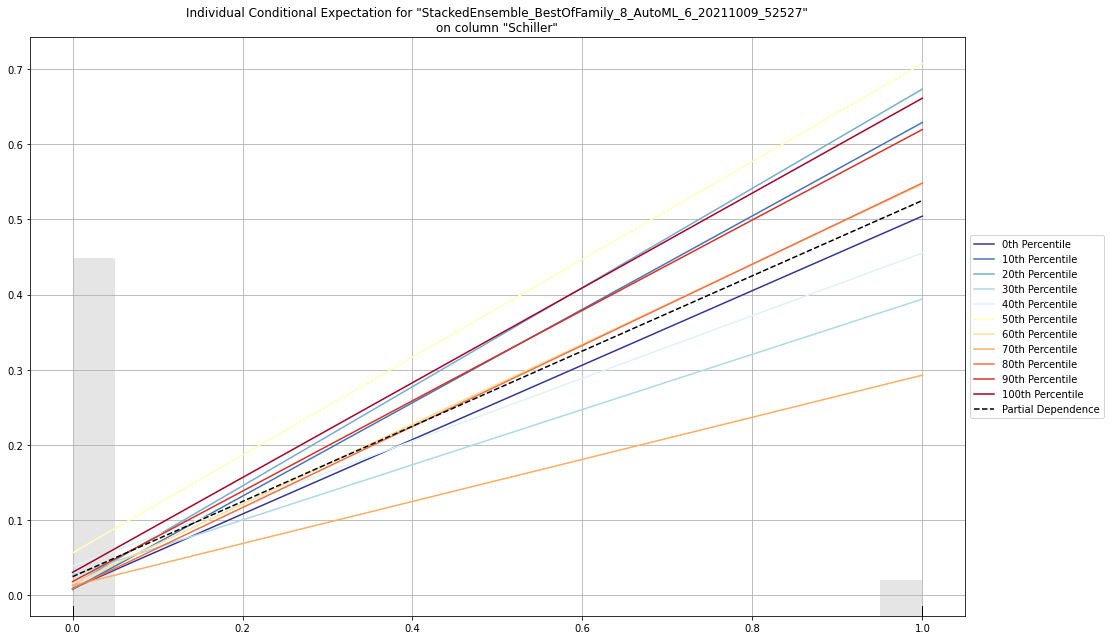

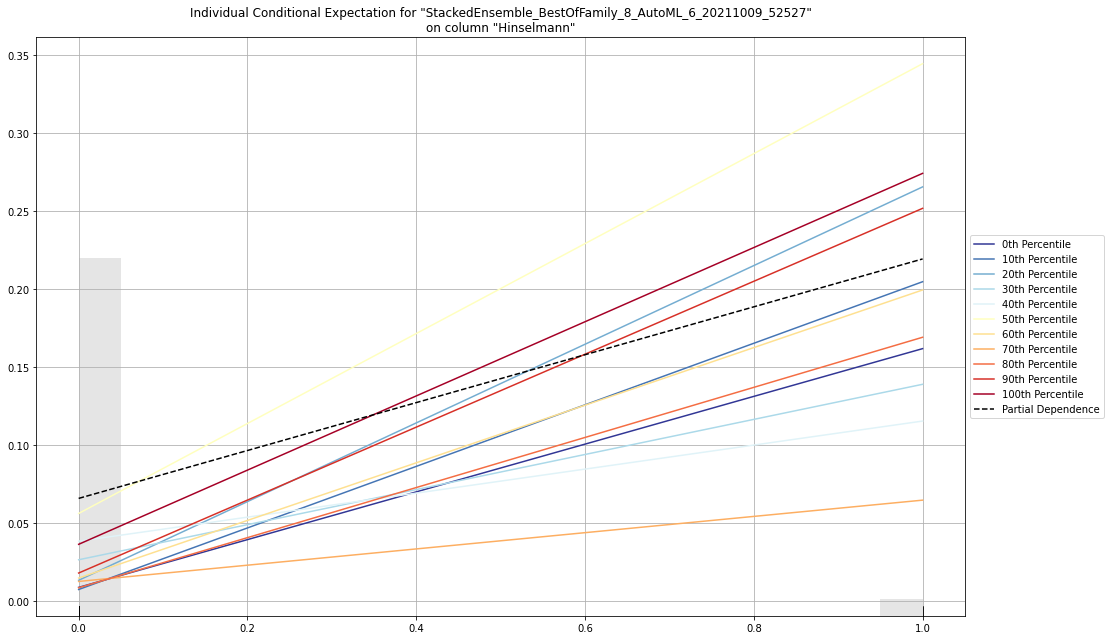

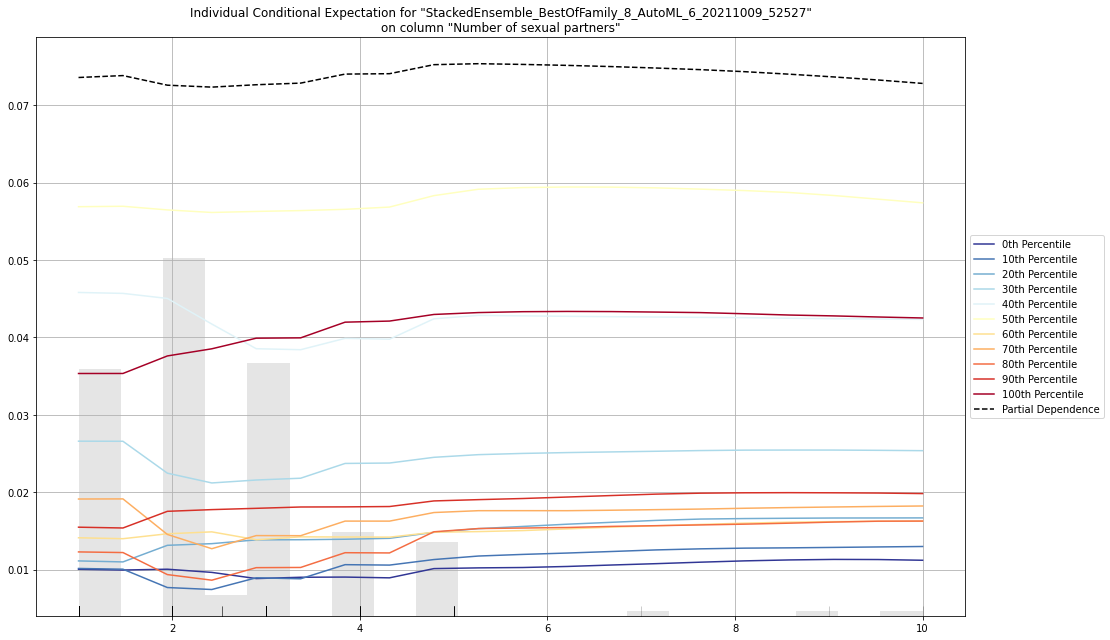

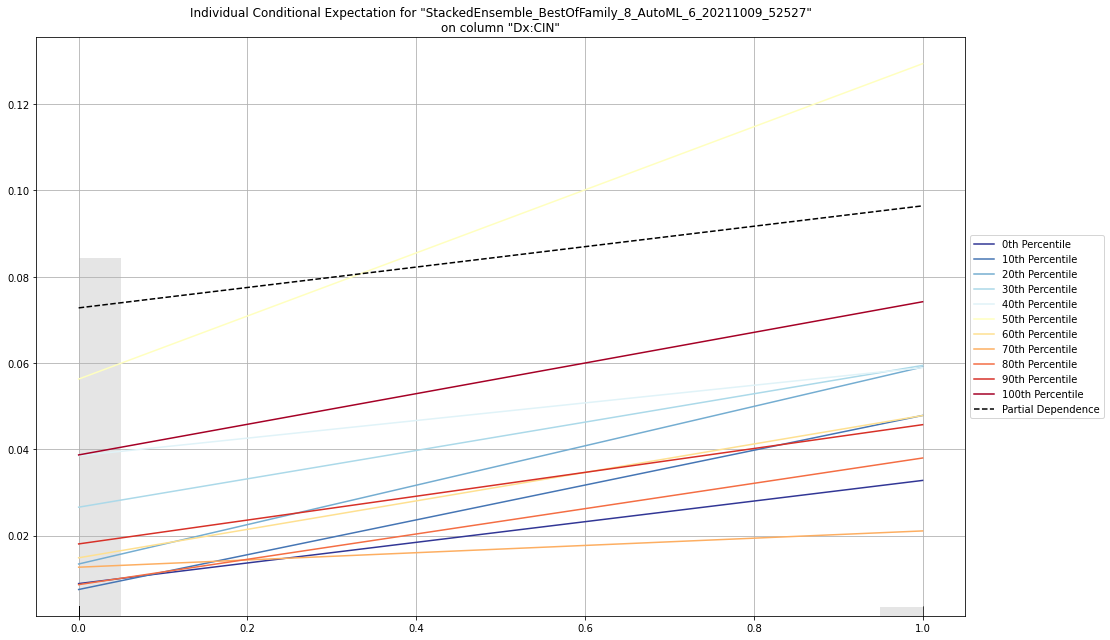

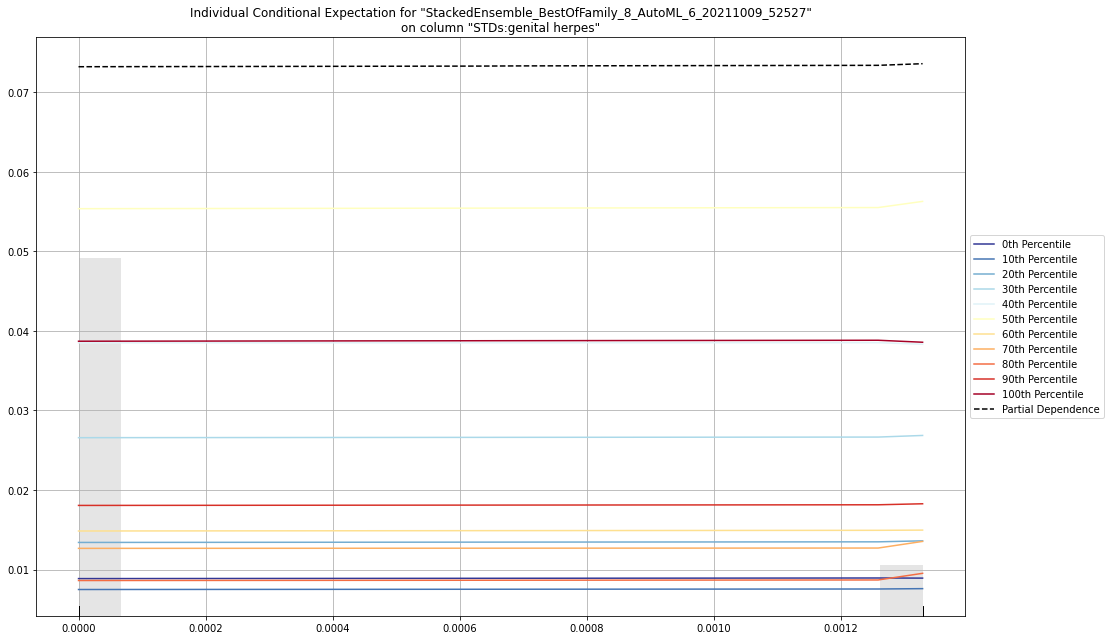

In [74]:
#compare all models
exm = aml.explain(test)

# Metalearner Exploration

In [75]:
#look at best model
se = aml.leader
metalearner = h2o.get_model(se.metalearner()['name'])

#look at important variables
metalearner.varimp()

/usr/local/lib/python3.7/dist-packages/h2o/estimators/stackedensemble.py:929: H2ODeprecationWarning:

The usage of stacked_ensemble.metalearner()['name'] will be deprecated. Metalearner now returns the metalearner object. If you need to get the 'name' please use stacked_ensemble.metalearner().model_id



[('DeepLearning_grid_3_AutoML_6_20211009_52527_model_4',
  0.0918673723936081,
  1.0,
  0.515520227214333),
 ('GBM_grid_1_AutoML_6_20211009_52527_model_6',
  0.06457794457674026,
  0.7029475524787453,
  0.36238368197360205),
 ('XGBoost_grid_1_AutoML_6_20211009_52527_model_7',
  0.01303909718990326,
  0.14193392986181116,
  0.0731698117717841),
 ('DRF_1_AutoML_6_20211009_52527',
  0.008718821220099926,
  0.0949066136641409,
  0.04892627904028084),
 ('XRT_1_AutoML_6_20211009_52527', 0.0, 0.0, 0.0),
 ('GLM_1_AutoML_6_20211009_52527', 0.0, 0.0, 0.0)]

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

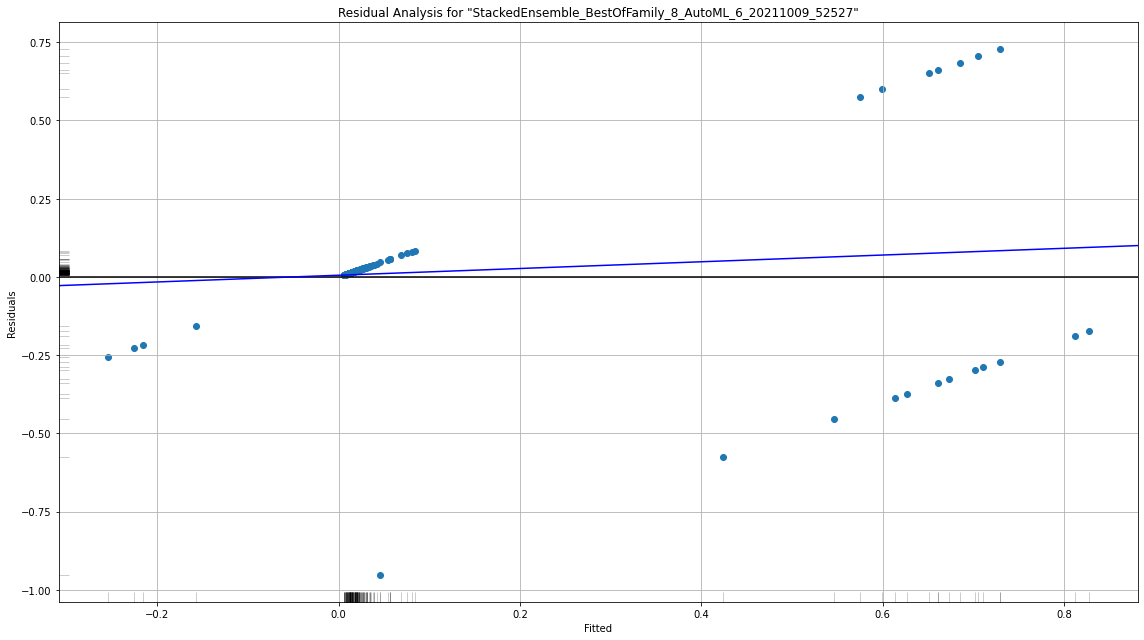

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

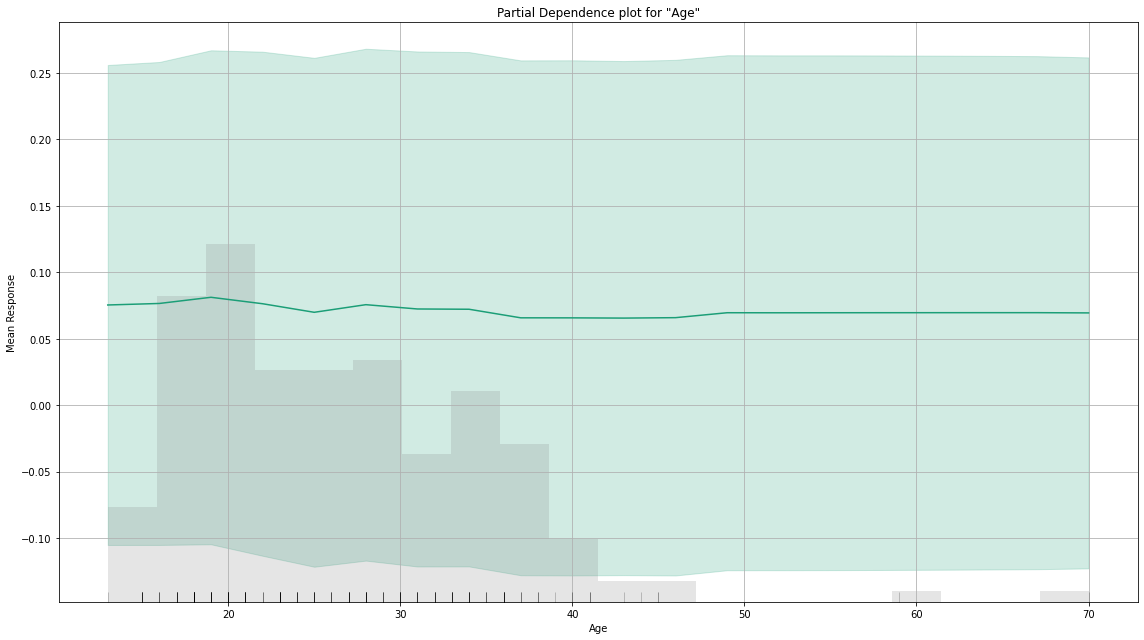

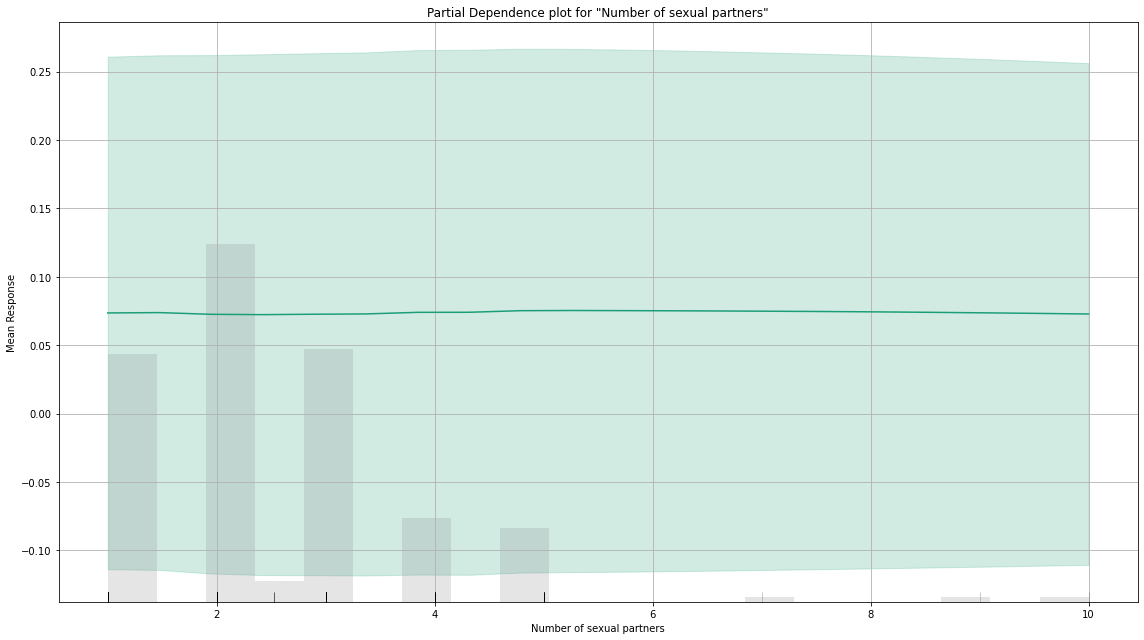

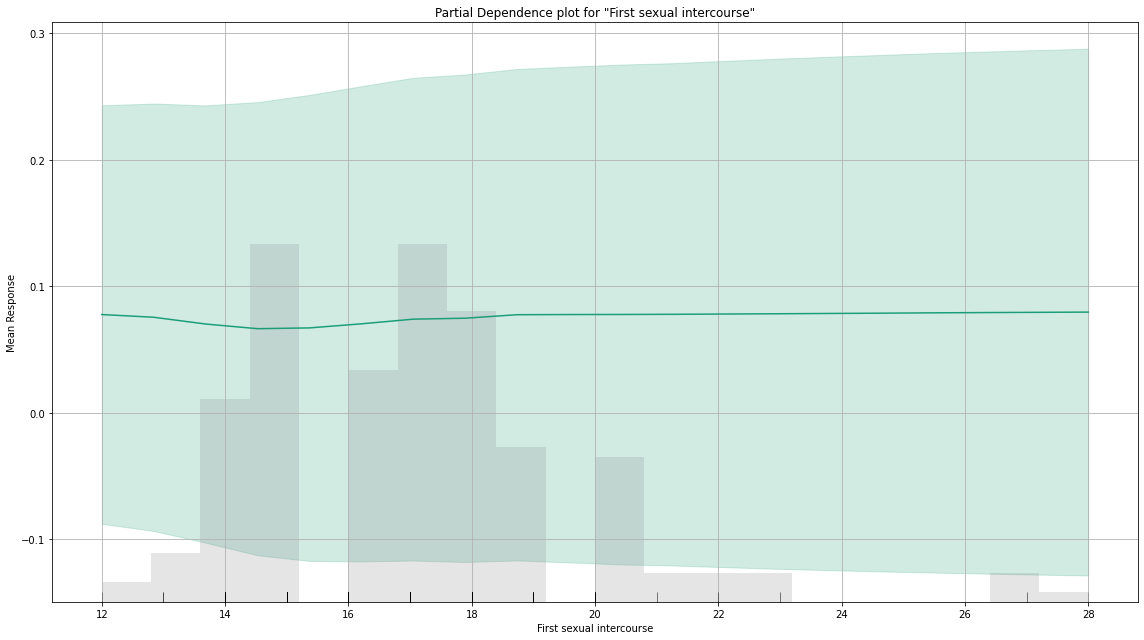

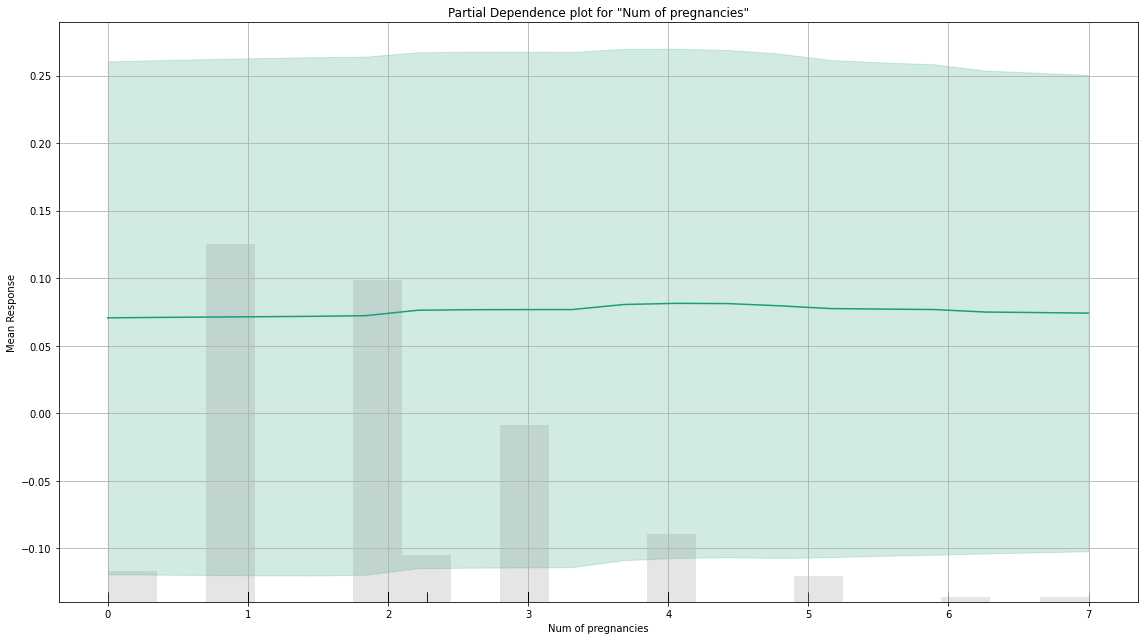

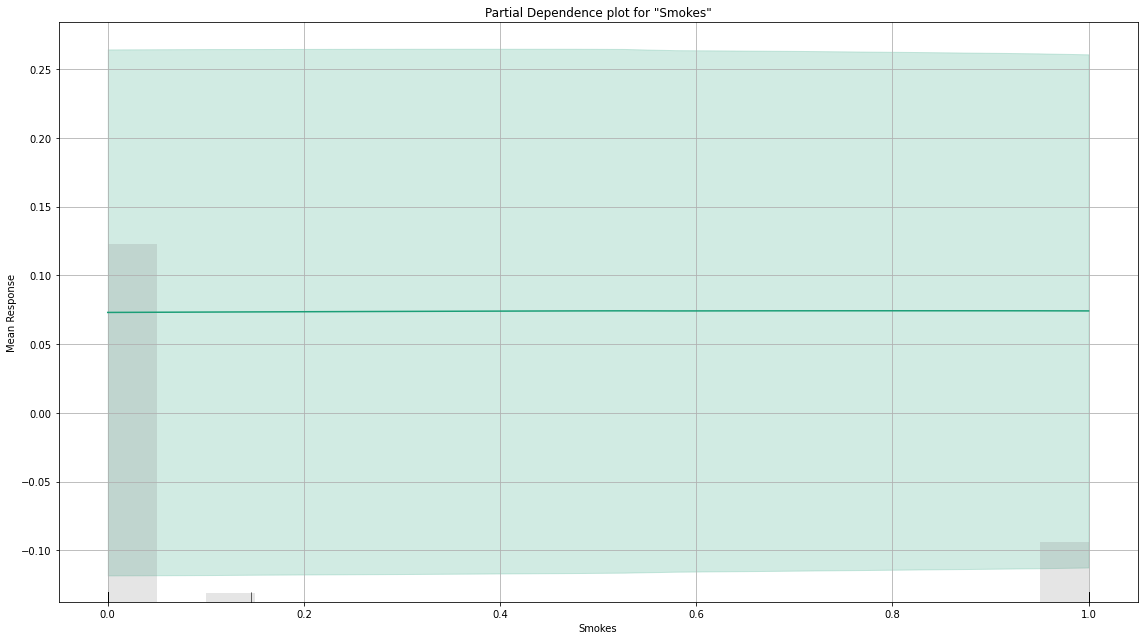

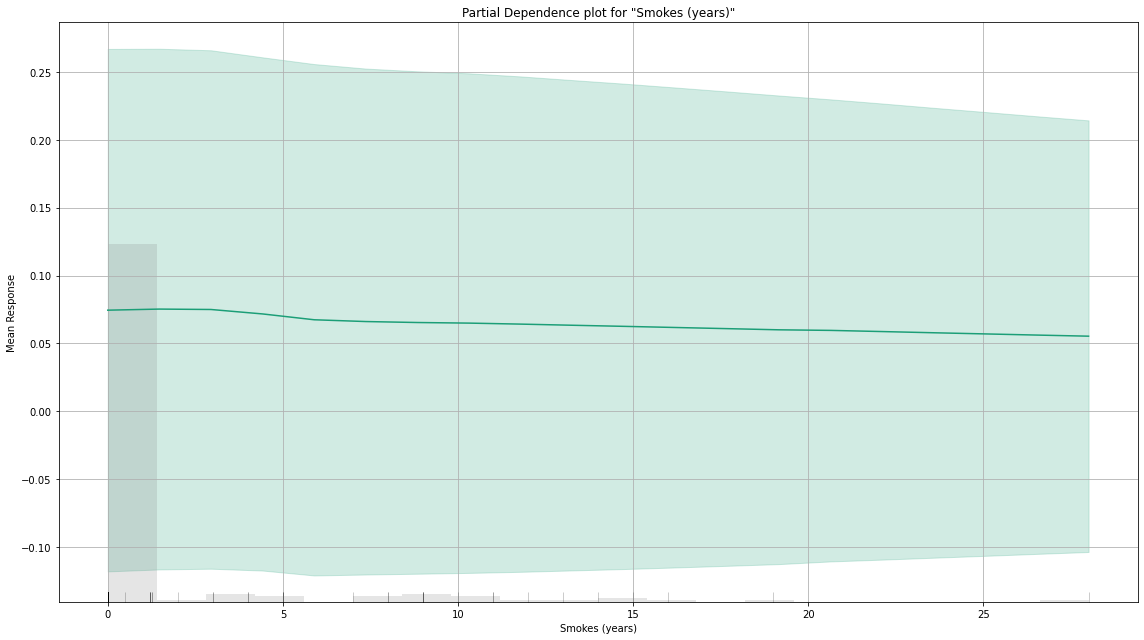

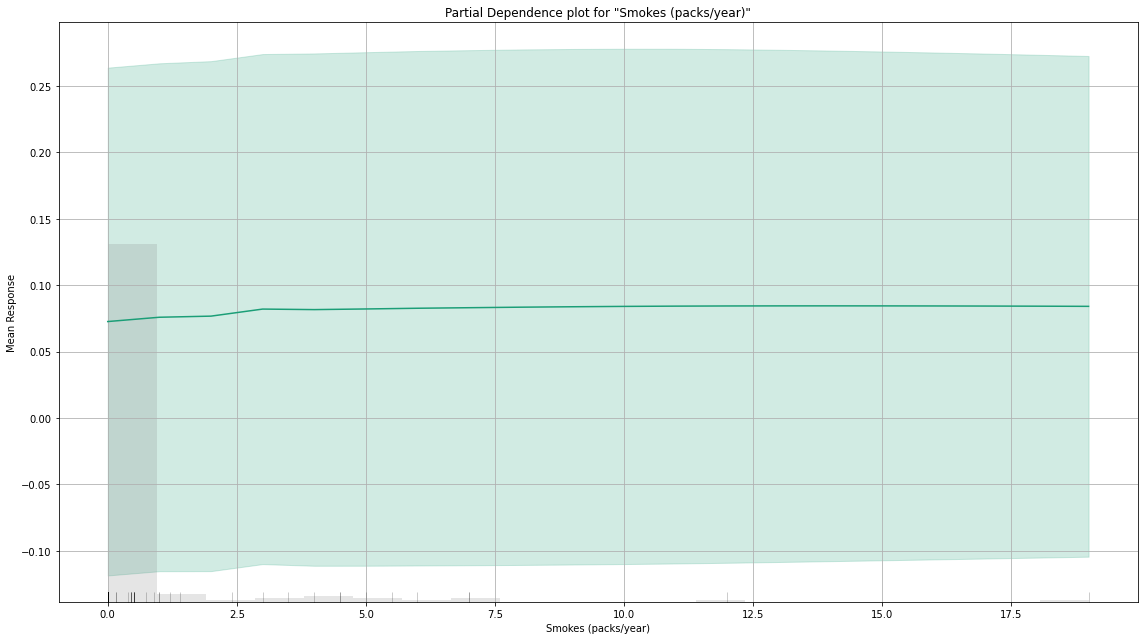

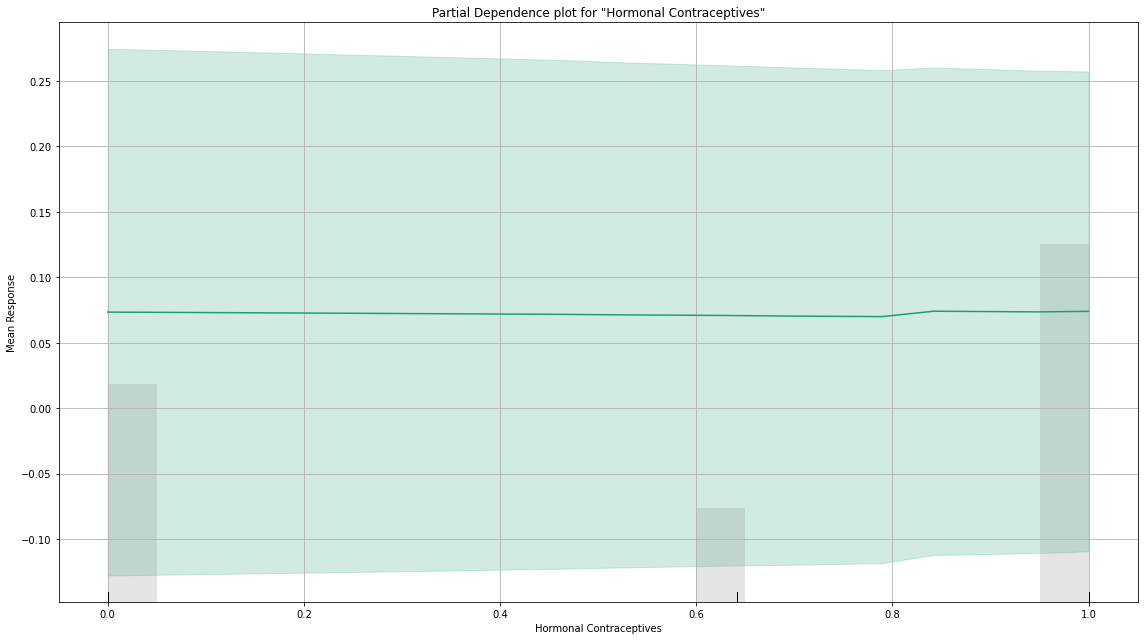

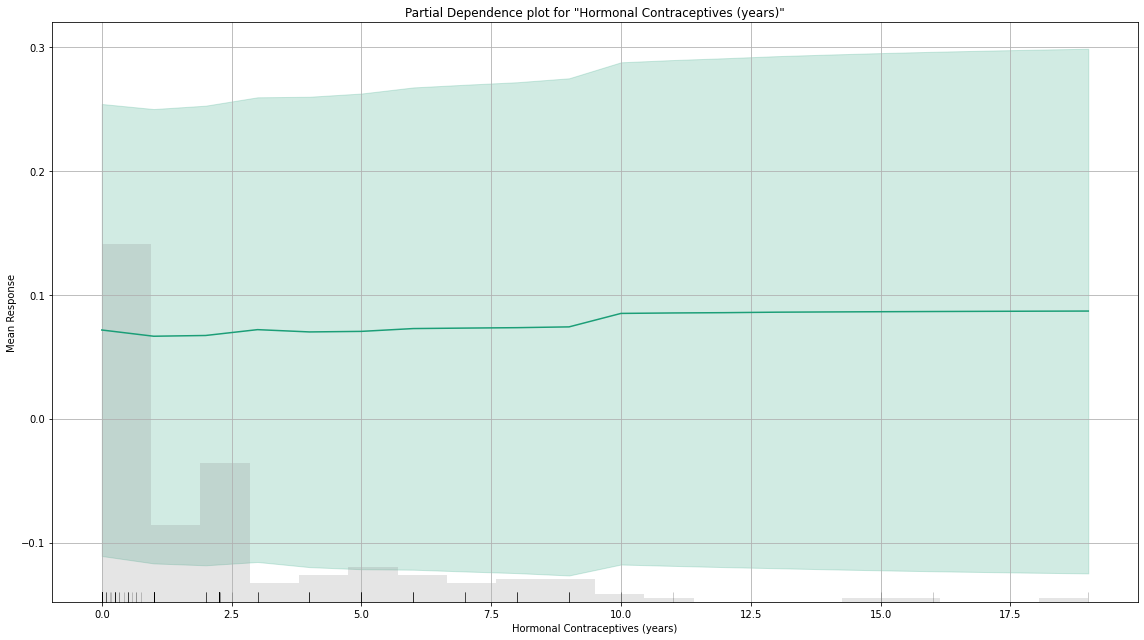

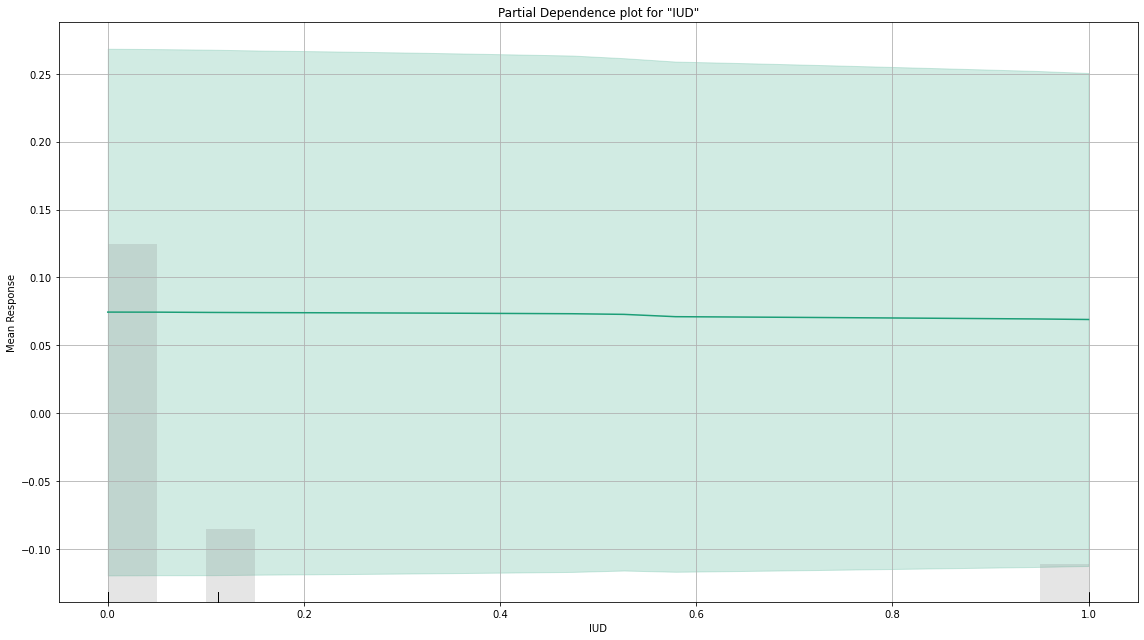

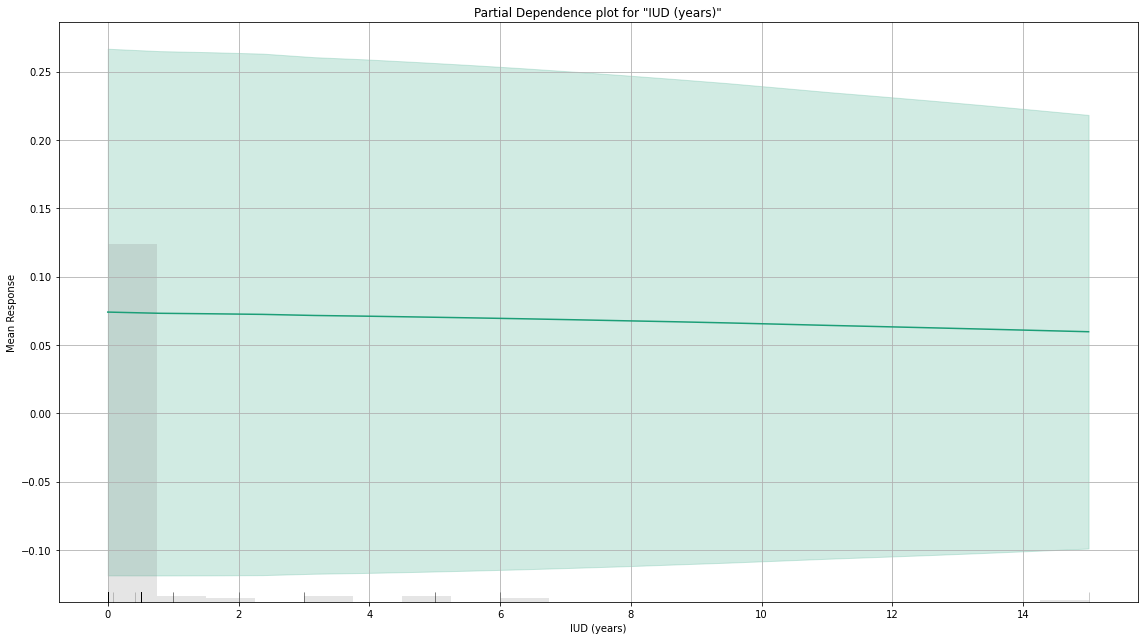

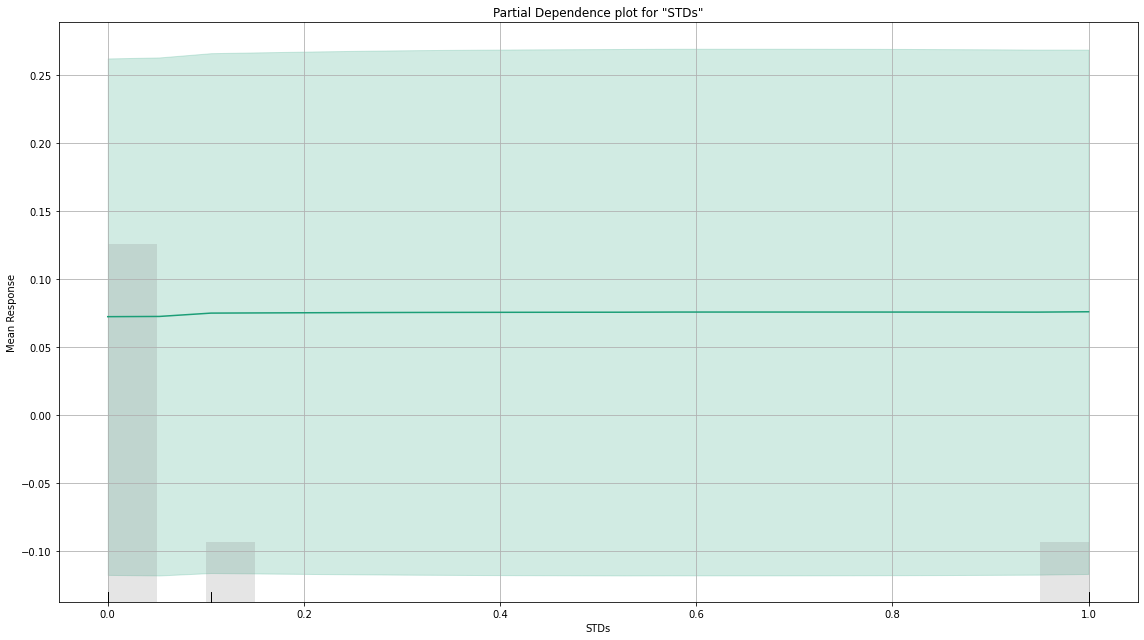

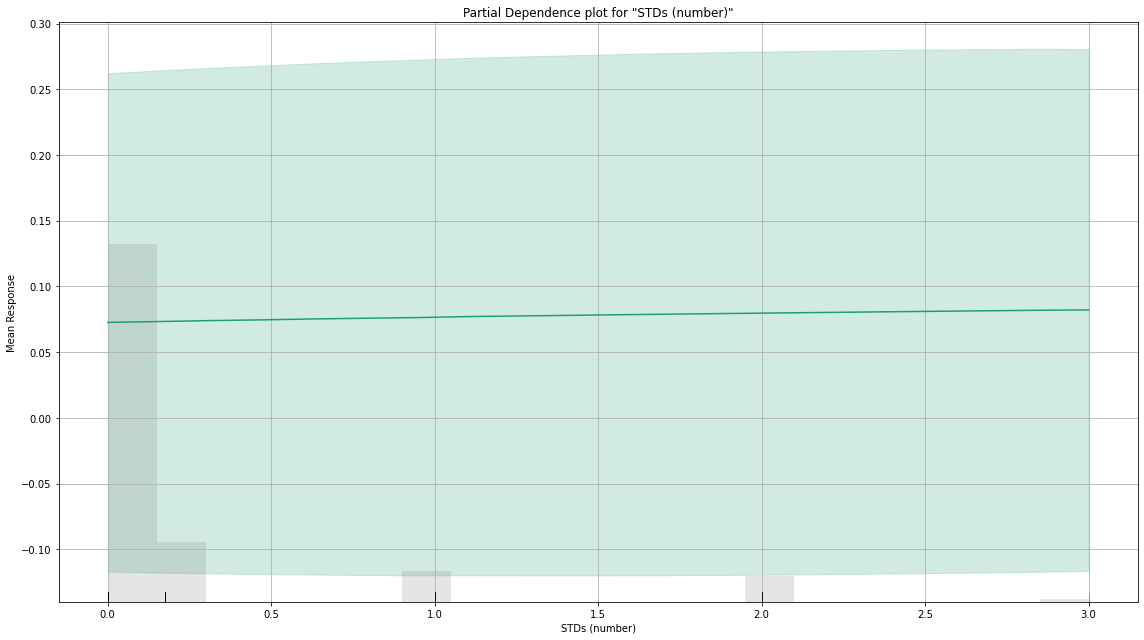

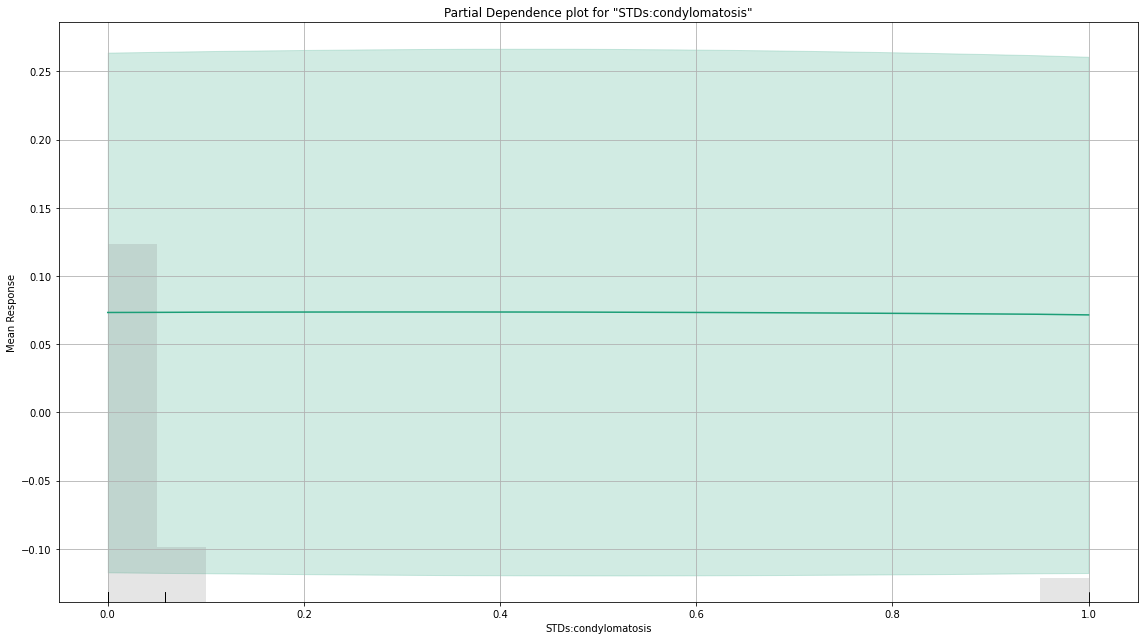

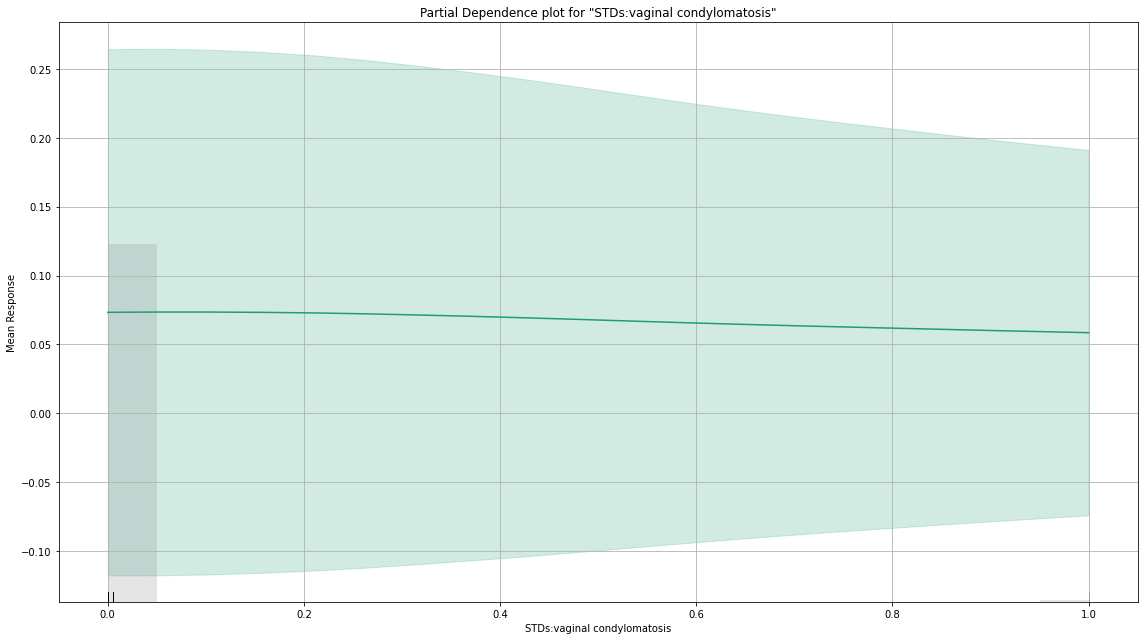

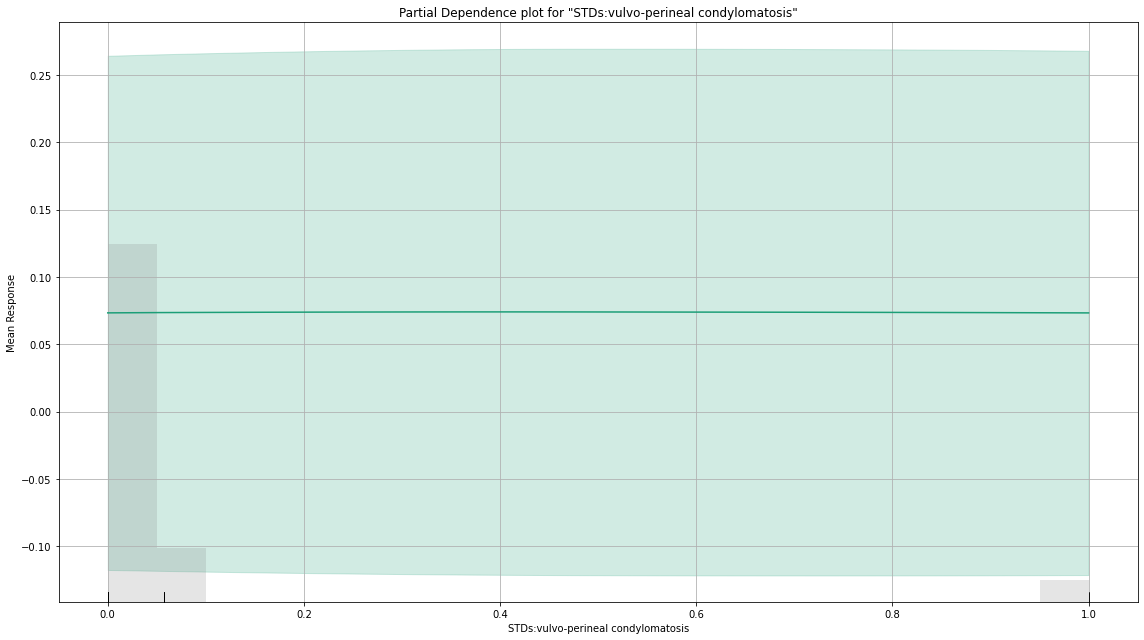

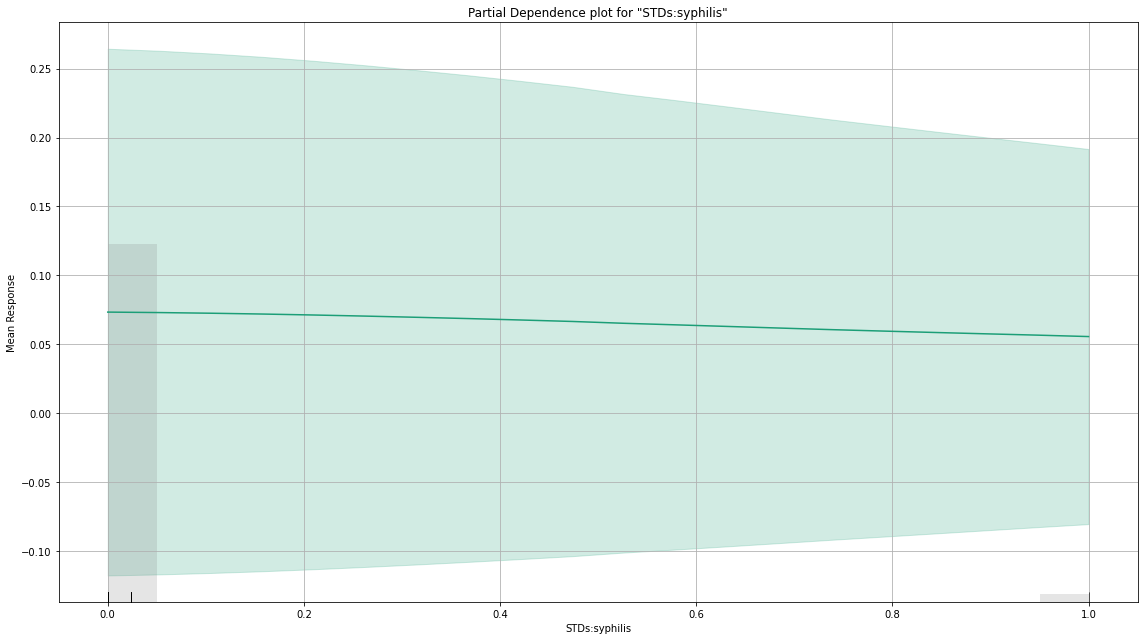

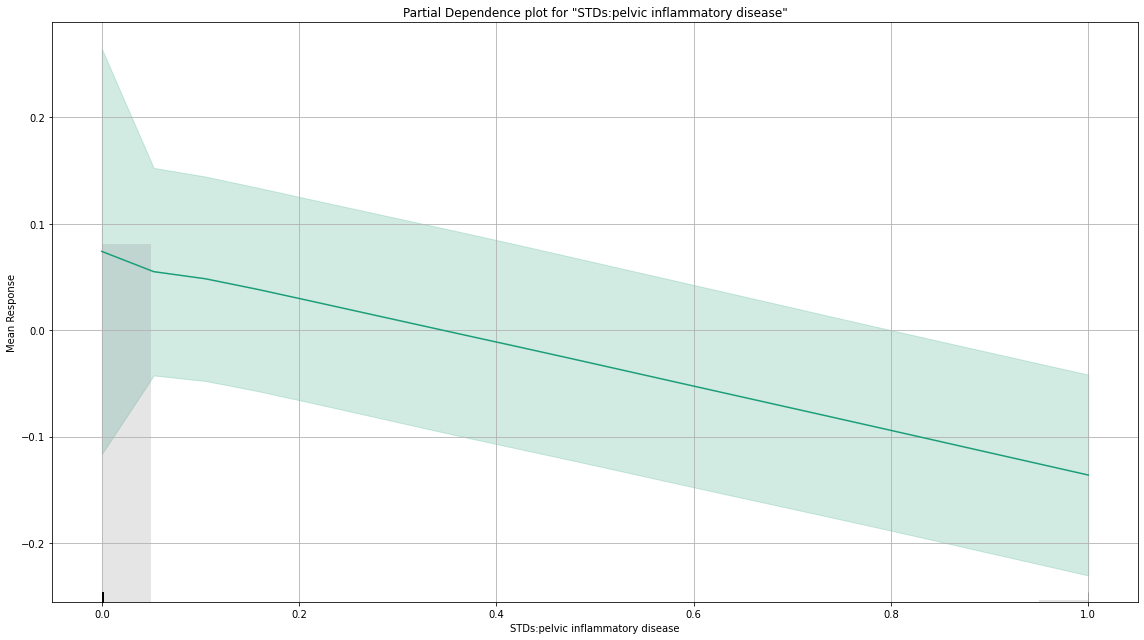

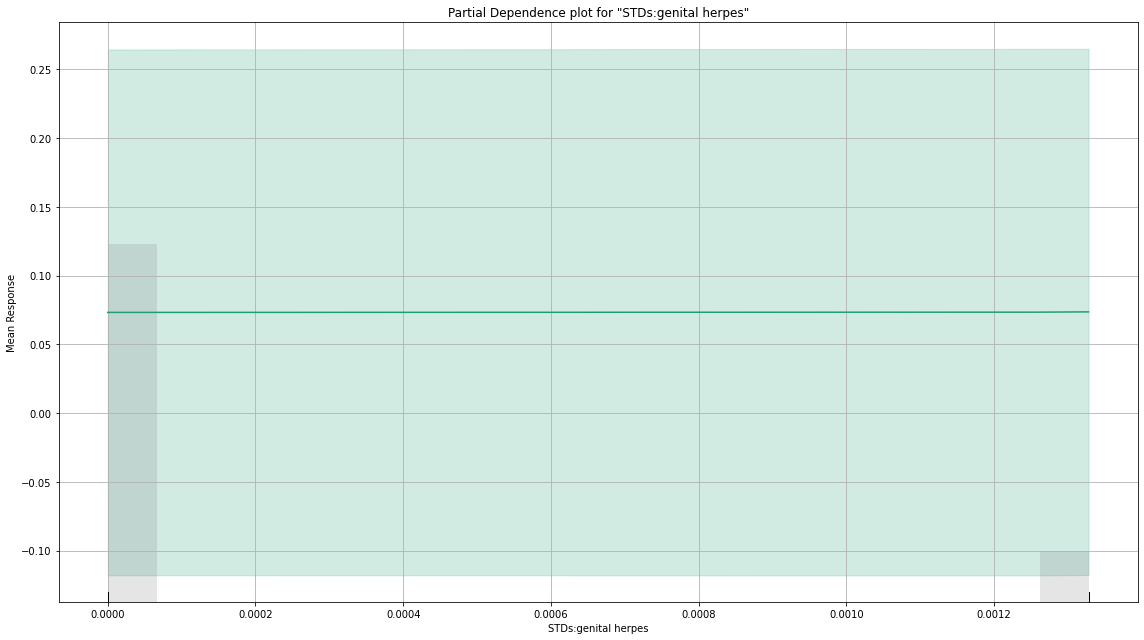

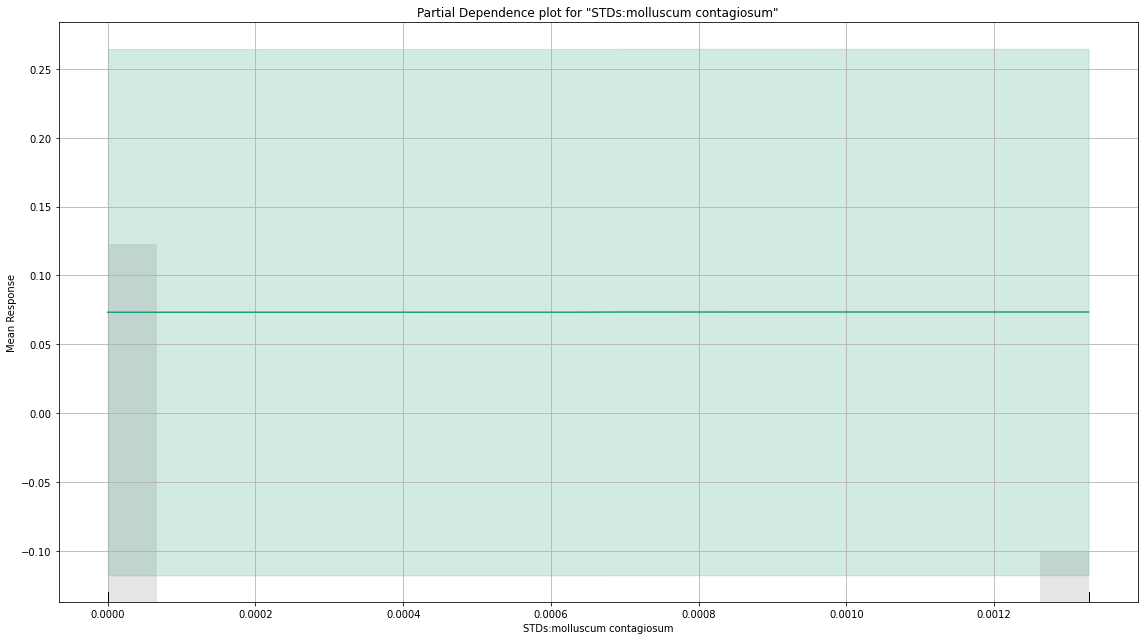

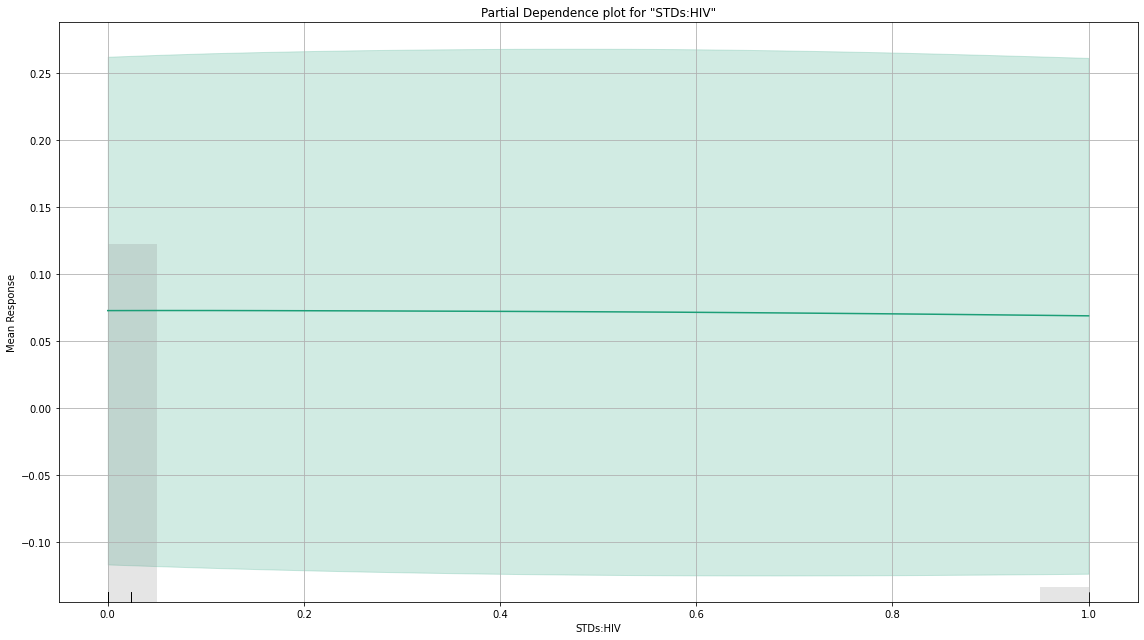

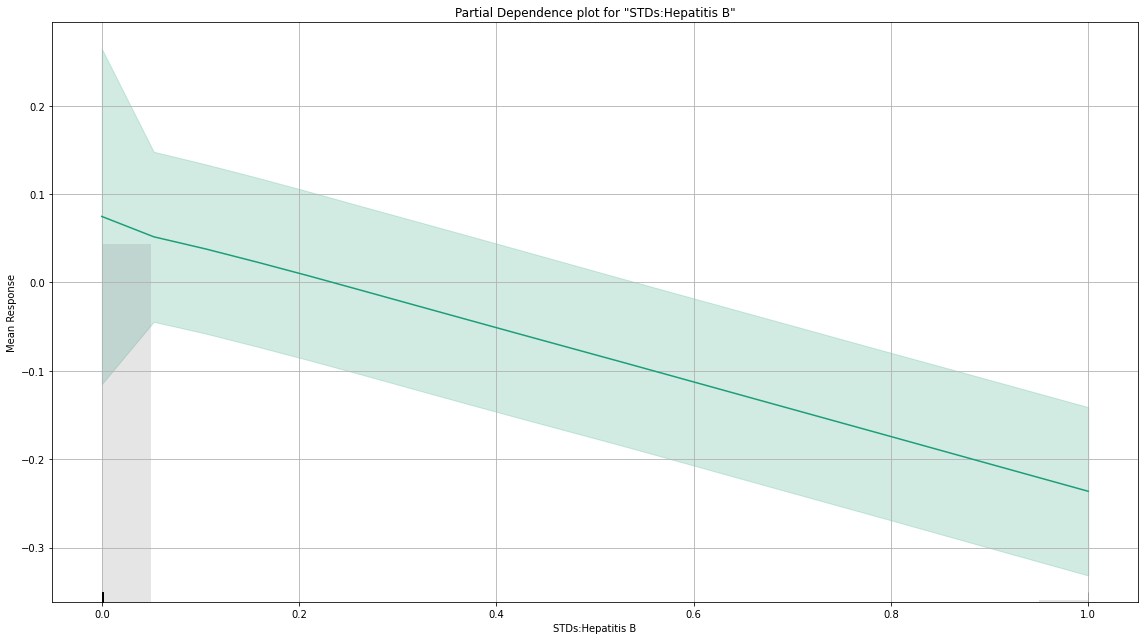

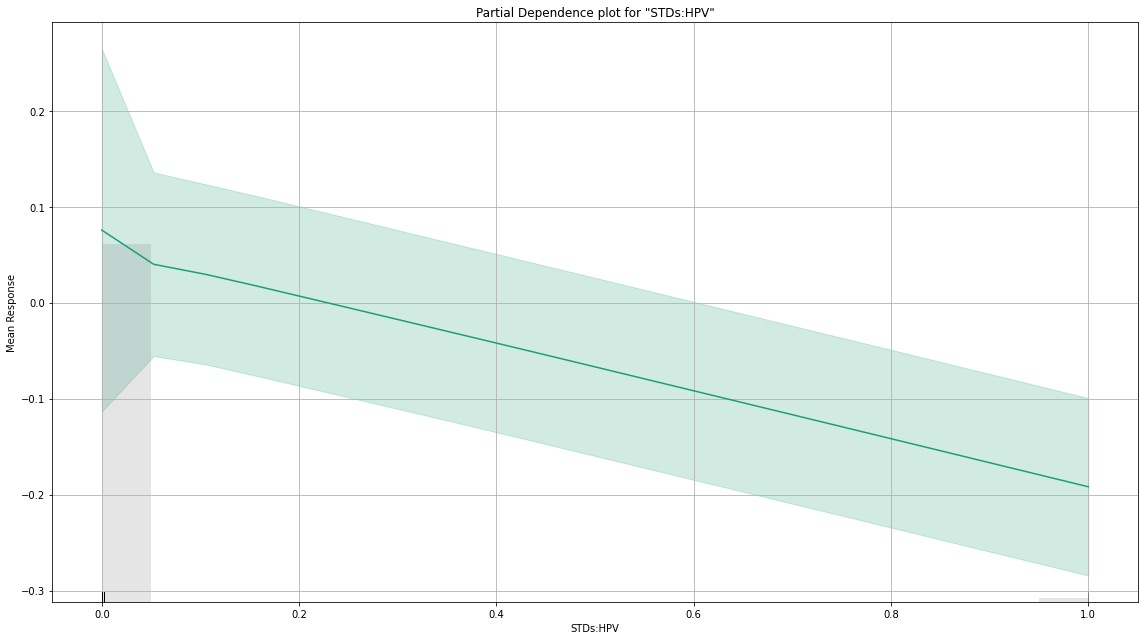

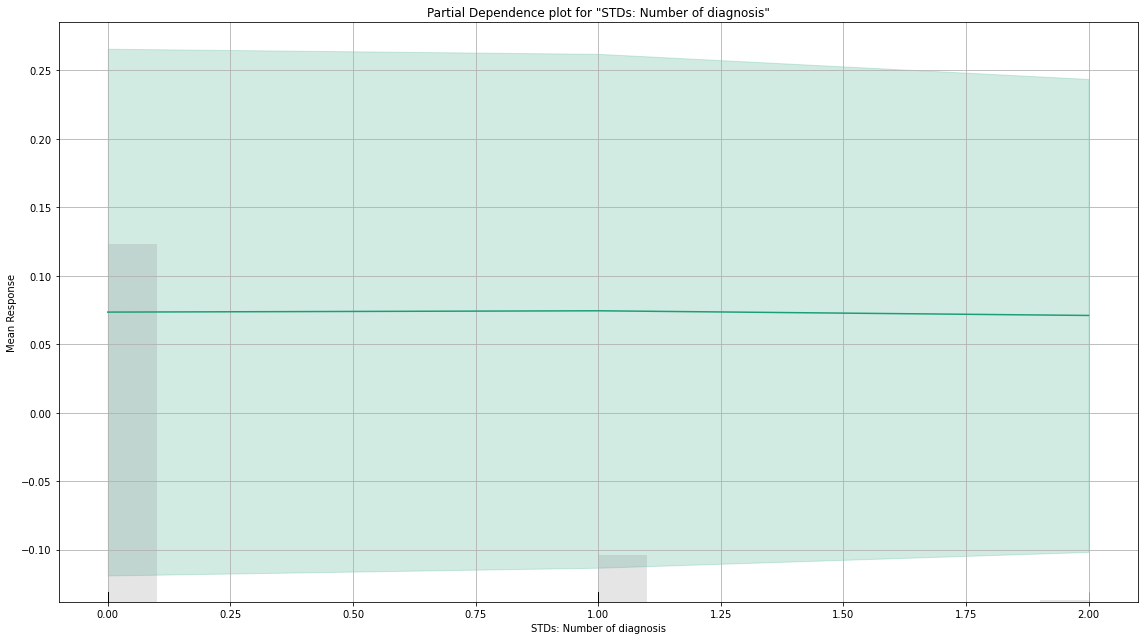

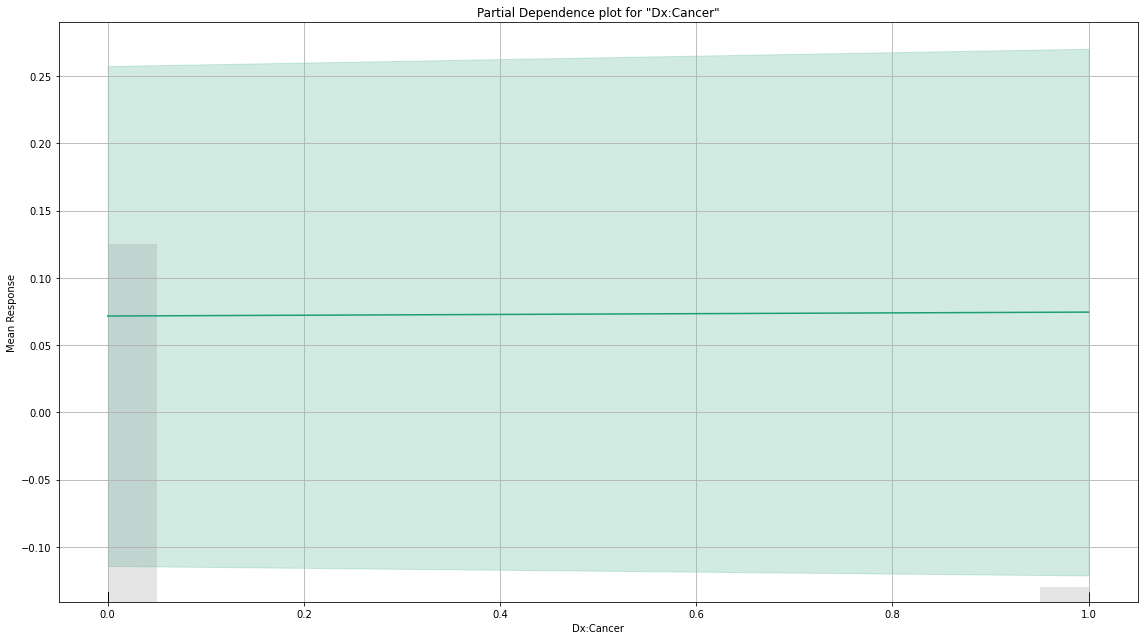

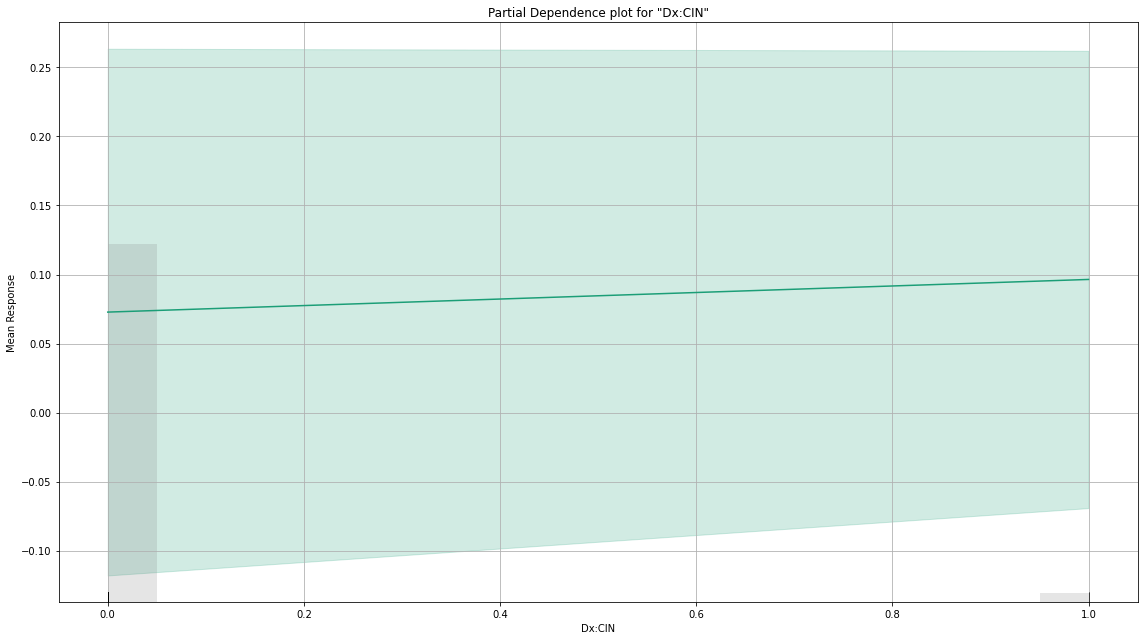

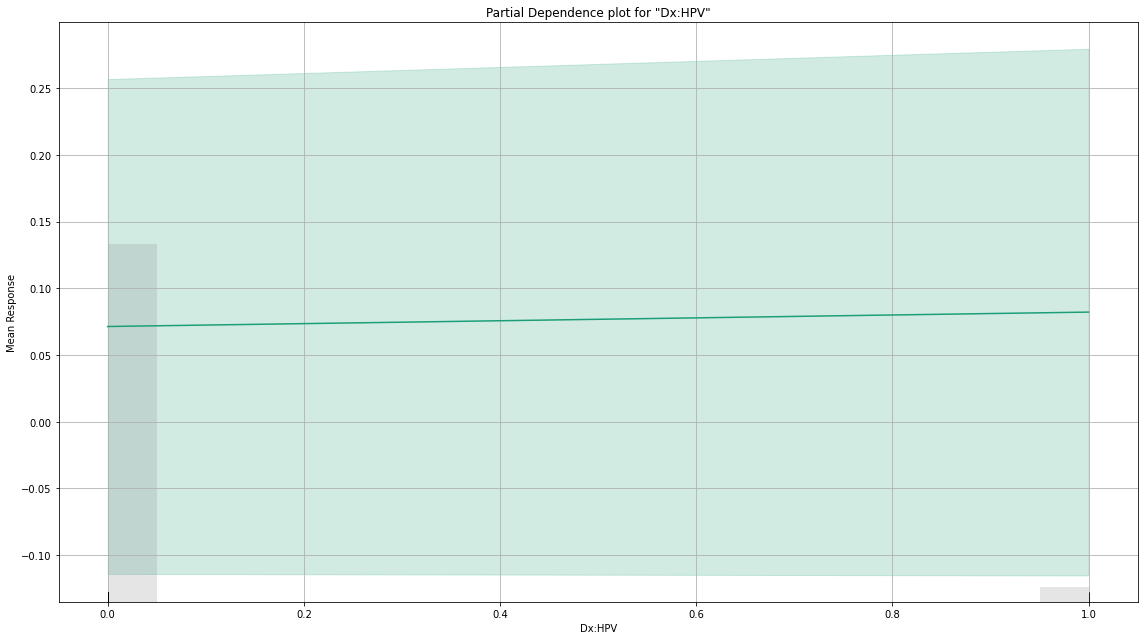

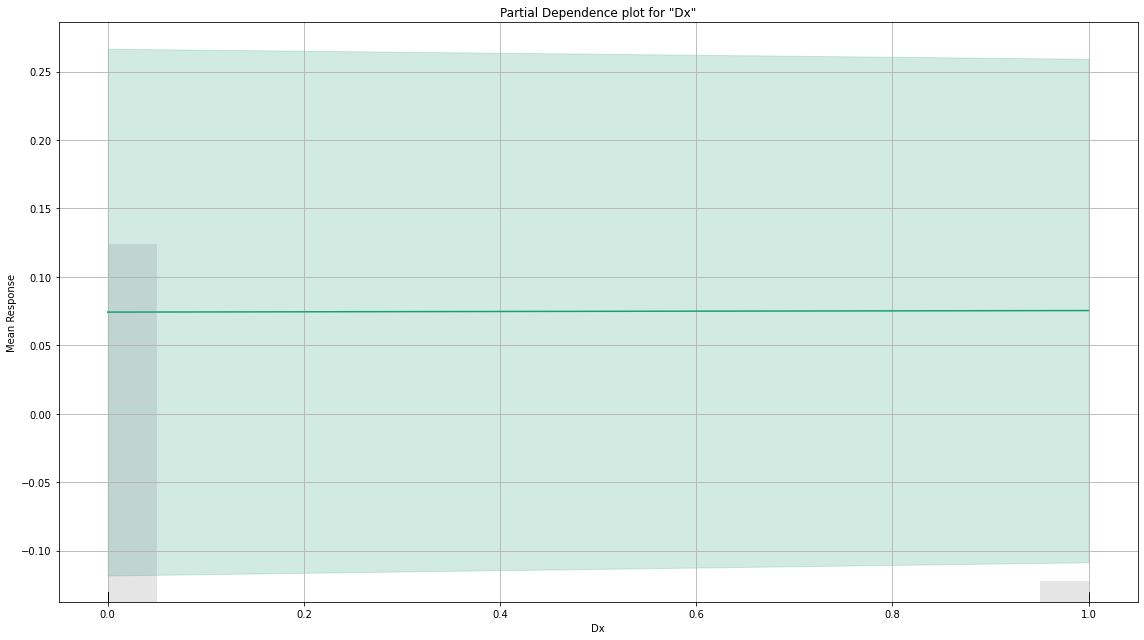

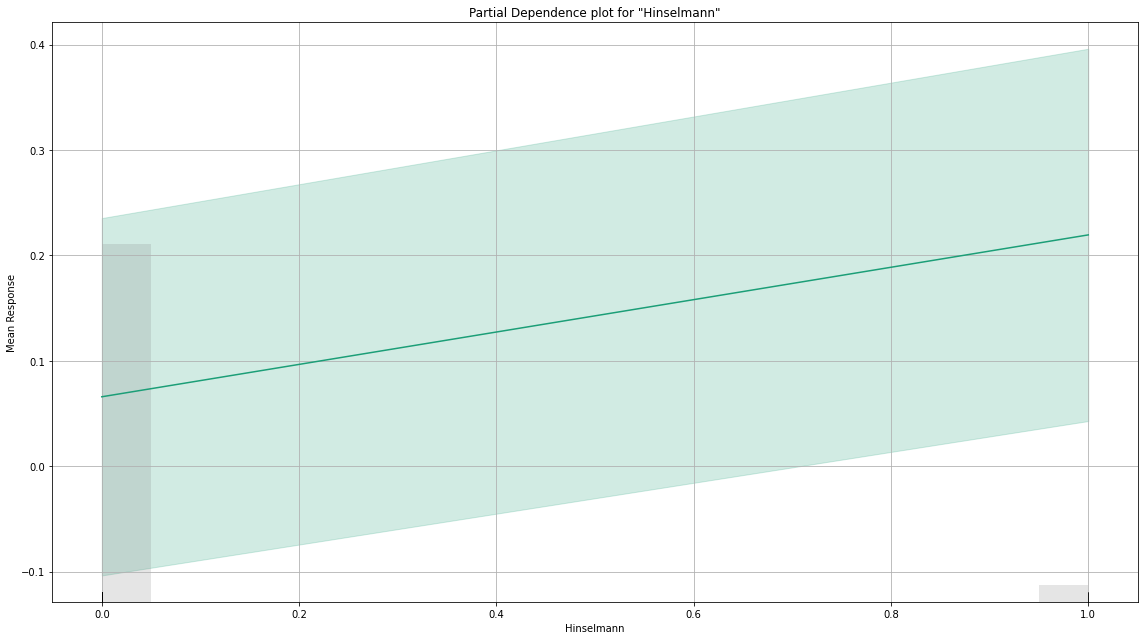

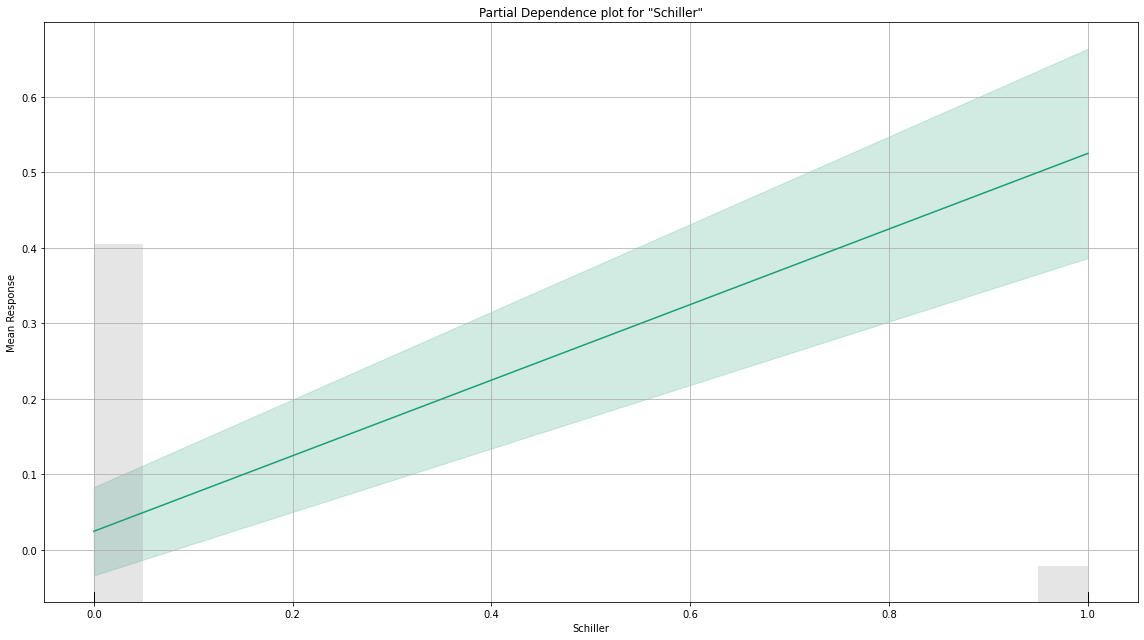

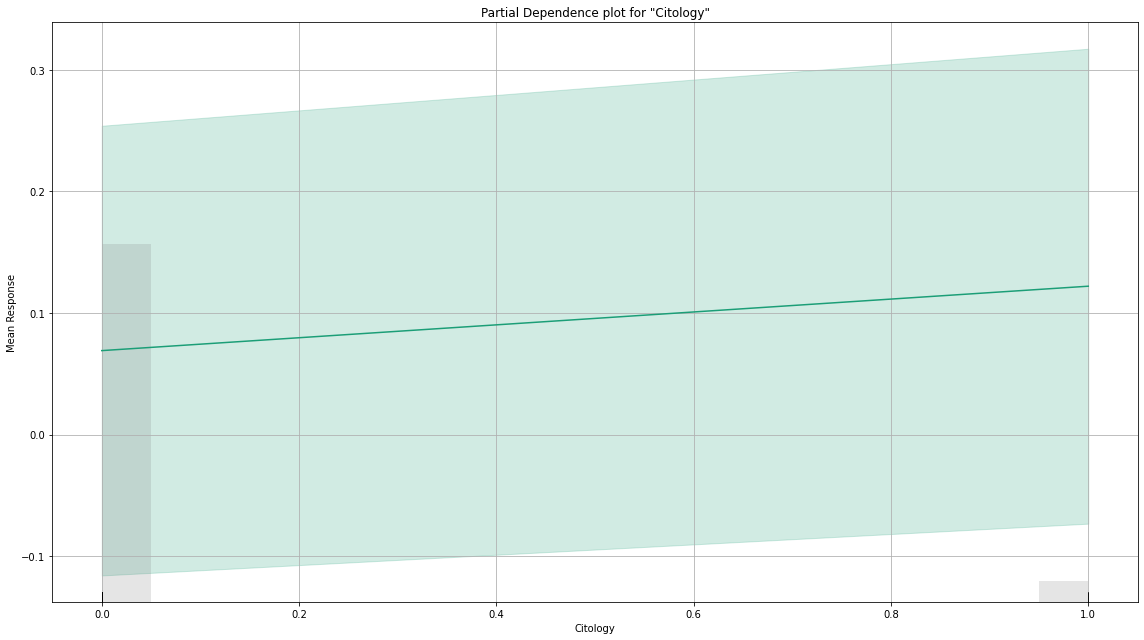

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

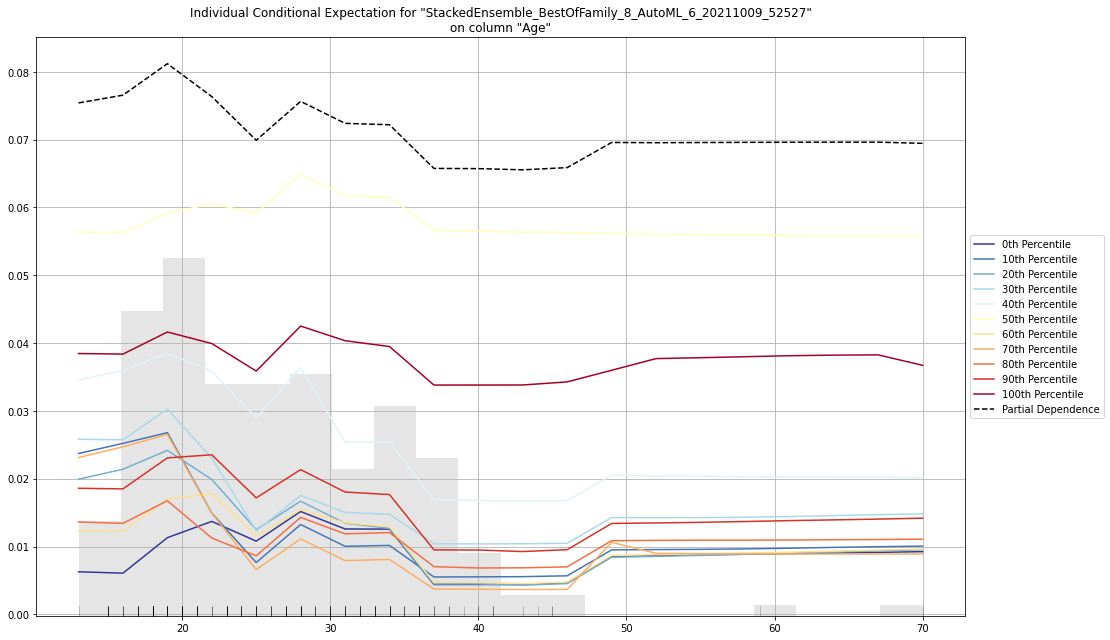

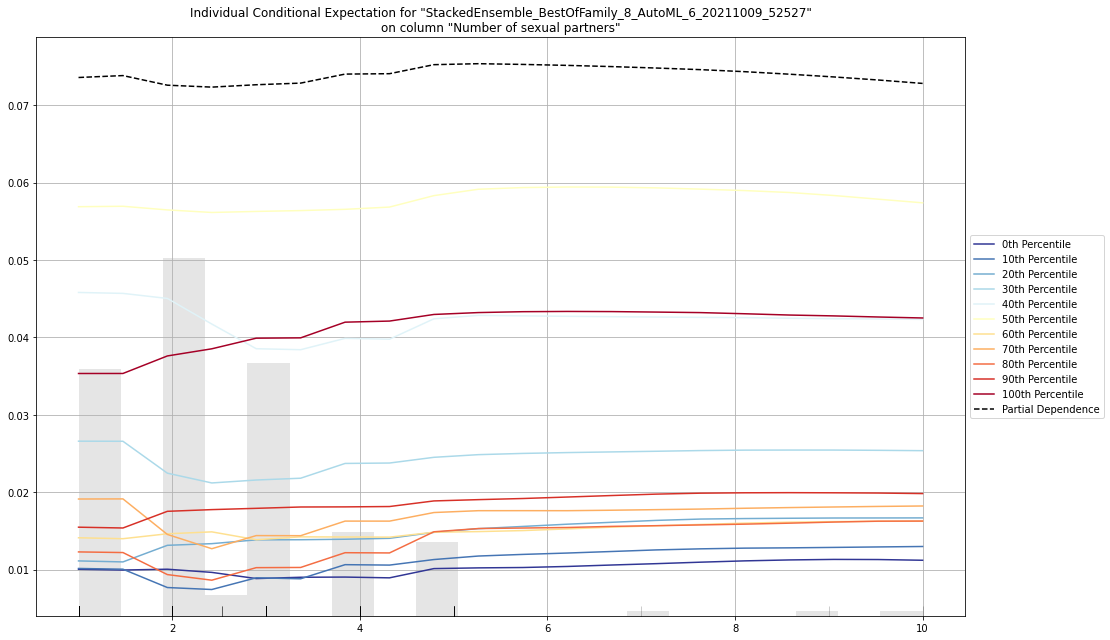

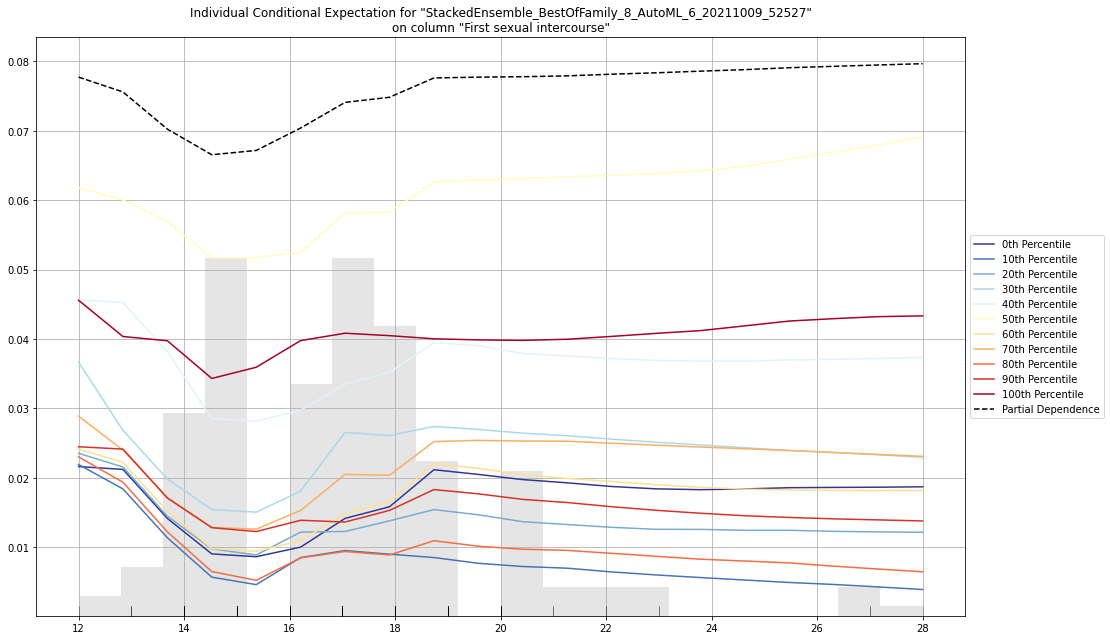

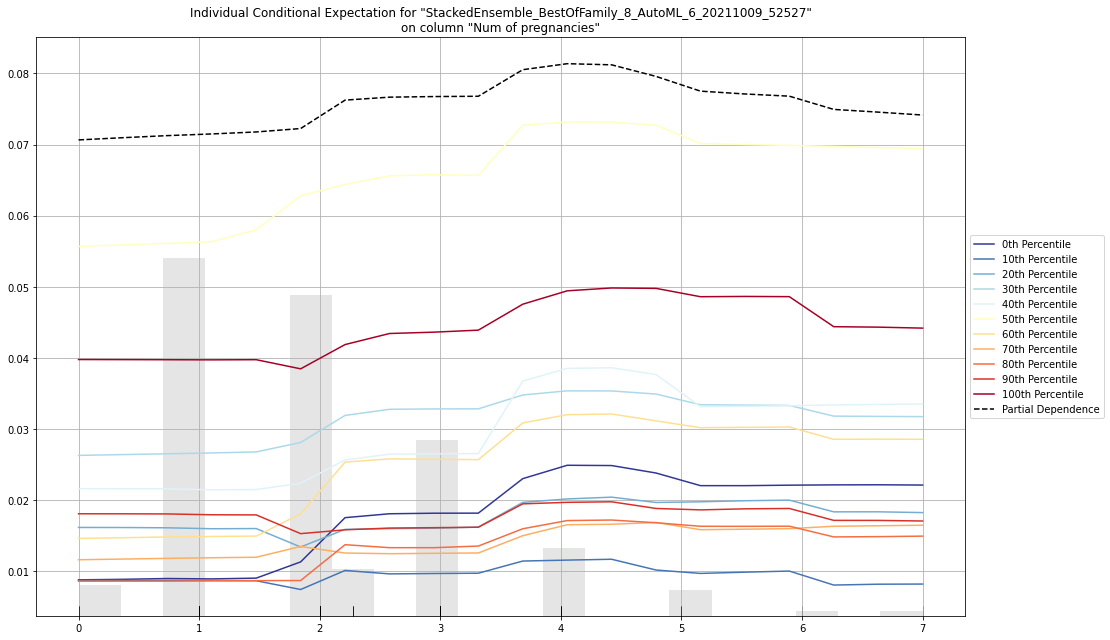

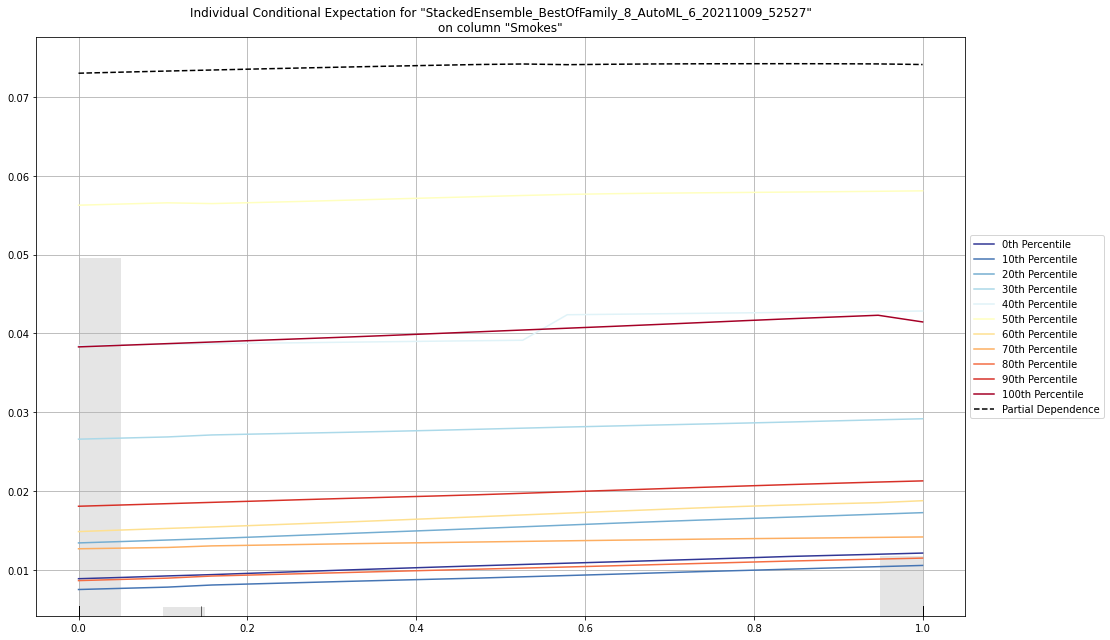

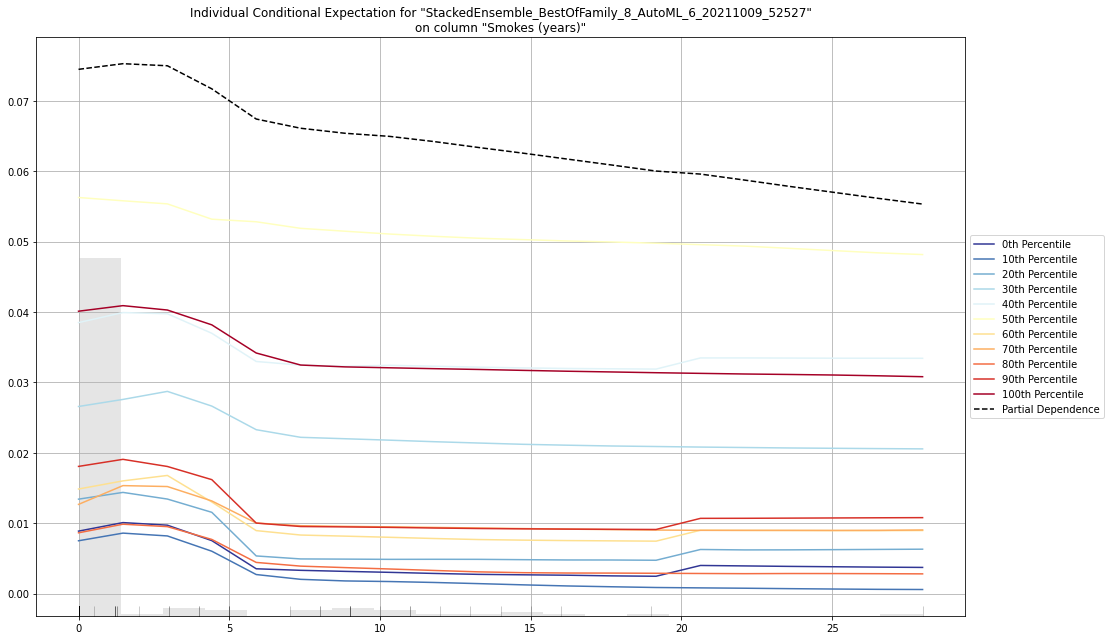

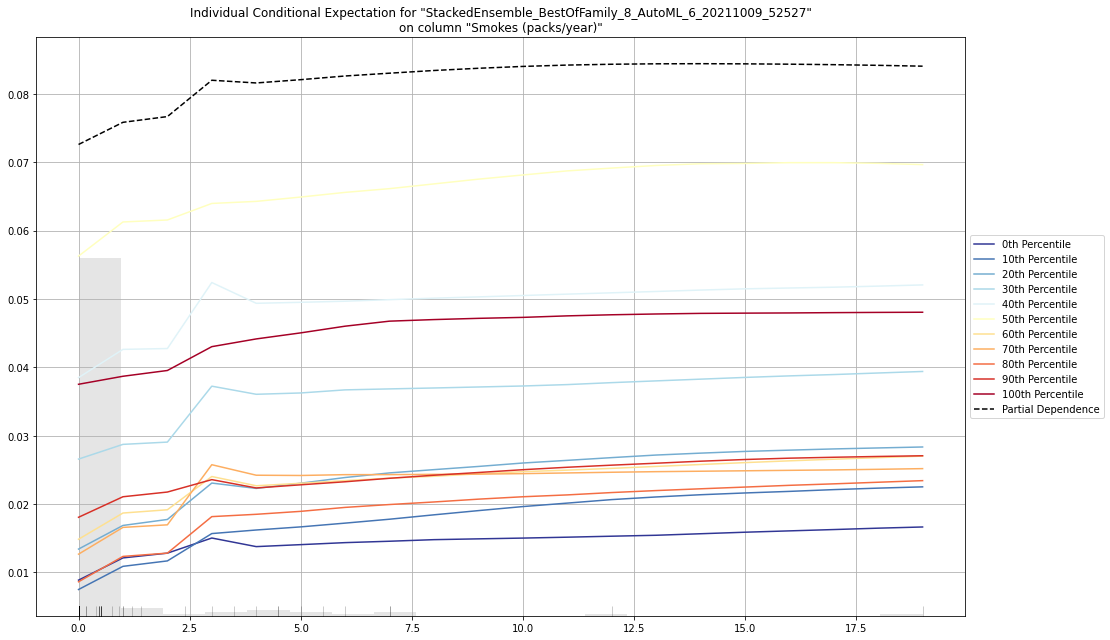

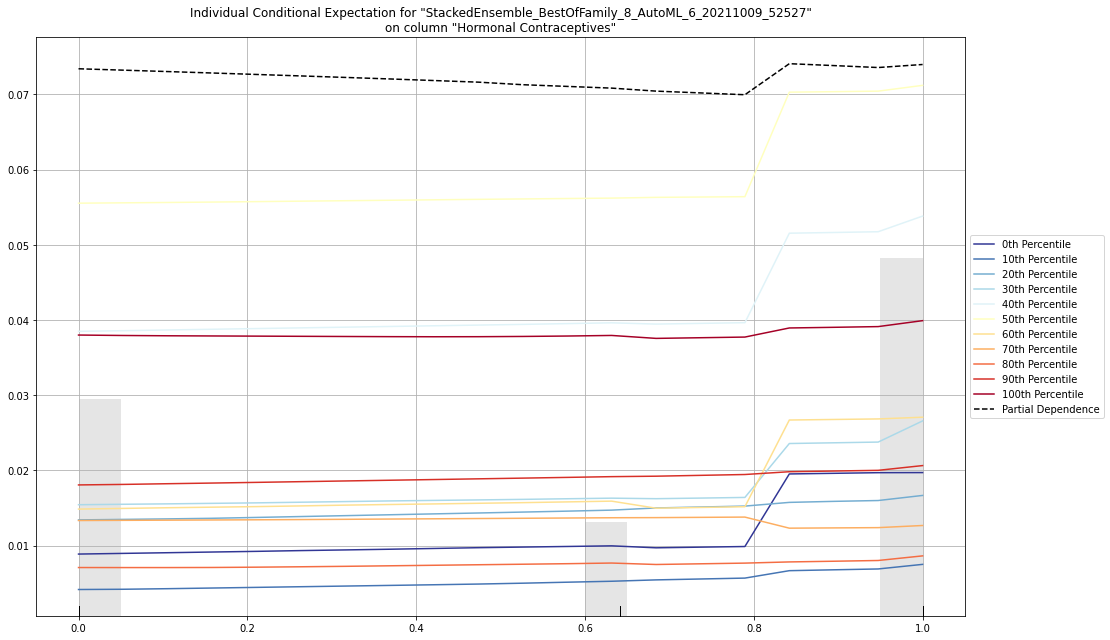

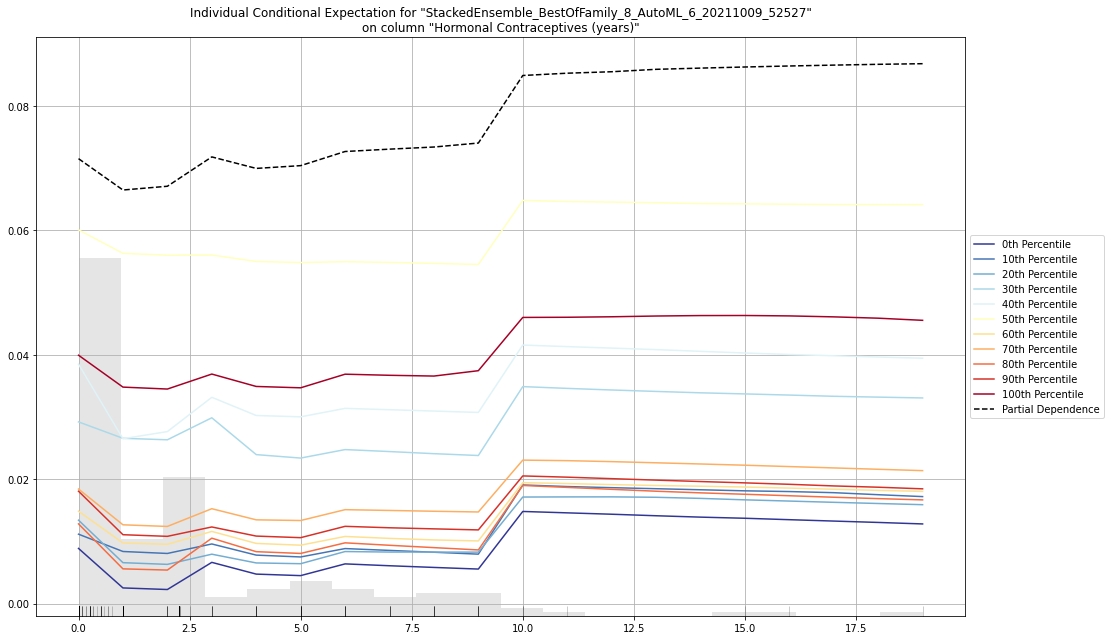

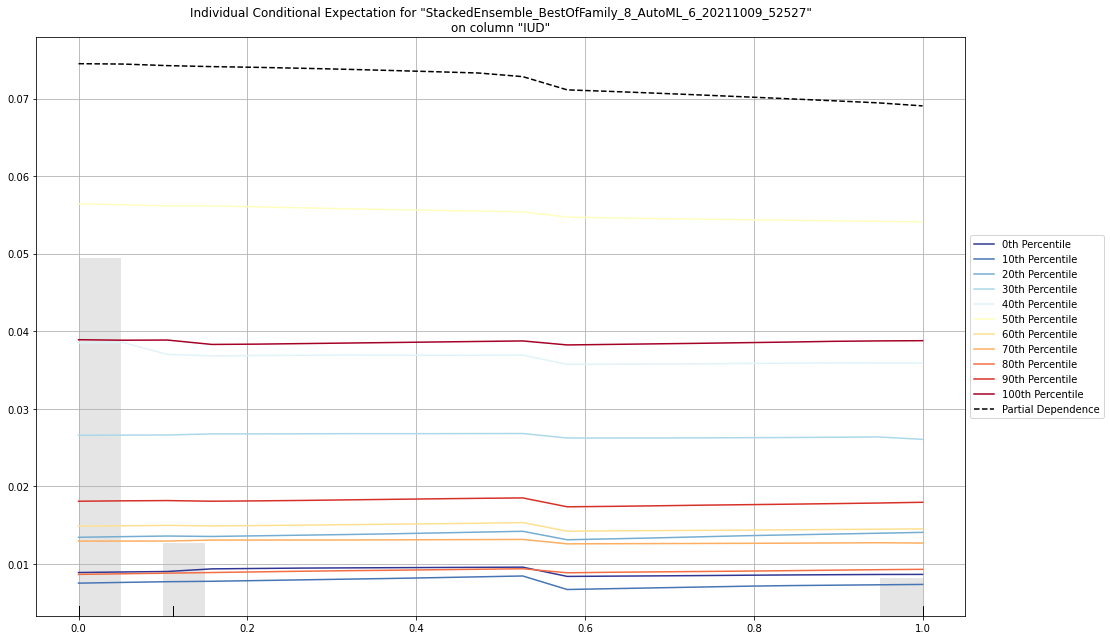

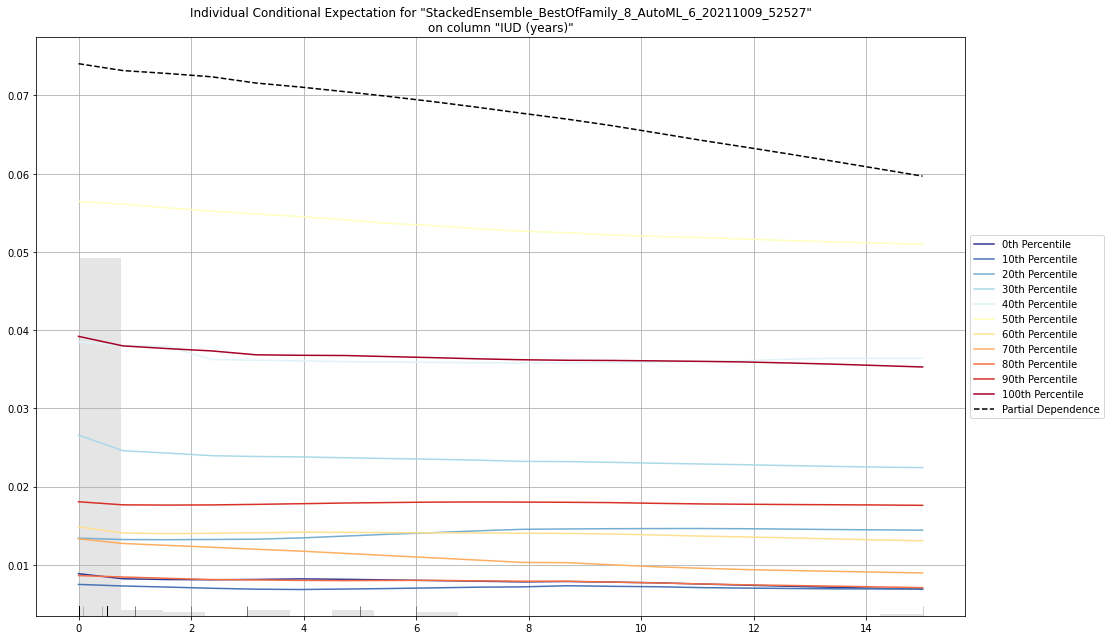

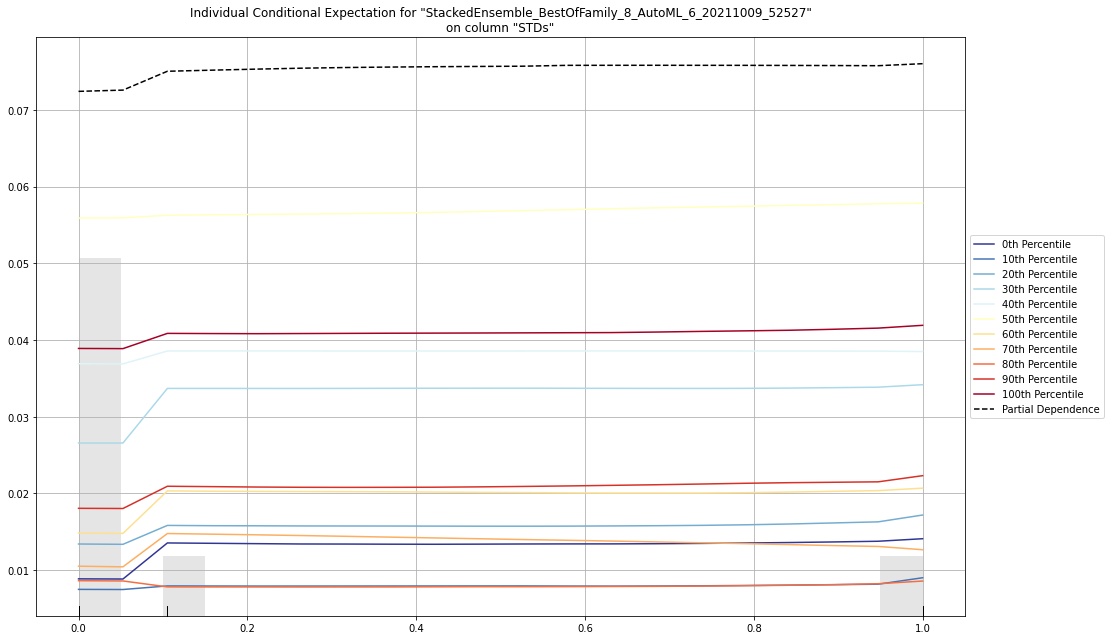

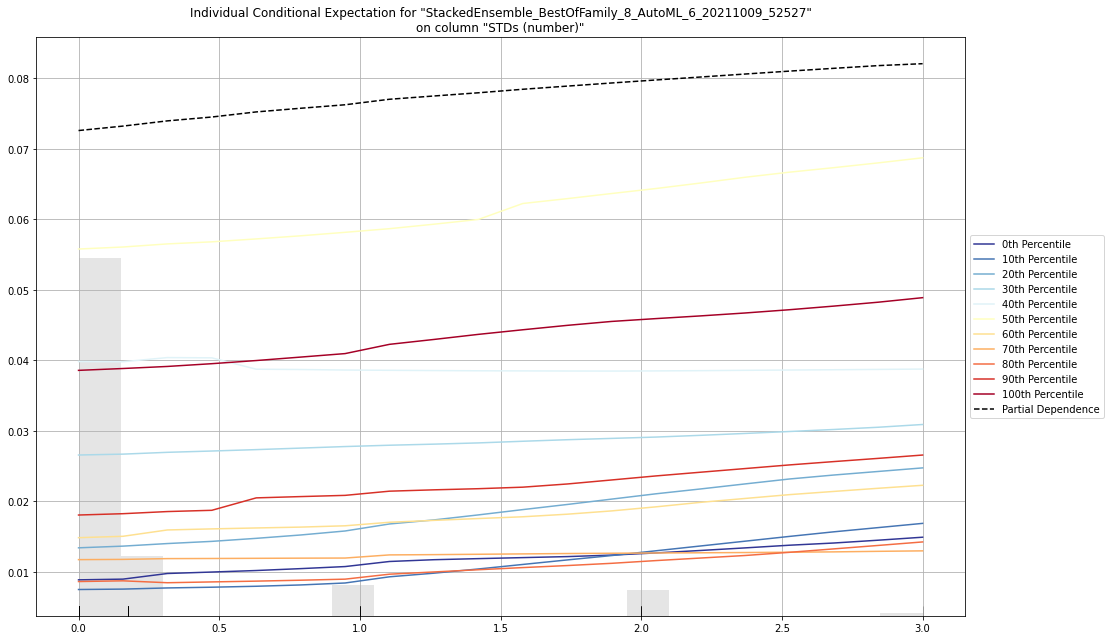

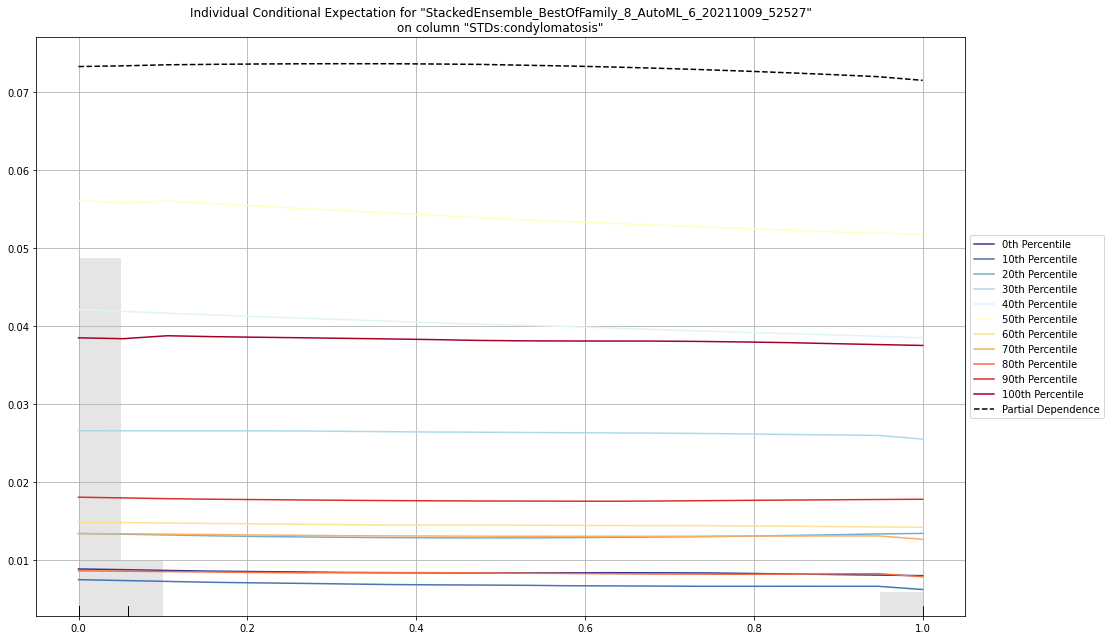

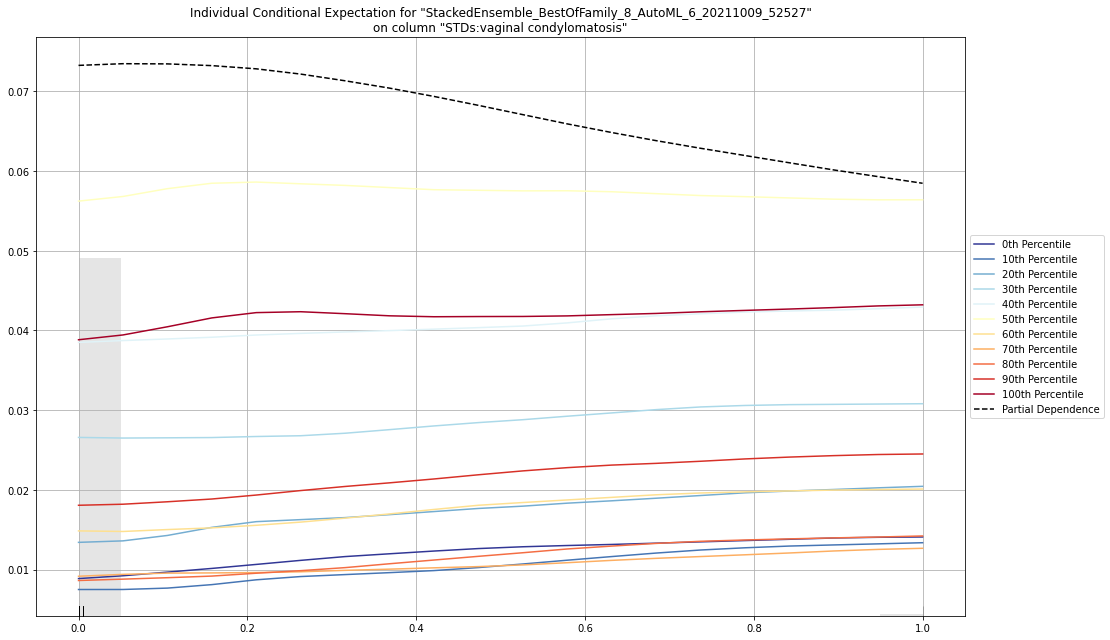

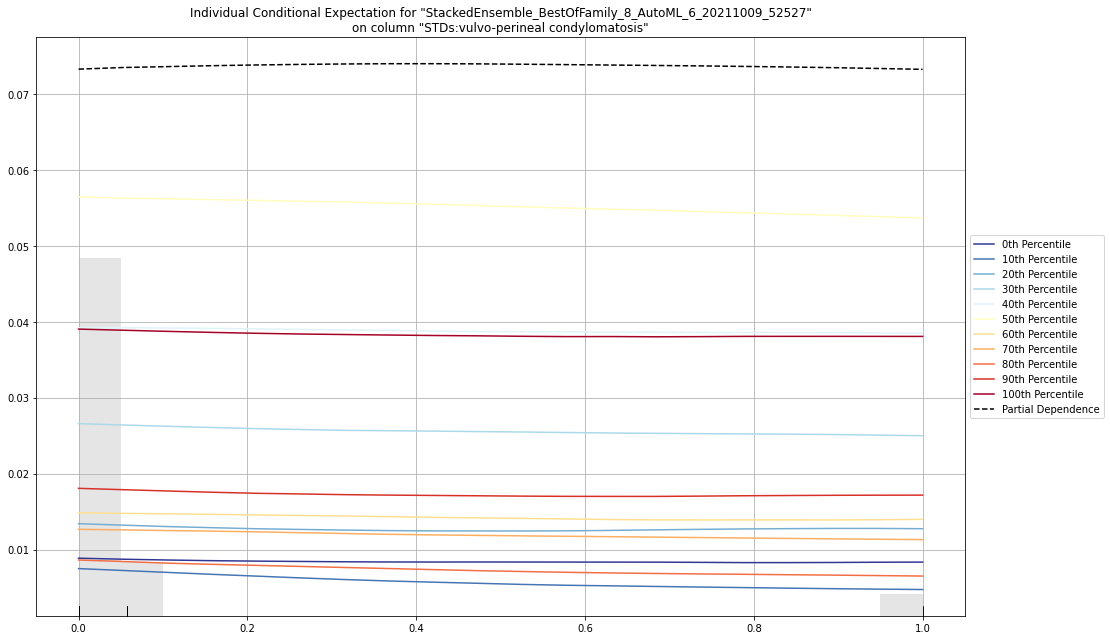

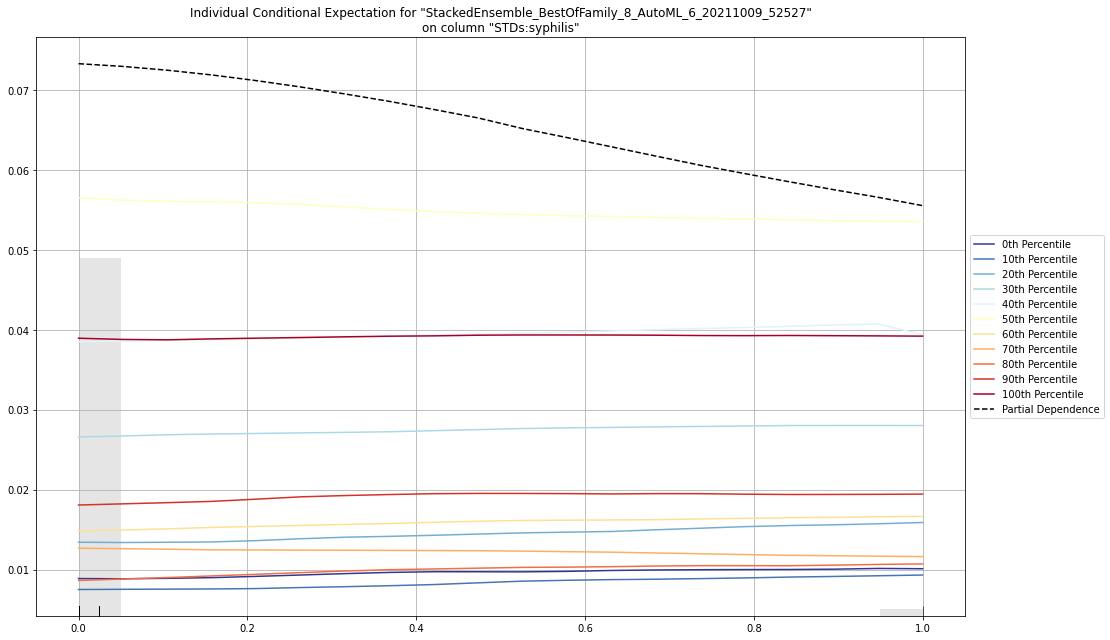

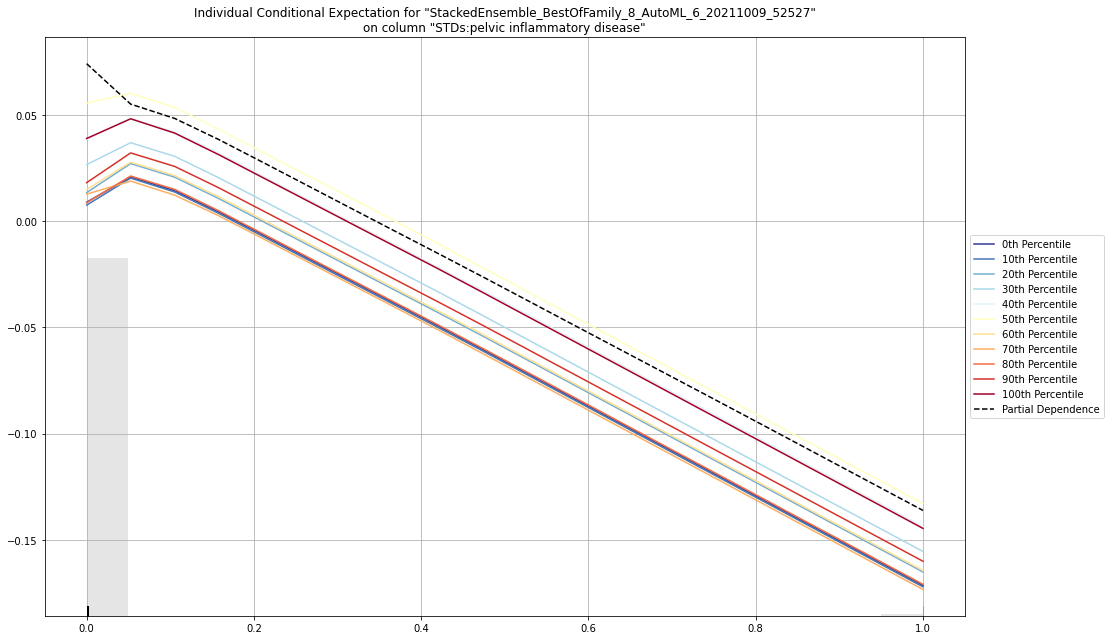

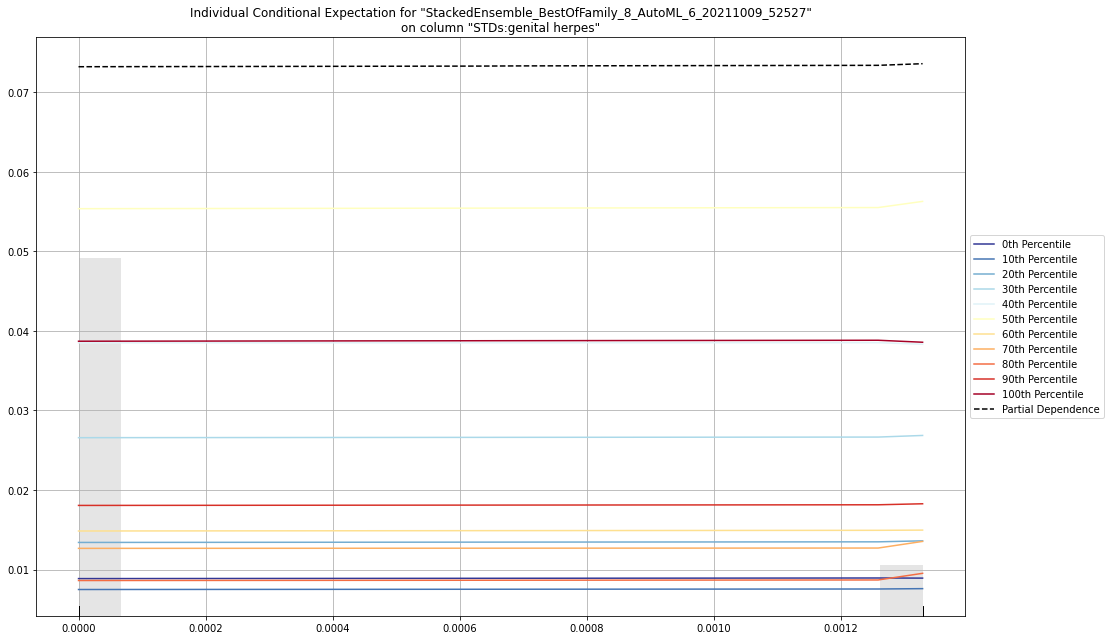

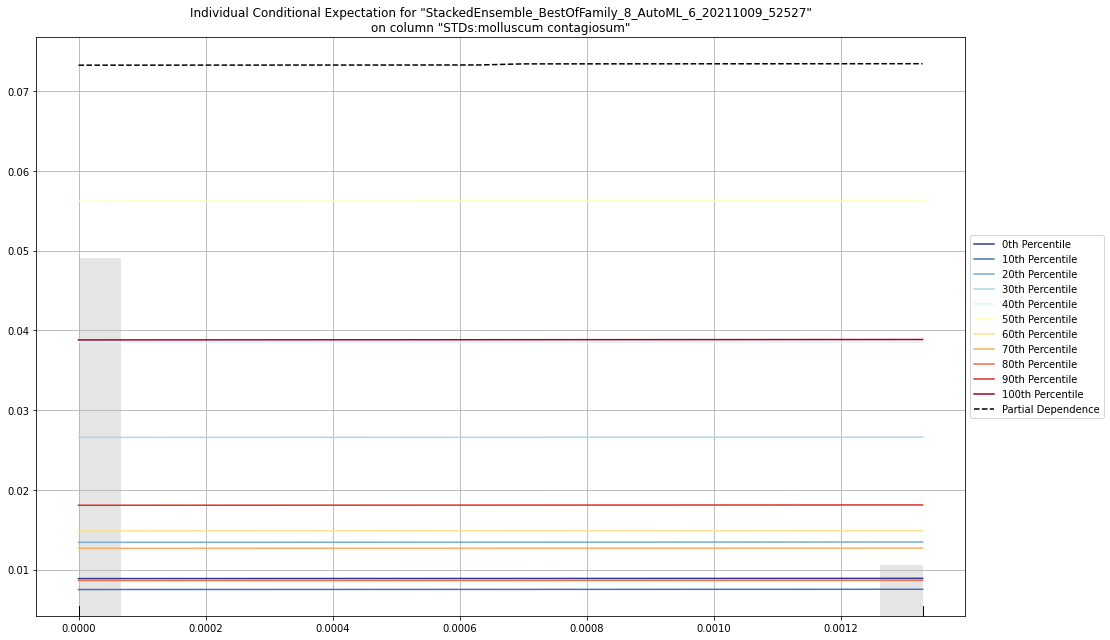

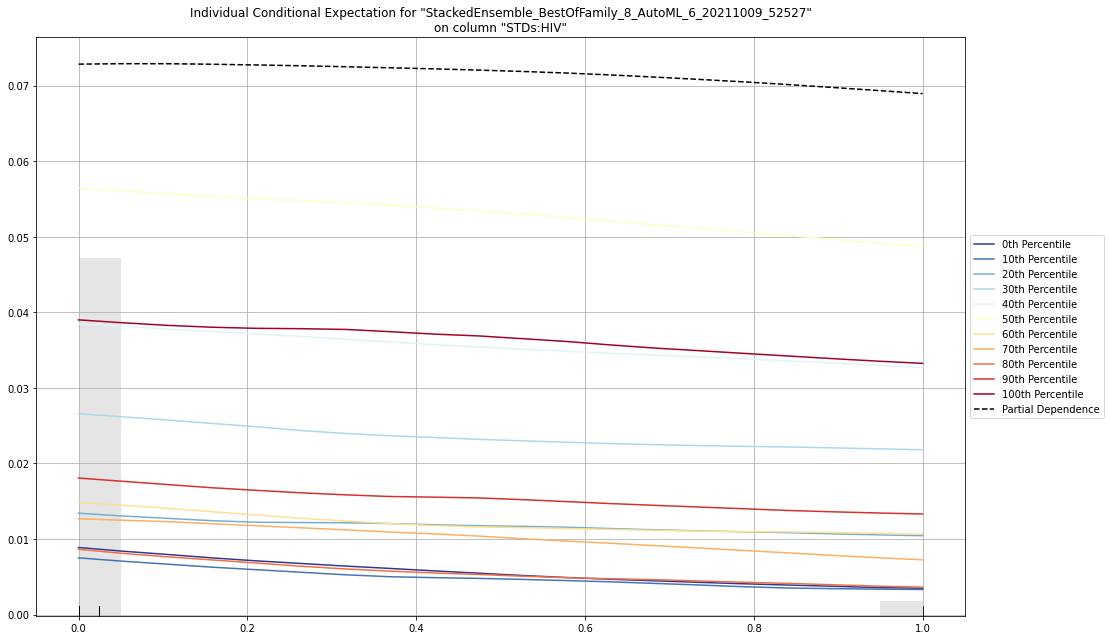

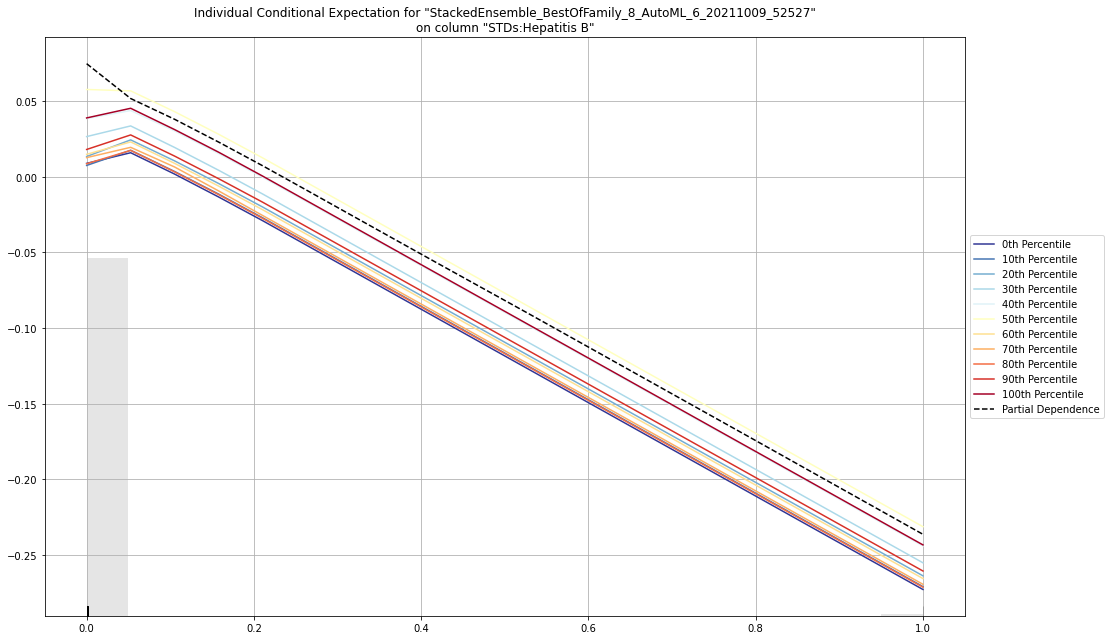

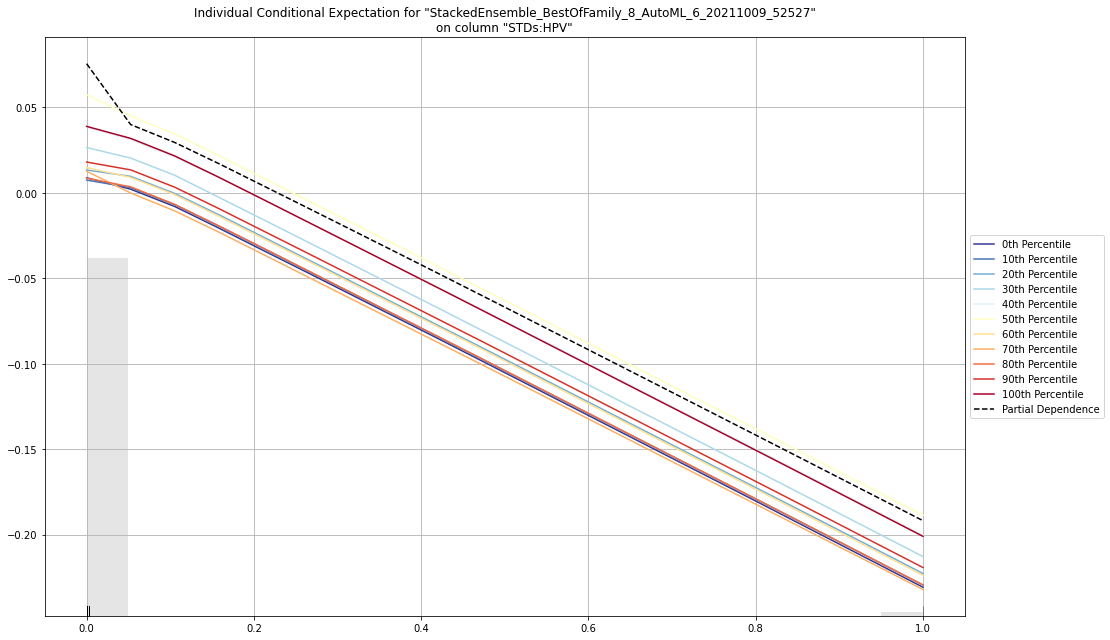

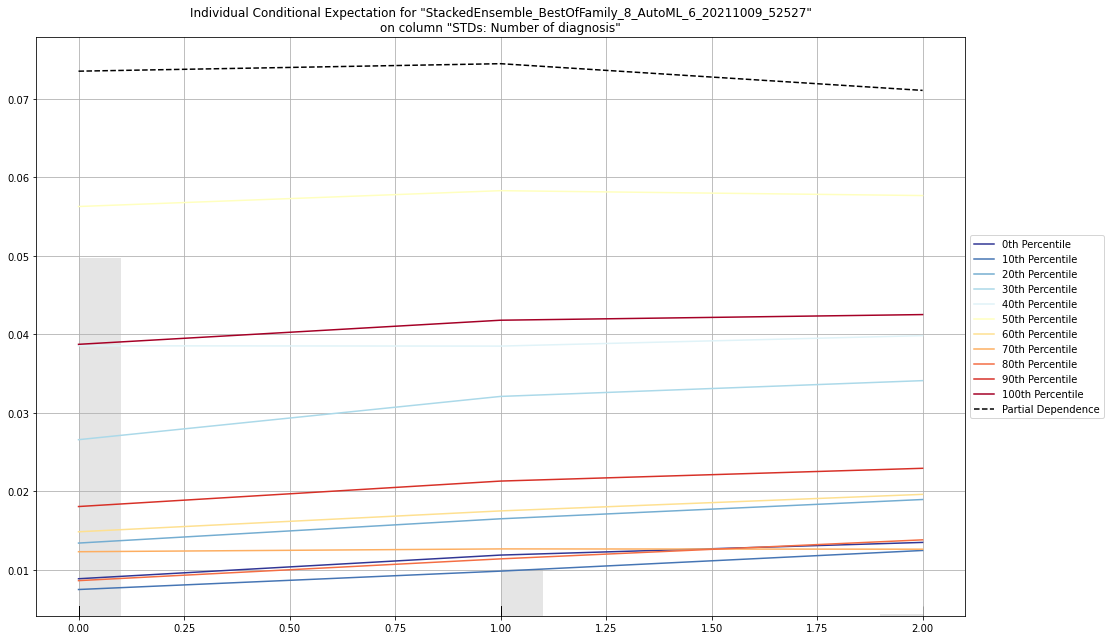

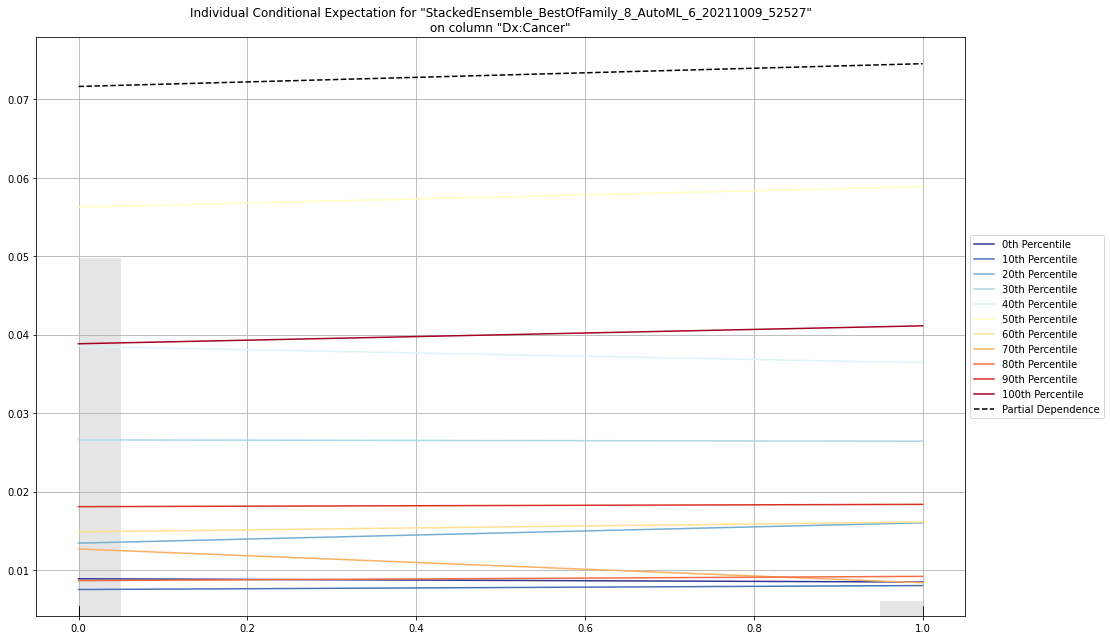

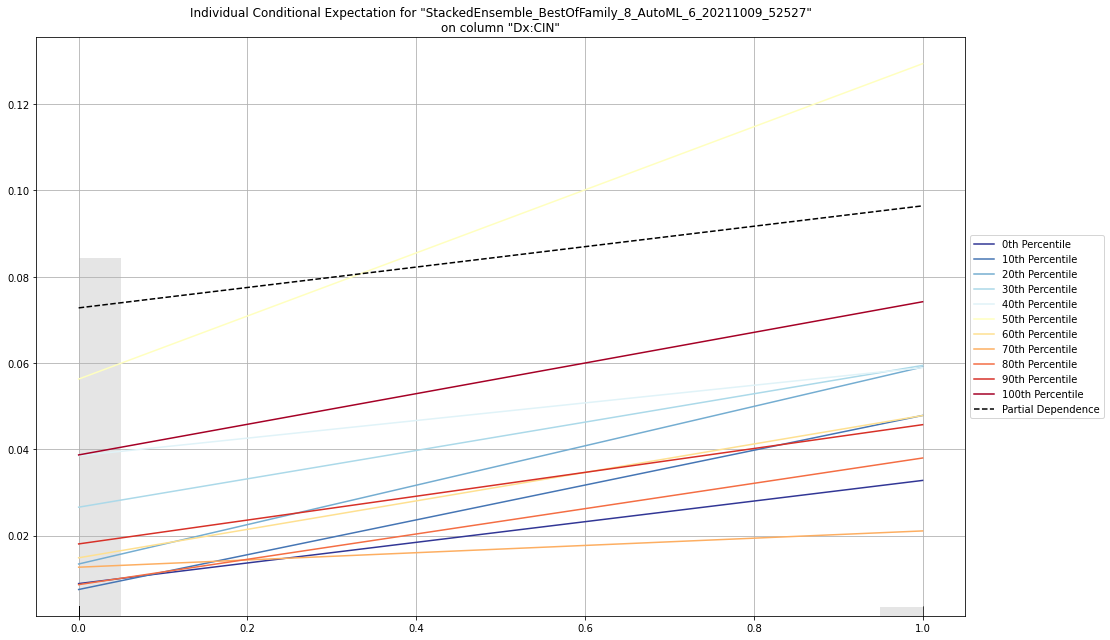

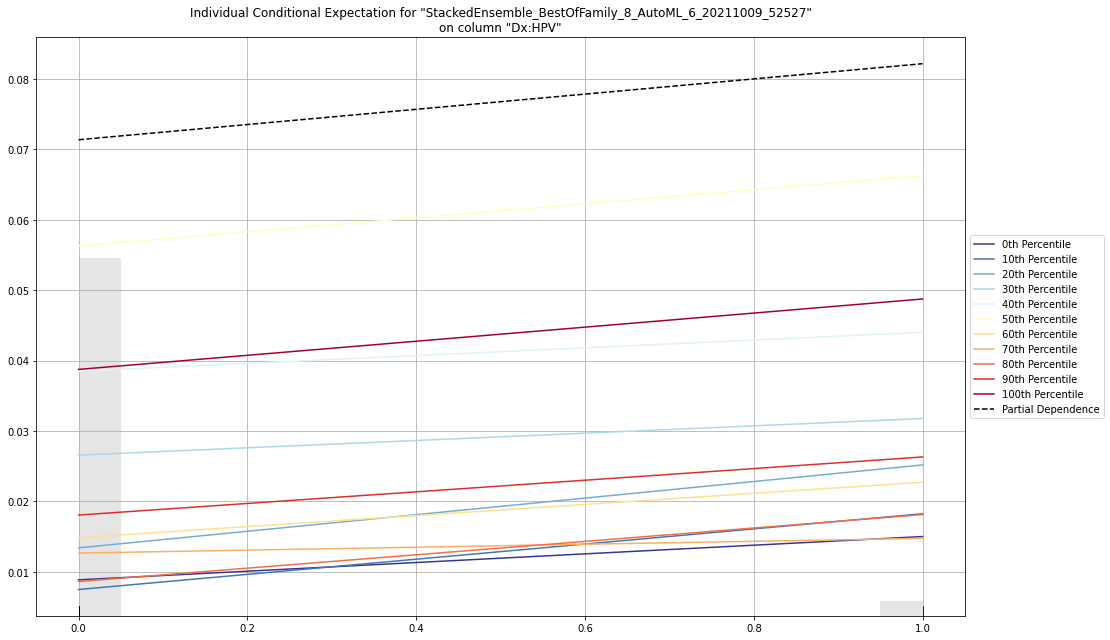

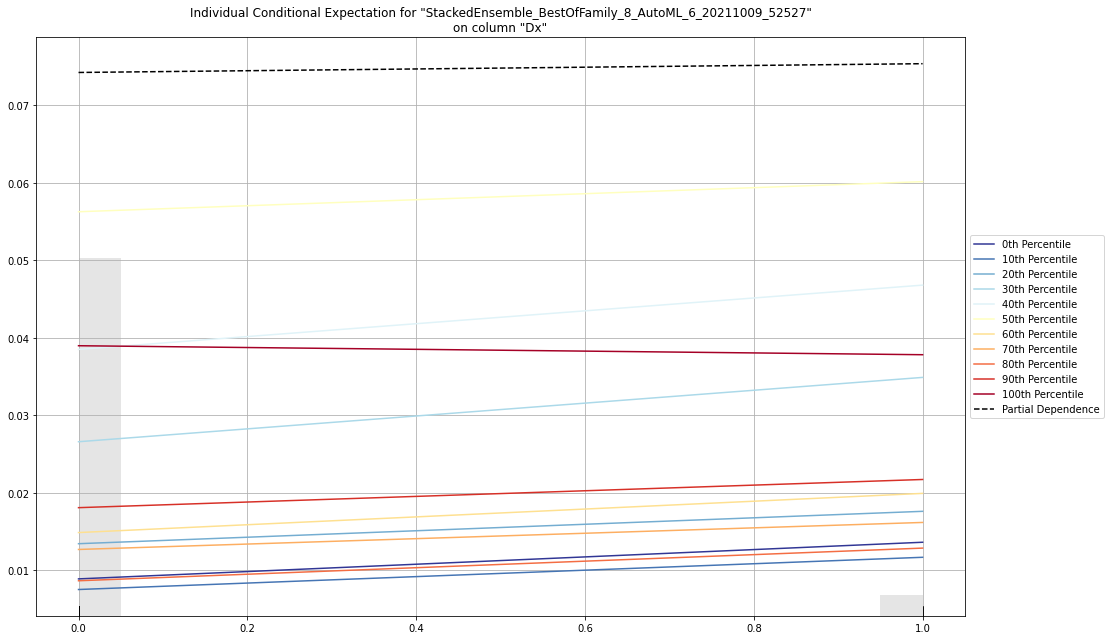

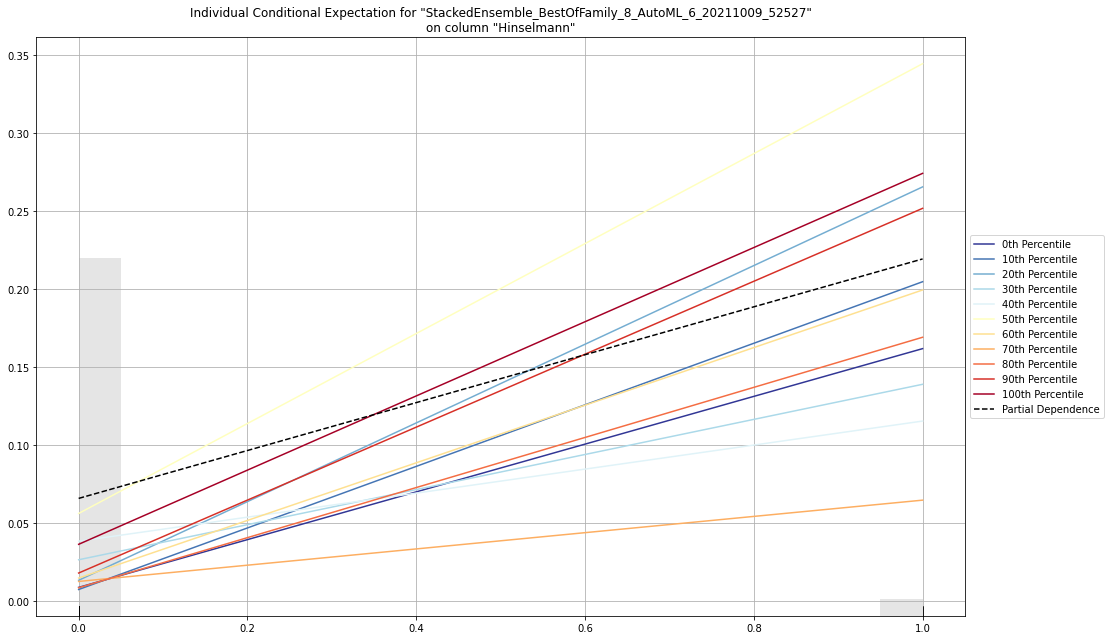

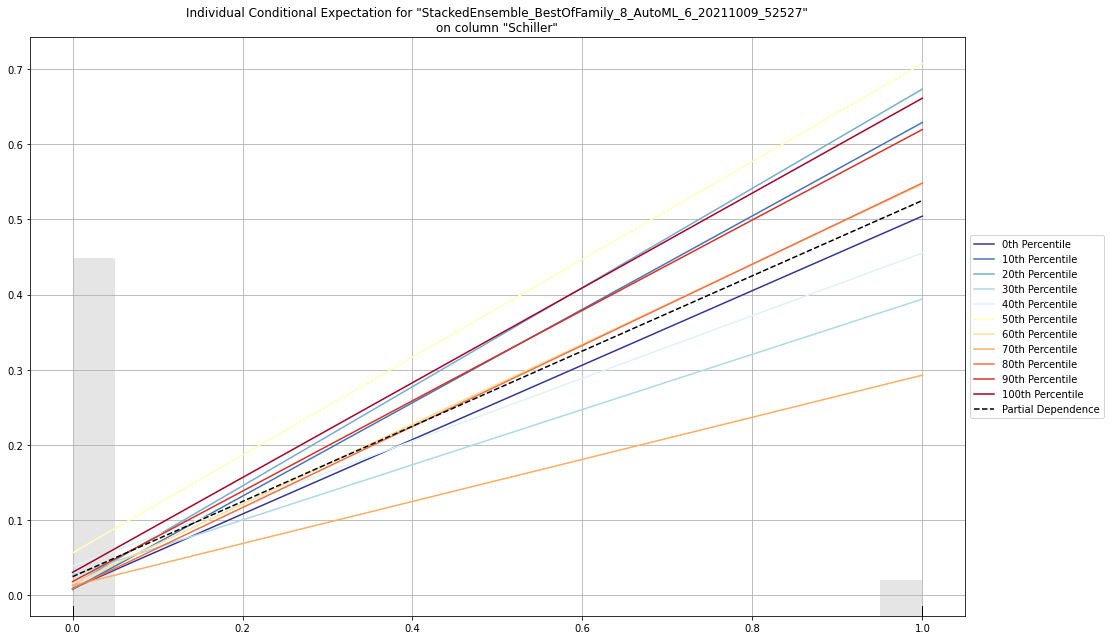

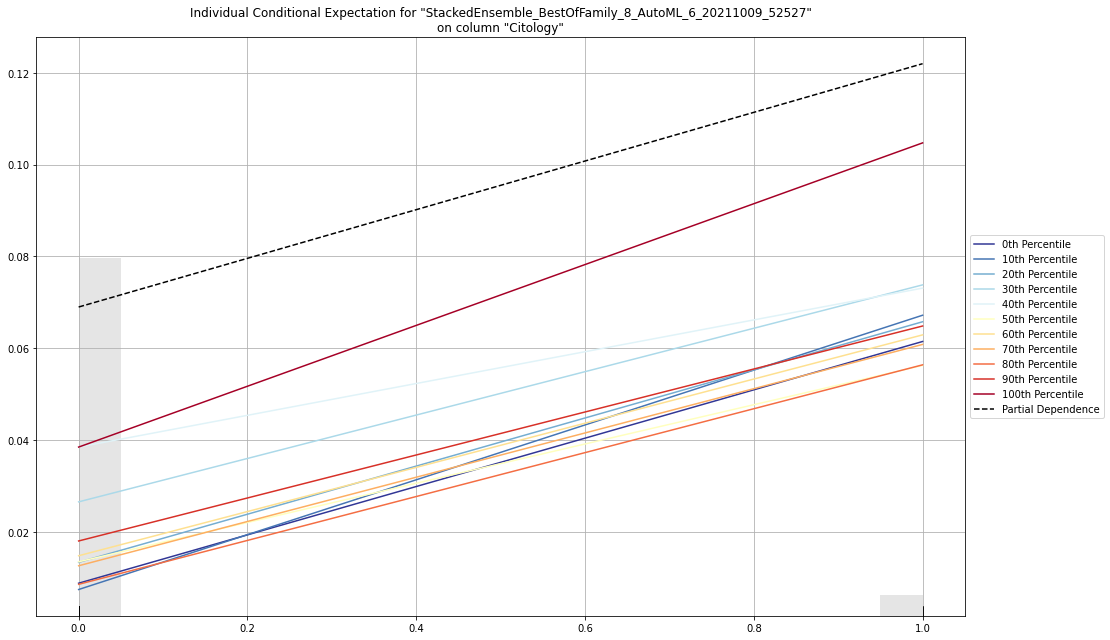

In [76]:
#explain a single H2O model (e.g. leader model from AutoML)
exm = aml.leader.explain(test)

In [77]:
#make prediction
preds = aml.leader.predict(test)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


In [78]:
#combine the prediction with the test dataset
df = test.cbind(preds)

#preview
df.head(10)

Age Number of sexual partners First sexual intercourse Num of pregnancies Smokes Smokes (years) Smokes (packs/year) Hormonal Contraceptives Hormonal Contraceptives (years) IUD IUD (years) STDs STDs (number) STDs:condylomatosis STDs:cervical condylomatosis STDs:vaginal condylomatosis STDs:vulvo-perineal condylomatosis STDs:syphilis STDs:pelvic inflammatory disease STDs:genital herpes STDs:molluscum contagiosum STDs:AIDS STDs:HIV STDs:Hepatitis B STDs:HPV STDs: Number of diagnosis Dx:Cancer Dx:CIN Dx:HPV Dx Hinselmann Schiller Citology Biopsy predict 
 
 
 18 4 15 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0.00887213 
 15 1 14 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0.0109544 
 45 1 20 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0.0175805 
 27 1 17 3 0 0 0 1 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0.0196789 
 41 3 17 4 0 0 0 1 10 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0.0277443 
 39 2 17 4 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0.0127989 
 37 2 18 2.27556 0 0 0 0 0 0.112011 0.514804 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0.546271 
 36 3 18 3 1 1.26697 2.4 1 9 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0.0187042 
 36 2 18 3 0.145562 1.21972 0.453144 1 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0.0120265 
 40 2 20 3 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0.00810692

In [79]:
df = h2o.as_list(df)

In [80]:
preds = df[['Biopsy', 'predict']].head(20)
preds

Biopsy   predict
0        0  0.008872
1        0  0.010954
2        0  0.017580
3        0  0.019679
4        0  0.027744
5        0  0.012799
6        1  0.546271
7        0  0.018704
8        0  0.012026
9        0  0.008107
10       0  0.016041
11       0  0.016960
12       0  0.007627
13       0  0.022316
14       0  0.012939
15       0  0.014521
16       1  0.729096
17       0  0.015050
18       0  0.025517
19       0  0.021892